In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Checking if we are using google colab or local machine and configuring 
# imports accordingly
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP
from cnp.run_experiment import run_experiment

import torch
import numpy as np
from copy import copy

# import utils
import json
from datetime import date

Running on Colab?
yes
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
if google_colab=='yes':
    config_dir = 'base_configs'
else:
    config_dir = os.path.join(BASE_DIR,'base_configs')

# checkin the parameters
# loading the base config file for this experiment
with open(os.path.join(config_dir,'greyscale_pixelregression_config.json')) as f:
    file = f.read()
    base_config = json.loads(file)
base_config

{'cnp_params': {'aggregation_kwargs': {'aggregation_operation': 'mean',
   'aggregator': 'SimpleAggregator'},
  'dimout': 2,
  'dimr': 128,
  'dimx': 2,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 80,
  'max_funcs': 100,
  'min_contx': 25,
  'min_funcs': 25,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.TwoDImageRegression',
  'init_kwargs': {'height': 28,
   'link': '~/.pytorch/MNIST_data/',
   'scale_mean': 0.5,
   'scale_std': 0.5,
   'share_train_data': 0.8,
   'width': 28},
  'num_instances_test': 100,
  'num_instances_train': 32,
  'num_instances_vali': 10},
 'experiment_params': {'lr': 0.0001,
  'n_epochs': 200000,
  'seed': 1,
  'train_on_gpu': False},
 'mu_gen': 0,
 'train_kwargs': {'batch_size_test': 10,
  'batch_size_train': 32,
  'batch_size_vali': 5,
  'plot_mode': '2d_greyscale',
  'plot_progress': True,
  'plotting': True,
  'print_after': 2000}}

In [6]:
# setting specfic training parameters
base_config ['train_kwargs']['print_after'] = int(input('Validation run after how many epochs ?'))
base_config ['train_kwargs']['early_stopping'] = bool(input('Add early stopping?'))


Validation run after how many epochs ?1000
Add early stopping?True


## Simple Mean Experiment 

In [7]:
mean_exp_config = copy(base_config)

In [8]:
run_experiment(config_file=mean_exp_config,
               experiment_name='greyscale_mean_40ctxt',
              google_colab=google_colab)

Output hidden; open in https://colab.research.google.com to view.

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation
seed is set


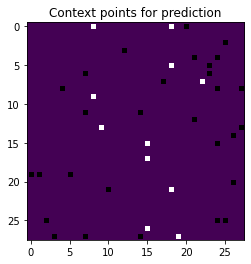

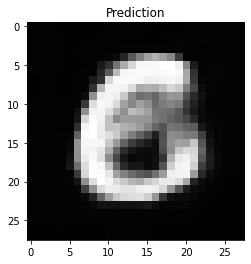

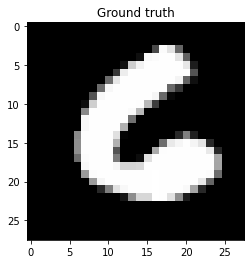

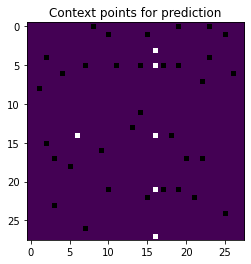

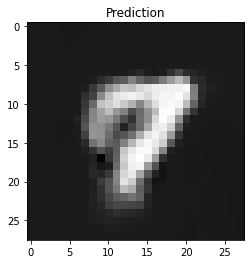

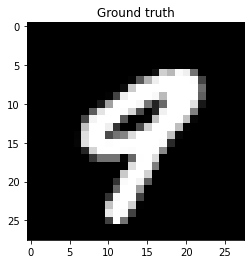

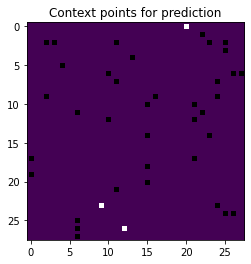

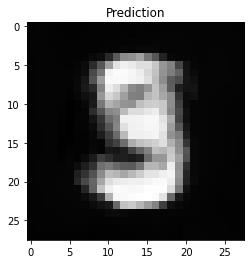

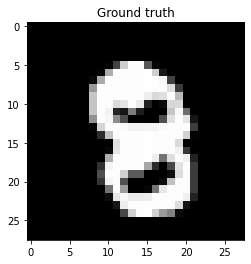

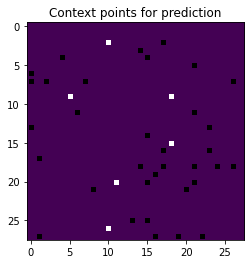

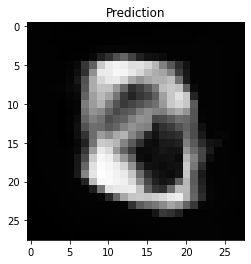

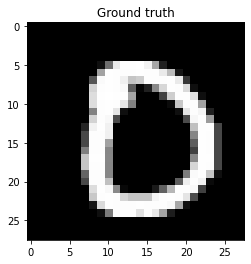

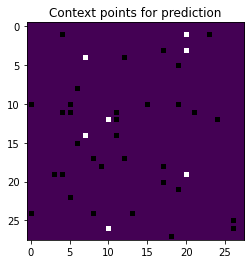

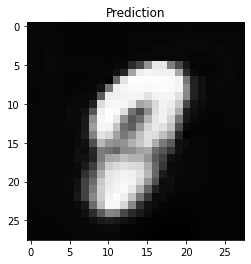

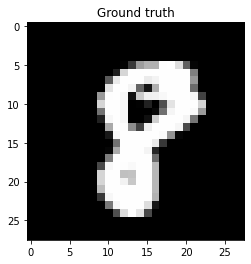

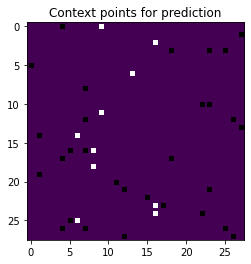

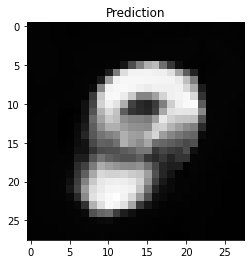

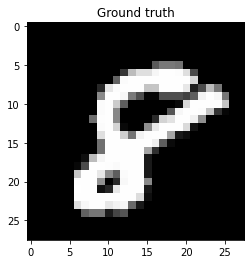

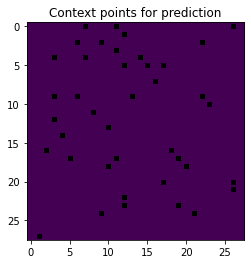

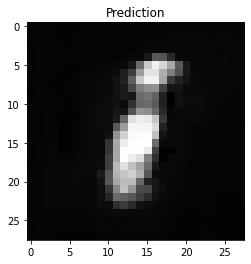

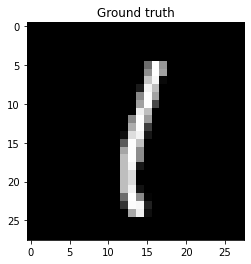

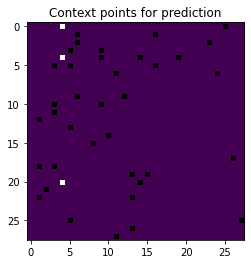

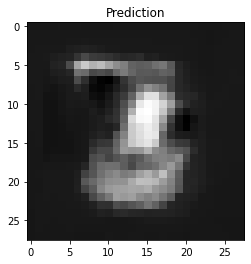

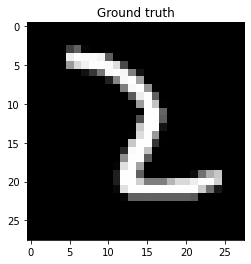

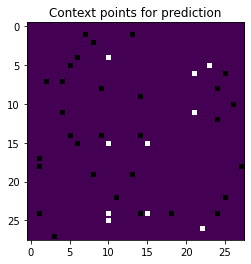

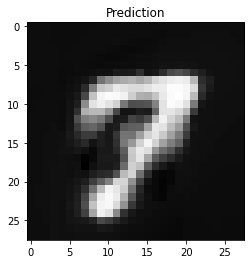

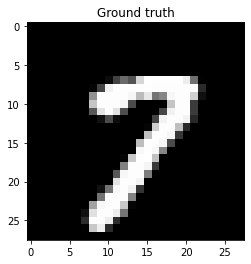

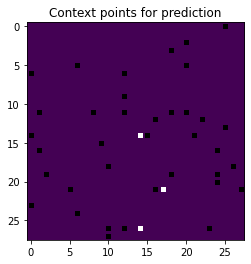

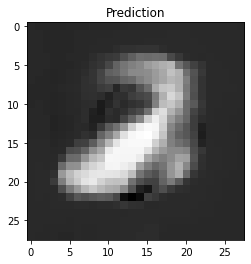

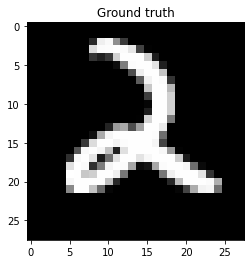

In [ ]:
## Increasing the number of context points 
## Predicting with twice the number of context points
experiment_name = 'greyscale_mean_40ctxt_2020_06_30_12_00'
result_path = 'experiments/results'
with open(os.path.join(result_path, experiment_name,'config_file.json')) as file:
    experiment_config = json.load(file)

experiment_config['cnp_params']['max_contx']=80
CondNeuralProcess = RegressionCNP(**experiment_config['cnp_params'])

trainer = RegressionTrainer(
    data_kwargs=experiment_config['data_kwargs'],
    cnp=CondNeuralProcess,
     **experiment_config['experiment_params'])

if train_on_gpu:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'))
else:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'),map_location=torch.device('cpu'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'),map_location=torch.device('cpu'))

total_mse, task_mses = trainer.run_test(
    encoder_state_dict,
    decoder_state_dict,
    aggregator_state_dict=None,
    batch_size_test=experiment_config['train_kwargs']['batch_size_test'],
    plot_mode=experiment_config['train_kwargs']['plot_mode'])

## Max Experiment 

In [ ]:
max_exp_config = copy(base_config)
max_exp_config['cnp_params']['aggregation_kwargs']['aggregation_operation']='max'

run_experiment(config_file=max_exp_config,
               experiment_name='greyscale_40ctxt_max',
              google_colab=google_colab)

Output hidden; open in https://colab.research.google.com to view.

##  Sum Experiment 

In [ ]:
sum_exp_config = copy(base_config)
sum_exp_config['cnp_params']['aggregation_kwargs']['aggregation_operation']='sum'
run_experiment(config_file=sum_exp_config,
               experiment_name='greyscale_sum',
              google_colab=google_colab)

Output hidden; open in https://colab.research.google.com to view.

## Attention based experiments

In [ ]:
with open(os.path.join(config_dir,'aggregation_kwargs.json')) as f:
    file = f.read()
    aggregation_kwargs = json.loads(file)
aggregation_kwargs 

{'BasicMLPAggregator': {'aggregator': 'BasicMLPAggregator',
  'insize': 128,
  'num_layers': 2,
  'num_neurons': 128,
  'dimout': 1},
 'GatedMLPAggregator': {'aggregator': 'GatedMLPAggregator',
  'insize': 128,
  'num_neurons': 128,
  'dimout': 1},
 'TargetBasedAggregation': {'aggregator': 'TargetBasedAggregation',
  'distance_metric': 'laplace_kernel'}}

In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs['BasicMLPAggregator']

run_experiment(config_file=attention_exp_config,
               experiment_name='greyscale_attention_40ctxt',
              google_colab=google_colab)

Output hidden; open in https://colab.research.google.com to view.

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
GatedMLPAggregator(
  (attention_W): Linear(in_features=128, out_features=128, bias=True)
  (attenion_V): Linear(in_features=128, out_features=128, bias=True)
  (sigmoid): Sigmoid()
  (tanh): Tanh()
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (softmax): Softmax(dim=1)
)


  0%|          | 0/200000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         0.664
Mean Validation loss after 0 equals                     0.53



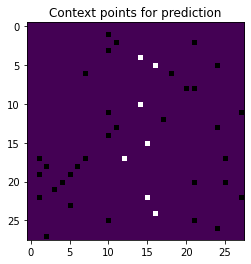

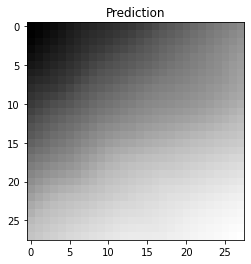

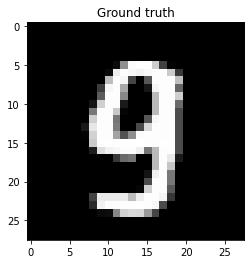

  0%|          | 3/200000 [00:00<20:55:00,  2.66it/s]

Validation loss for the function plotted:                                     0.535


  1%|          | 2000/200000 [01:45<4:12:43, 13.06it/s] 

Mean training loss at epoch 2000 :                         -0.269
Mean Validation loss after 2000 equals                     -0.399



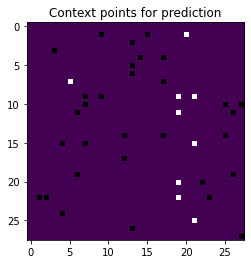

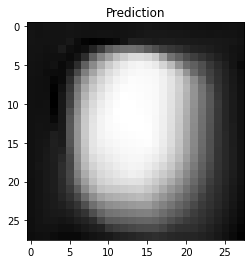

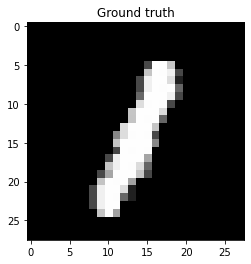

  1%|          | 2004/200000 [01:46<7:37:11,  7.22it/s]

Validation loss for the function plotted:                                     -0.414


  2%|▏         | 3999/200000 [03:26<2:31:43, 21.53it/s] 

Mean training loss at epoch 4000 :                         -0.431
Mean Validation loss after 4000 equals                     -0.524



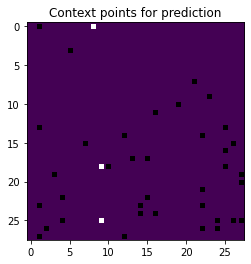

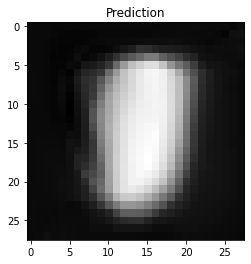

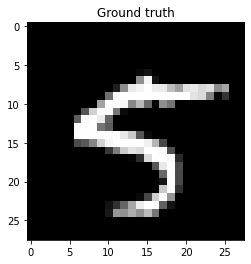

  2%|▏         | 4004/200000 [03:27<4:29:55, 12.10it/s]

Validation loss for the function plotted:                                     -0.52


  3%|▎         | 5998/200000 [05:02<2:08:03, 25.25it/s]

Mean training loss at epoch 6000 :                         -0.386
Mean Validation loss after 6000 equals                     -0.458



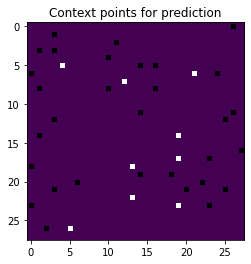

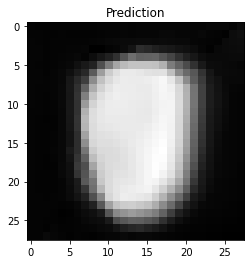

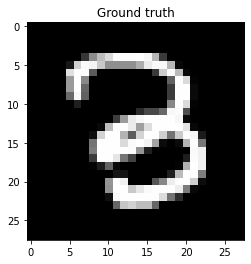

  3%|▎         | 6004/200000 [05:02<3:43:57, 14.44it/s]

Validation loss for the function plotted:                                     -0.517


  4%|▍         | 8000/200000 [06:27<2:12:18, 24.18it/s]

Mean training loss at epoch 8000 :                         -0.683
Mean Validation loss after 8000 equals                     -0.574



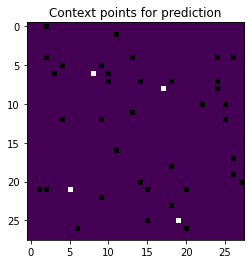

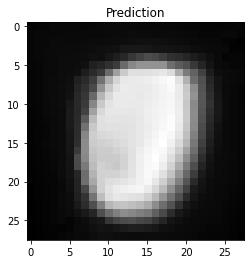

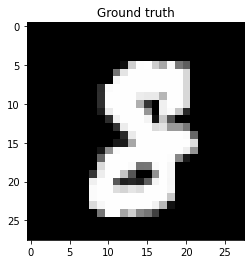

  4%|▍         | 8006/200000 [06:28<3:35:38, 14.84it/s]

Validation loss for the function plotted:                                     -0.567


  5%|▍         | 9998/200000 [07:58<2:47:23, 18.92it/s]

Mean training loss at epoch 10000 :                         -0.583
Mean Validation loss after 10000 equals                     -0.552



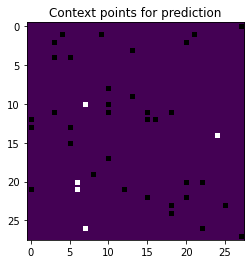

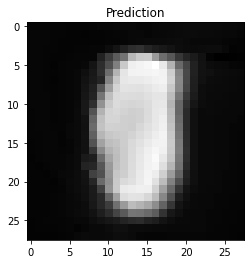

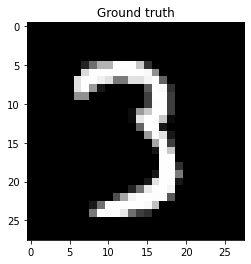

  5%|▌         | 10003/200000 [07:58<4:26:42, 11.87it/s]

Validation loss for the function plotted:                                     -0.621


  6%|▌         | 11999/200000 [09:25<2:15:22, 23.15it/s]

Mean training loss at epoch 12000 :                         -0.784
Mean Validation loss after 12000 equals                     -0.646



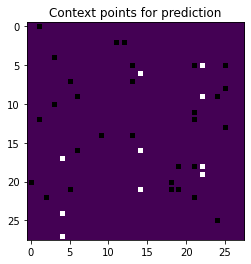

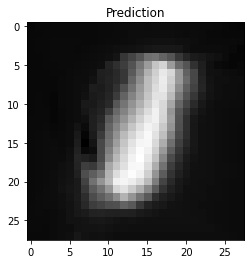

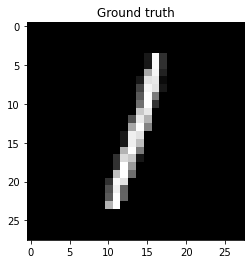

  6%|▌         | 12005/200000 [09:25<3:45:59, 13.86it/s]

Validation loss for the function plotted:                                     -0.726


  7%|▋         | 14000/200000 [11:05<2:20:45, 22.02it/s] 

Mean training loss at epoch 14000 :                         -0.576
Mean Validation loss after 14000 equals                     -0.631



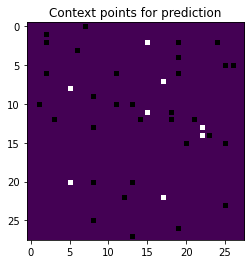

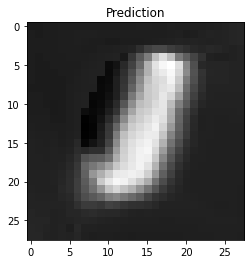

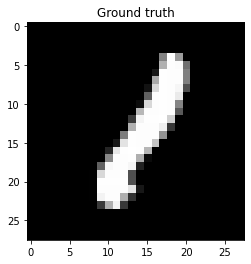

  7%|▋         | 14003/200000 [11:05<4:51:00, 10.65it/s]

Validation loss for the function plotted:                                     -0.629


  8%|▊         | 16000/200000 [12:33<2:26:49, 20.89it/s]

Mean training loss at epoch 16000 :                         -0.528
Mean Validation loss after 16000 equals                     -0.475



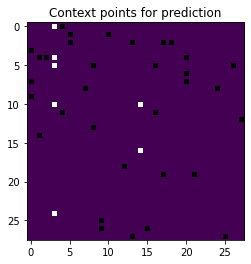

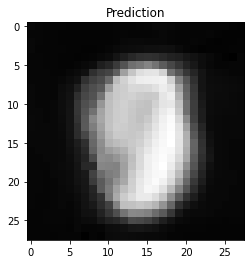

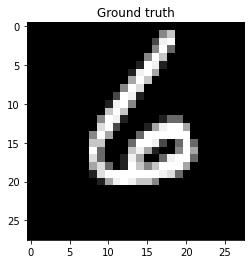

  8%|▊         | 16003/200000 [12:34<4:30:37, 11.33it/s]

Validation loss for the function plotted:                                     -0.458


  9%|▉         | 18000/200000 [13:59<2:15:27, 22.39it/s]

Mean training loss at epoch 18000 :                         -0.671
Mean Validation loss after 18000 equals                     -0.603



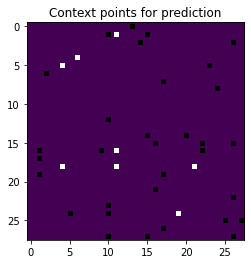

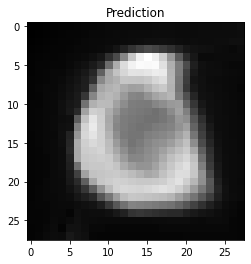

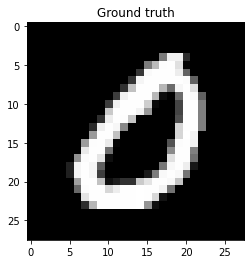

  9%|▉         | 18006/200000 [13:59<3:37:22, 13.95it/s]

Validation loss for the function plotted:                                     -0.565


 10%|▉         | 19999/200000 [15:23<2:23:10, 20.95it/s]

Mean training loss at epoch 20000 :                         -0.612
Mean Validation loss after 20000 equals                     -0.652



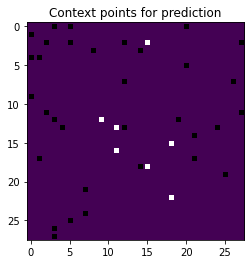

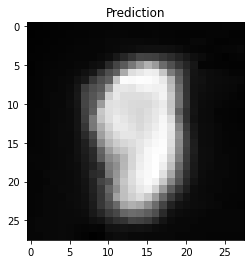

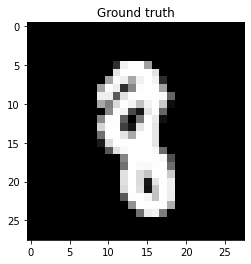

 10%|█         | 20005/200000 [15:24<3:43:27, 13.42it/s]

Validation loss for the function plotted:                                     -0.699


 11%|█         | 22000/200000 [16:52<2:09:48, 22.86it/s]

Mean training loss at epoch 22000 :                         -0.678
Mean Validation loss after 22000 equals                     -0.513



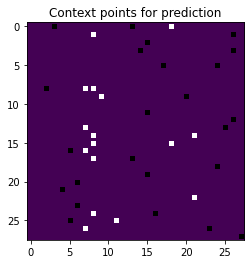

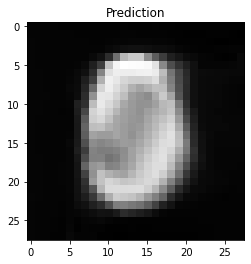

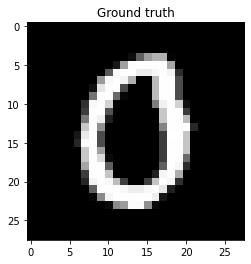

 11%|█         | 22003/200000 [16:53<4:09:39, 11.88it/s]

Validation loss for the function plotted:                                     -0.764


 12%|█▏        | 24000/200000 [18:22<2:13:45, 21.93it/s]

Mean training loss at epoch 24000 :                         -0.711
Mean Validation loss after 24000 equals                     -0.655



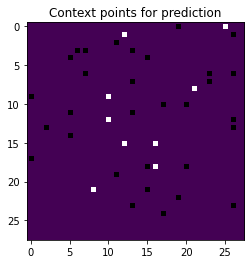

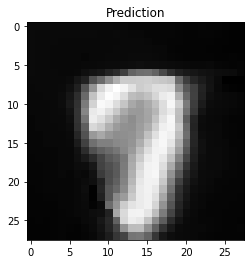

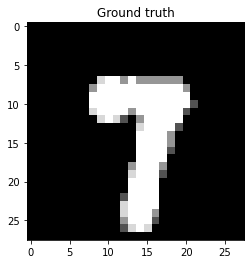

 12%|█▏        | 24003/200000 [18:22<4:04:23, 12.00it/s]

Validation loss for the function plotted:                                     -0.695


 13%|█▎        | 26000/200000 [19:57<1:59:08, 24.34it/s]

Mean training loss at epoch 26000 :                         -0.677
Mean Validation loss after 26000 equals                     -0.526



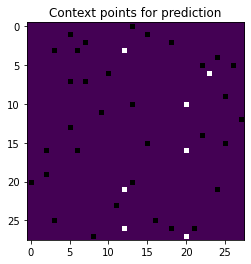

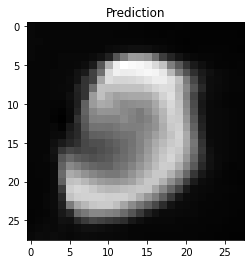

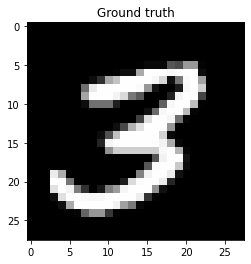

 13%|█▎        | 26006/200000 [19:57<3:12:58, 15.03it/s]

Validation loss for the function plotted:                                     -0.5


 14%|█▍        | 27998/200000 [21:30<1:54:34, 25.02it/s]

Mean training loss at epoch 28000 :                         -0.597
Mean Validation loss after 28000 equals                     -0.687



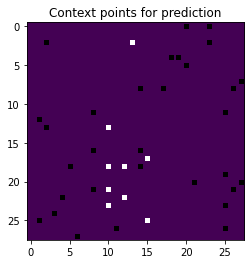

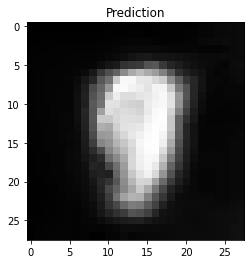

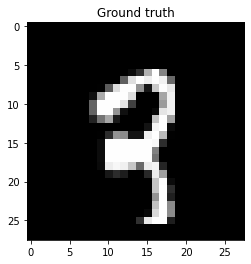

 14%|█▍        | 28003/200000 [21:31<3:24:01, 14.05it/s]

Validation loss for the function plotted:                                     -0.686


 15%|█▌        | 30000/200000 [23:09<2:46:15, 17.04it/s]

Mean training loss at epoch 30000 :                         -0.636
Mean Validation loss after 30000 equals                     -0.57



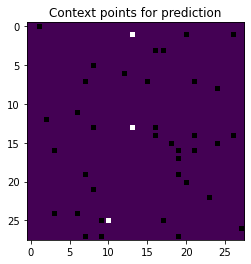

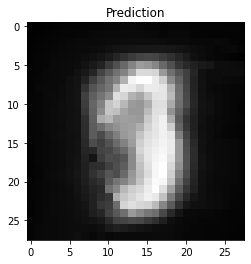

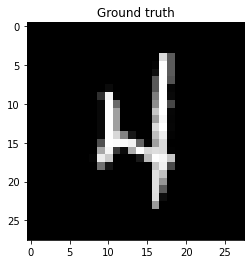

 15%|█▌        | 30002/200000 [23:10<8:35:15,  5.50it/s]

Validation loss for the function plotted:                                     -0.637


 16%|█▌        | 31998/200000 [24:50<2:07:18, 21.99it/s]

Mean training loss at epoch 32000 :                         -0.621
Mean Validation loss after 32000 equals                     -0.713



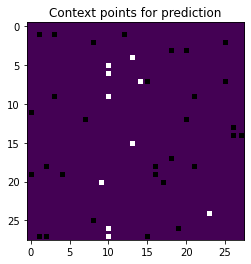

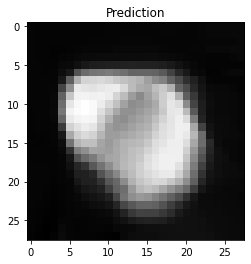

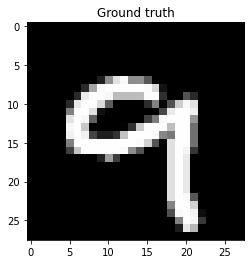

 16%|█▌        | 32004/200000 [24:51<3:23:49, 13.74it/s]

Validation loss for the function plotted:                                     -0.791


 17%|█▋        | 34000/200000 [26:24<2:08:54, 21.46it/s]

Mean training loss at epoch 34000 :                         -0.482
Mean Validation loss after 34000 equals                     -0.431



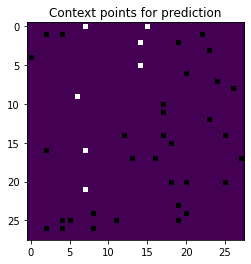

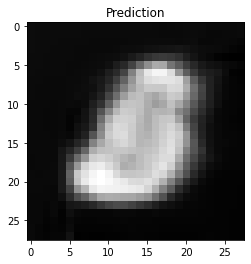

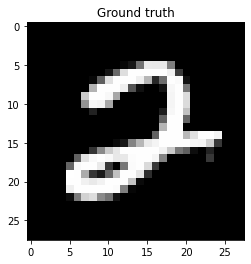

 17%|█▋        | 34003/200000 [26:24<3:59:37, 11.55it/s]

Validation loss for the function plotted:                                     -0.409


 18%|█▊        | 36000/200000 [27:59<1:58:25, 23.08it/s]

Mean training loss at epoch 36000 :                         -0.663
Mean Validation loss after 36000 equals                     -0.396



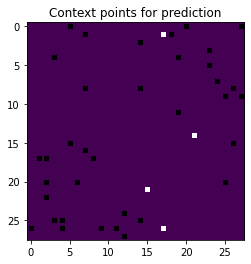

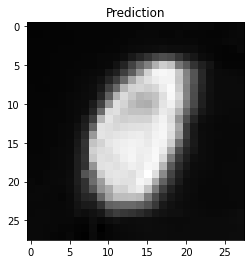

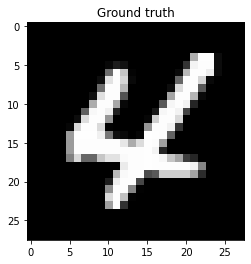

 18%|█▊        | 36003/200000 [27:59<3:53:59, 11.68it/s]

Validation loss for the function plotted:                                     -0.199


 19%|█▉        | 37998/200000 [29:42<2:05:49, 21.46it/s] 

Mean training loss at epoch 38000 :                         -0.675
Mean Validation loss after 38000 equals                     -0.558



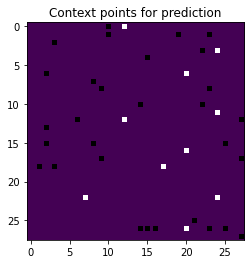

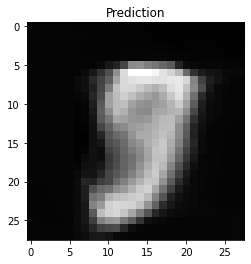

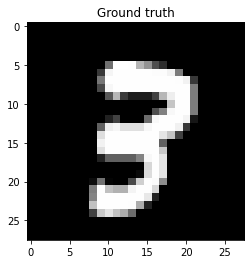

 19%|█▉        | 38004/200000 [29:42<3:28:37, 12.94it/s]

Validation loss for the function plotted:                                     -0.562


 20%|██        | 40000/200000 [31:21<2:02:01, 21.85it/s]

Mean training loss at epoch 40000 :                         -0.69
Mean Validation loss after 40000 equals                     -0.588



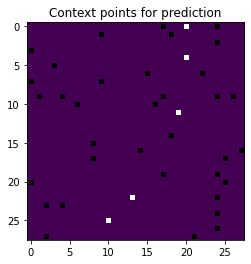

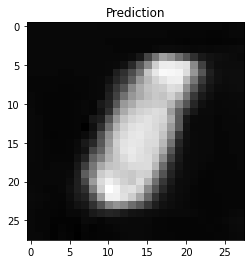

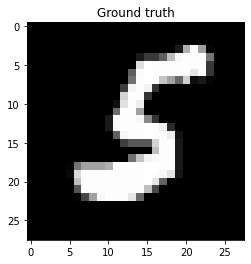

 20%|██        | 40005/200000 [31:21<3:31:42, 12.60it/s]

Validation loss for the function plotted:                                     -0.655


 21%|██        | 41999/200000 [33:08<2:28:13, 17.77it/s]

Mean training loss at epoch 42000 :                         -0.855
Mean Validation loss after 42000 equals                     -0.672



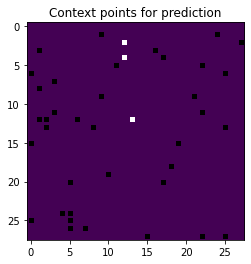

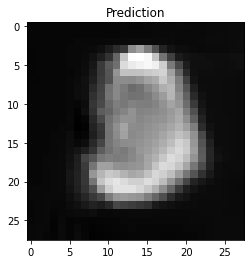

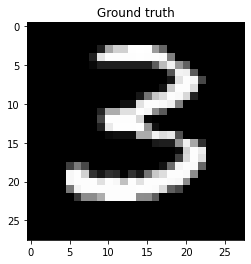

 21%|██        | 42003/200000 [33:09<4:38:03,  9.47it/s]

Validation loss for the function plotted:                                     -0.662


 22%|██▏       | 44000/200000 [34:49<1:47:19, 24.23it/s] 

Mean training loss at epoch 44000 :                         -0.561
Mean Validation loss after 44000 equals                     -0.735



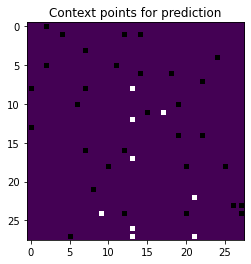

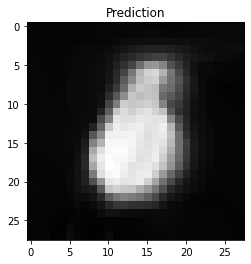

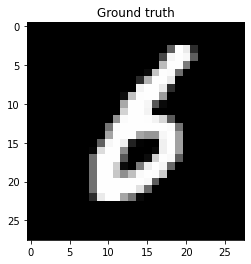

 22%|██▏       | 44005/200000 [34:50<3:14:01, 13.40it/s]

Validation loss for the function plotted:                                     -0.742


 23%|██▎       | 46000/200000 [36:29<2:01:16, 21.16it/s]

Mean training loss at epoch 46000 :                         -0.628
Mean Validation loss after 46000 equals                     -0.623



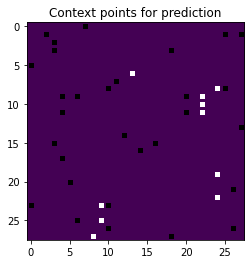

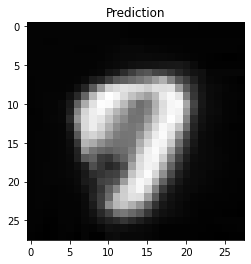

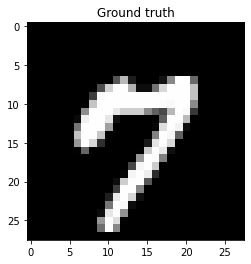

 23%|██▎       | 46003/200000 [36:30<4:21:48,  9.80it/s]

Validation loss for the function plotted:                                     -0.552


 24%|██▍       | 47998/200000 [38:03<1:57:25, 21.57it/s]

Mean training loss at epoch 48000 :                         -0.575
Mean Validation loss after 48000 equals                     -0.669



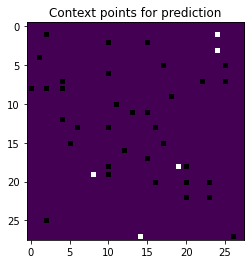

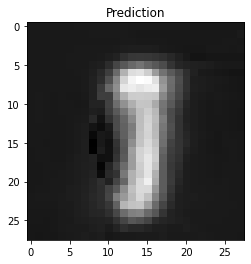

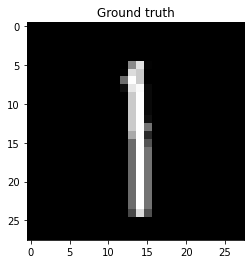

 24%|██▍       | 48003/200000 [38:04<3:09:15, 13.39it/s]

Validation loss for the function plotted:                                     -0.666


 25%|██▌       | 50000/200000 [39:36<2:01:21, 20.60it/s]

Mean training loss at epoch 50000 :                         -0.735
Mean Validation loss after 50000 equals                     -0.41



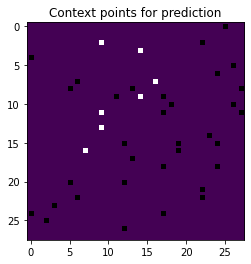

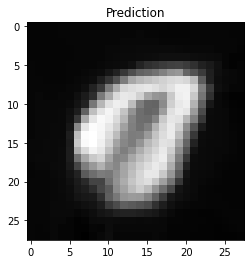

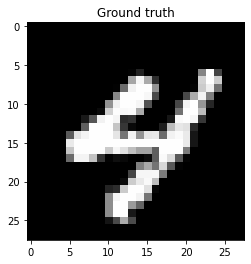

Validation loss for the function plotted:                                     -0.603


 26%|██▌       | 51998/200000 [41:11<1:57:52, 20.93it/s]

Mean training loss at epoch 52000 :                         -0.743
Mean Validation loss after 52000 equals                     -0.738



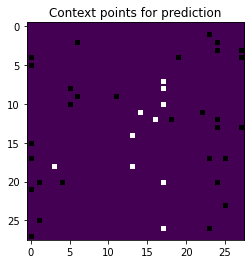

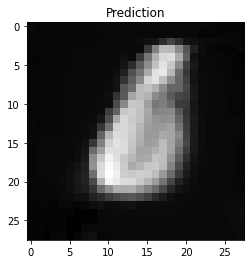

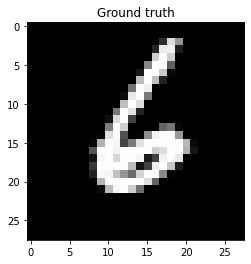

 26%|██▌       | 52004/200000 [41:12<3:26:12, 11.96it/s]

Validation loss for the function plotted:                                     -0.706


 27%|██▋       | 53999/200000 [42:50<1:54:15, 21.30it/s]

Mean training loss at epoch 54000 :                         -0.788
Mean Validation loss after 54000 equals                     -0.762



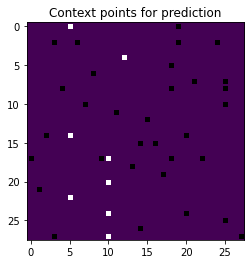

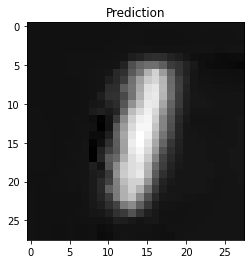

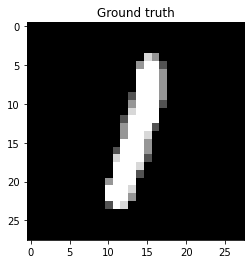

 27%|██▋       | 54005/200000 [42:50<3:02:47, 13.31it/s]

Validation loss for the function plotted:                                     -0.78


 28%|██▊       | 55999/200000 [44:26<1:50:12, 21.78it/s]

Mean training loss at epoch 56000 :                         -0.672
Mean Validation loss after 56000 equals                     -0.546



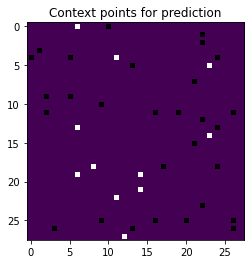

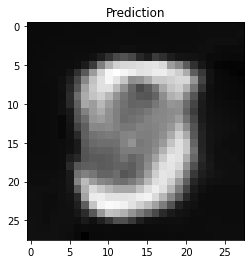

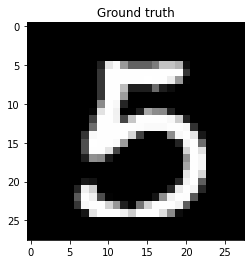

 28%|██▊       | 56005/200000 [44:26<2:54:49, 13.73it/s]

Validation loss for the function plotted:                                     -0.588


 29%|██▉       | 57998/200000 [46:01<2:00:18, 19.67it/s]

Mean training loss at epoch 58000 :                         -0.36
Mean Validation loss after 58000 equals                     -0.216



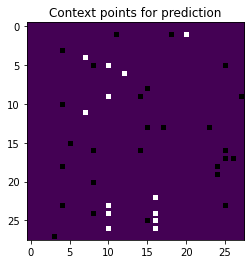

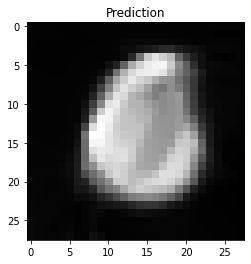

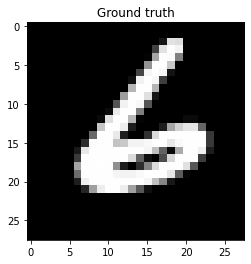

 29%|██▉       | 58004/200000 [46:01<3:00:47, 13.09it/s]

Validation loss for the function plotted:                                     -0.489


 30%|██▉       | 59998/200000 [47:43<1:33:00, 25.09it/s] 

Mean training loss at epoch 60000 :                         -0.777
Mean Validation loss after 60000 equals                     -0.539



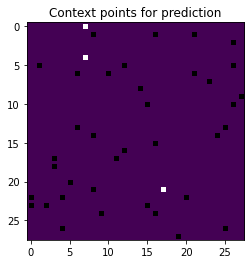

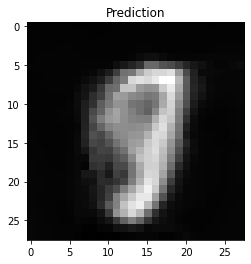

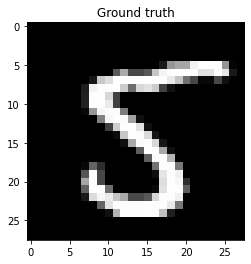

 30%|███       | 60004/200000 [47:43<2:38:51, 14.69it/s]

Validation loss for the function plotted:                                     -0.601


 31%|███       | 61999/200000 [49:06<1:35:43, 24.03it/s]

Mean training loss at epoch 62000 :                         -0.748
Mean Validation loss after 62000 equals                     -0.466



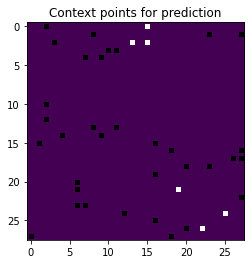

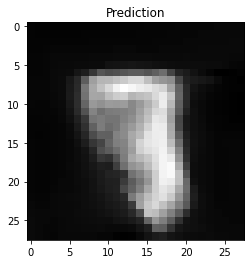

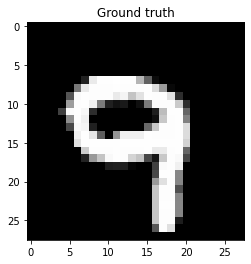

 31%|███       | 62005/200000 [49:06<2:33:24, 14.99it/s]

Validation loss for the function plotted:                                     -0.406


 32%|███▏      | 64000/200000 [50:39<1:40:42, 22.51it/s]

Mean training loss at epoch 64000 :                         -0.664
Mean Validation loss after 64000 equals                     -0.526



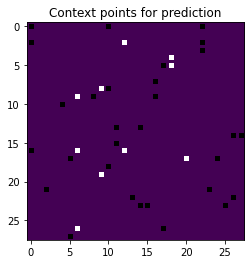

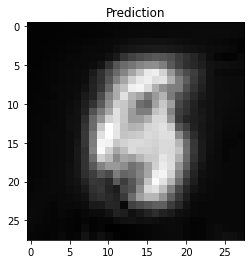

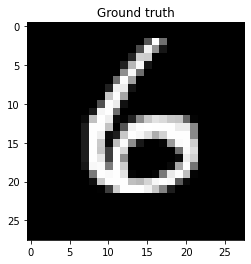

 32%|███▏      | 64003/200000 [50:39<3:18:24, 11.42it/s]

Validation loss for the function plotted:                                     -0.517


 33%|███▎      | 65999/200000 [52:08<1:22:58, 26.92it/s]

Mean training loss at epoch 66000 :                         -0.792
Mean Validation loss after 66000 equals                     -0.65



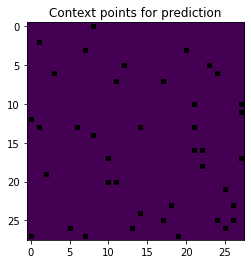

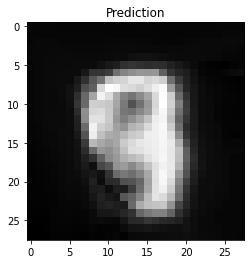

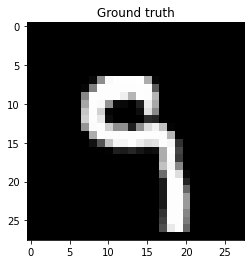

 33%|███▎      | 66005/200000 [52:09<2:22:29, 15.67it/s]

Validation loss for the function plotted:                                     -0.772


 34%|███▍      | 68000/200000 [53:32<1:33:06, 23.63it/s]

Mean training loss at epoch 68000 :                         -0.869
Mean Validation loss after 68000 equals                     -0.624



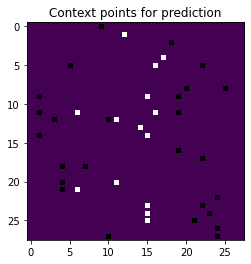

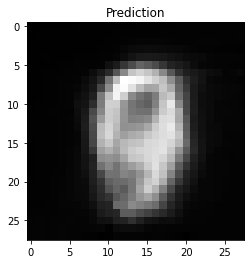

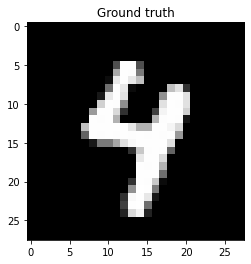

 34%|███▍      | 68003/200000 [53:32<3:06:50, 11.77it/s]

Validation loss for the function plotted:                                     -0.652


 35%|███▍      | 69999/200000 [54:57<1:31:33, 23.67it/s]

Mean training loss at epoch 70000 :                         -0.607
Mean Validation loss after 70000 equals                     -0.576



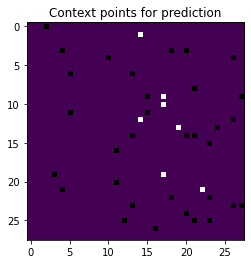

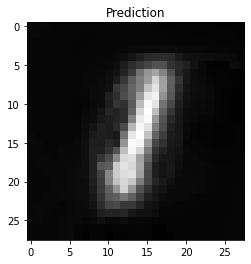

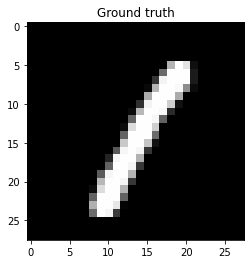

 35%|███▌      | 70005/200000 [54:57<2:28:53, 14.55it/s]

Validation loss for the function plotted:                                     -0.615


 36%|███▌      | 71998/200000 [56:20<1:21:34, 26.15it/s]

Mean training loss at epoch 72000 :                         -0.686
Mean Validation loss after 72000 equals                     -0.577



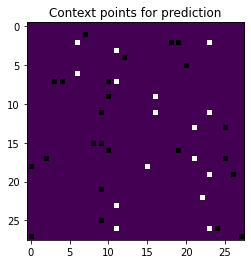

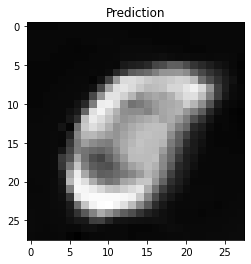

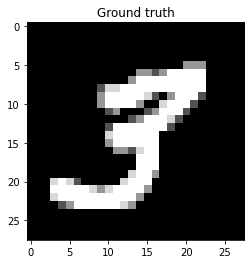

 36%|███▌      | 72004/200000 [56:21<2:26:21, 14.58it/s]

Validation loss for the function plotted:                                     -0.586


 37%|███▋      | 73998/200000 [57:47<1:25:01, 24.70it/s]

Mean training loss at epoch 74000 :                         -0.812
Mean Validation loss after 74000 equals                     -0.532



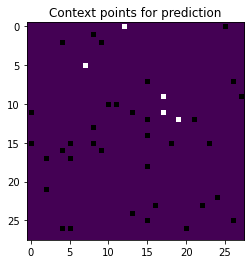

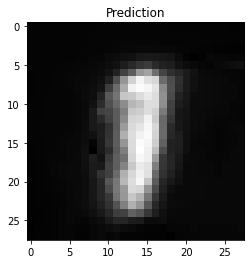

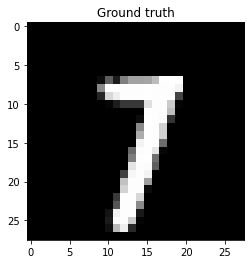

 37%|███▋      | 74004/200000 [57:47<2:22:50, 14.70it/s]

Validation loss for the function plotted:                                     -0.543


 38%|███▊      | 75998/200000 [59:10<1:27:11, 23.71it/s]

Mean training loss at epoch 76000 :                         -0.764
Mean Validation loss after 76000 equals                     -0.705



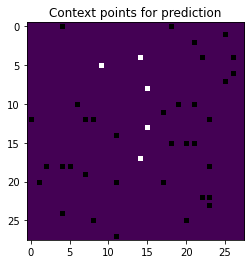

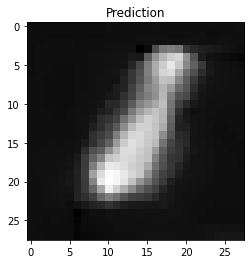

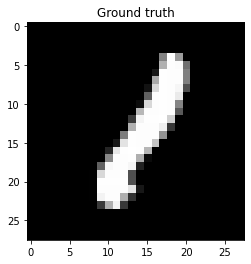

 38%|███▊      | 76004/200000 [59:11<2:17:02, 15.08it/s]

Validation loss for the function plotted:                                     -0.638


 39%|███▉      | 77999/200000 [1:00:36<1:26:10, 23.60it/s]

Mean training loss at epoch 78000 :                         -0.604
Mean Validation loss after 78000 equals                     -0.532



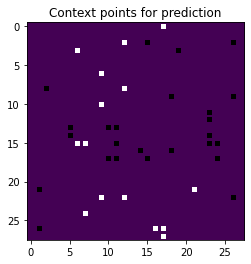

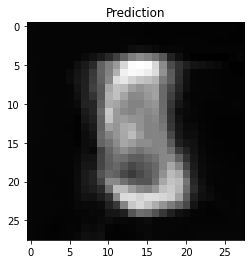

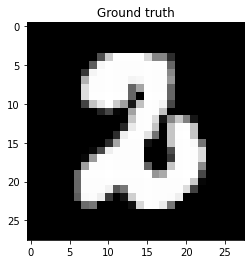

 39%|███▉      | 78005/200000 [1:00:36<2:21:18, 14.39it/s]

Validation loss for the function plotted:                                     -0.612


 40%|████      | 80000/200000 [1:02:01<1:28:43, 22.54it/s]

Mean training loss at epoch 80000 :                         -0.543
Mean Validation loss after 80000 equals                     -0.693



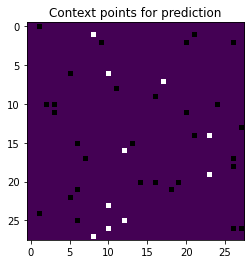

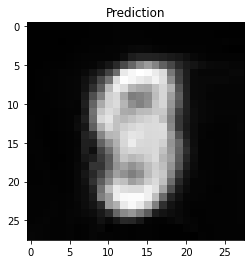

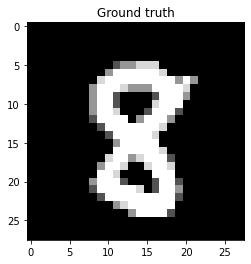

 40%|████      | 80006/200000 [1:02:01<2:18:26, 14.45it/s]

Validation loss for the function plotted:                                     -0.665


 41%|████      | 81999/200000 [1:03:24<1:22:26, 23.85it/s]

Mean training loss at epoch 82000 :                         -0.786
Mean Validation loss after 82000 equals                     -0.622



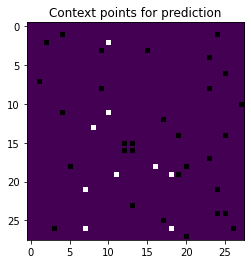

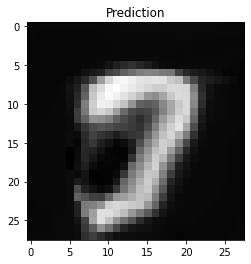

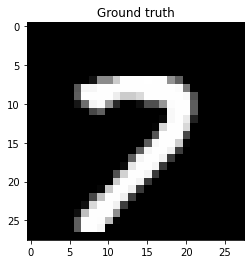

 41%|████      | 82005/200000 [1:03:24<2:13:49, 14.70it/s]

Validation loss for the function plotted:                                     -0.627


 42%|████▏     | 83999/200000 [1:04:49<1:25:58, 22.49it/s]

Mean training loss at epoch 84000 :                         -0.69
Mean Validation loss after 84000 equals                     -0.648



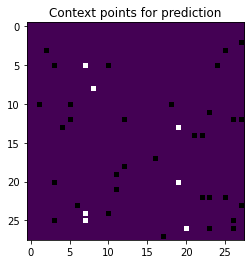

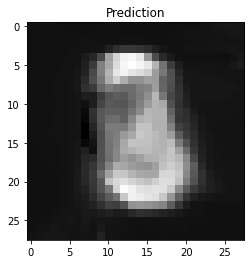

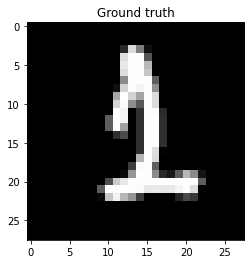

 42%|████▏     | 84005/200000 [1:04:49<2:16:19, 14.18it/s]

Validation loss for the function plotted:                                     -0.766


 43%|████▎     | 86000/200000 [1:06:13<1:19:32, 23.89it/s]

Mean training loss at epoch 86000 :                         -0.534
Mean Validation loss after 86000 equals                     -0.721



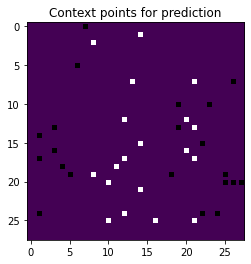

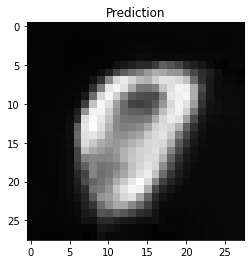

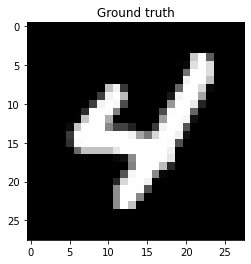

 43%|████▎     | 86003/200000 [1:06:14<2:36:38, 12.13it/s]

Validation loss for the function plotted:                                     -0.772


 44%|████▍     | 87998/200000 [1:07:39<1:24:31, 22.08it/s]

Mean training loss at epoch 88000 :                         -0.612
Mean Validation loss after 88000 equals                     -0.646



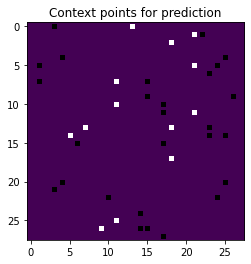

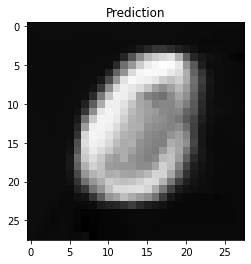

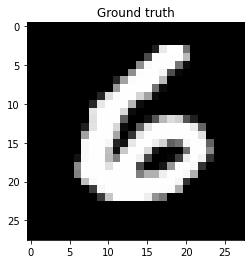

 44%|████▍     | 88004/200000 [1:07:39<2:13:17, 14.00it/s]

Validation loss for the function plotted:                                     -0.619


 45%|████▍     | 89998/200000 [1:09:02<1:11:53, 25.50it/s]

Mean training loss at epoch 90000 :                         -0.571
Mean Validation loss after 90000 equals                     -0.592



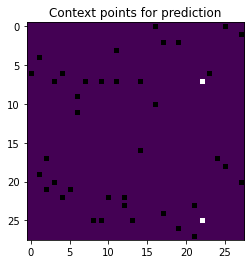

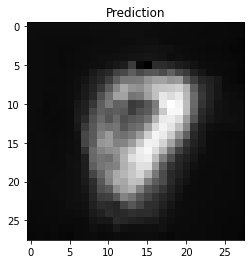

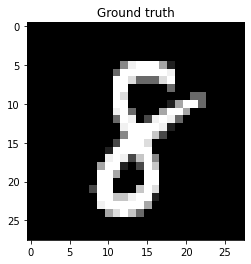

 45%|████▌     | 90004/200000 [1:09:03<2:09:17, 14.18it/s]

Validation loss for the function plotted:                                     -0.521


 46%|████▌     | 92000/200000 [1:10:28<1:10:08, 25.66it/s]

Mean training loss at epoch 92000 :                         -0.779
Mean Validation loss after 92000 equals                     -0.509



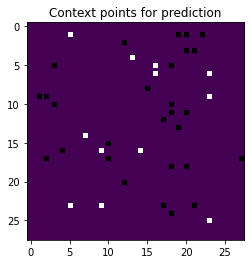

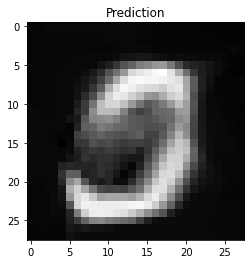

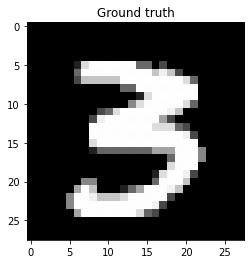

 46%|████▌     | 92003/200000 [1:10:29<2:23:36, 12.53it/s]

Validation loss for the function plotted:                                     -0.629


 47%|████▋     | 93999/200000 [1:11:53<1:20:32, 21.93it/s]

Mean training loss at epoch 94000 :                         -0.791
Mean Validation loss after 94000 equals                     -0.682



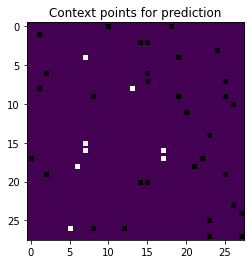

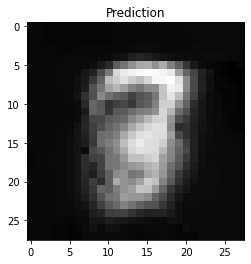

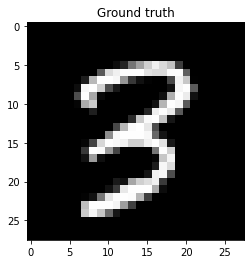

 47%|████▋     | 94005/200000 [1:11:53<2:02:42, 14.40it/s]

Validation loss for the function plotted:                                     -0.738


 48%|████▊     | 95999/200000 [1:13:16<1:09:08, 25.07it/s]

Mean training loss at epoch 96000 :                         -0.609
Mean Validation loss after 96000 equals                     -0.553



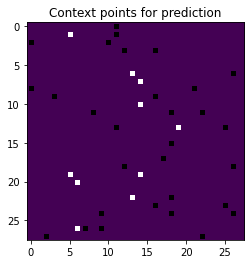

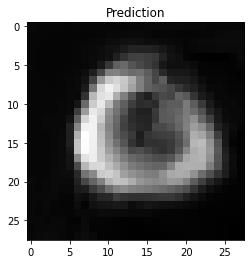

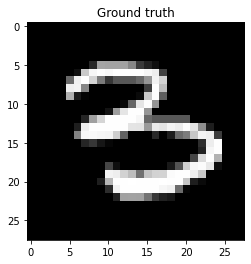

 48%|████▊     | 96005/200000 [1:13:17<2:01:22, 14.28it/s]

Validation loss for the function plotted:                                     -0.399


 49%|████▉     | 97999/200000 [1:14:40<1:08:41, 24.75it/s]

Mean training loss at epoch 98000 :                         -0.64
Mean Validation loss after 98000 equals                     -0.686



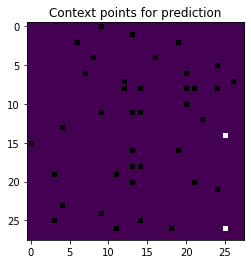

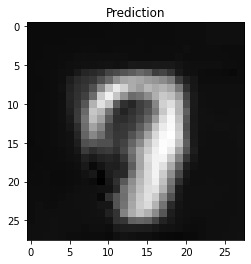

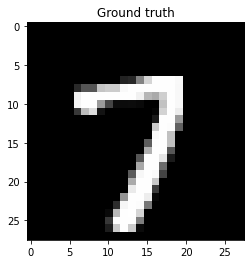

 49%|████▉     | 98005/200000 [1:14:41<1:57:57, 14.41it/s]

Validation loss for the function plotted:                                     -0.611


 50%|████▉     | 99998/200000 [1:16:05<1:12:18, 23.05it/s]

Mean training loss at epoch 100000 :                         -0.719
Mean Validation loss after 100000 equals                     -0.645



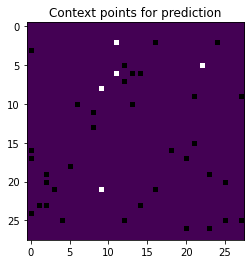

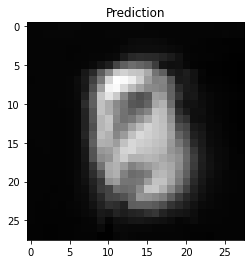

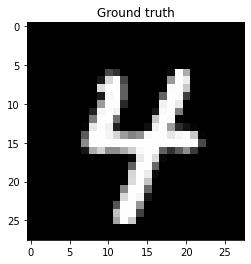

 50%|█████     | 100003/200000 [1:16:06<2:00:22, 13.85it/s]

Validation loss for the function plotted:                                     -0.582


 51%|█████     | 101999/200000 [1:17:32<1:00:29, 27.00it/s]

Mean training loss at epoch 102000 :                         -0.588
Mean Validation loss after 102000 equals                     -0.625



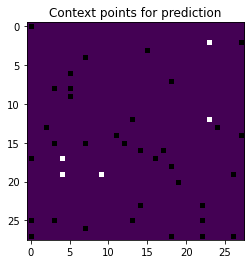

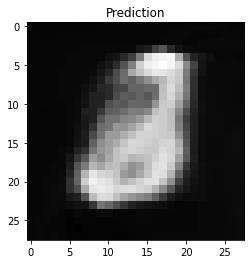

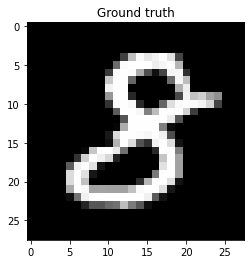

 51%|█████     | 102005/200000 [1:17:32<1:51:30, 14.65it/s]

Validation loss for the function plotted:                                     -0.645


 52%|█████▏    | 104000/200000 [1:18:56<1:09:02, 23.18it/s]

Mean training loss at epoch 104000 :                         -0.618
Mean Validation loss after 104000 equals                     -0.493



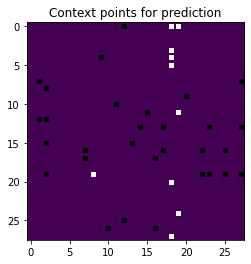

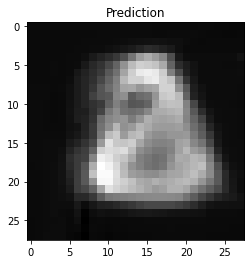

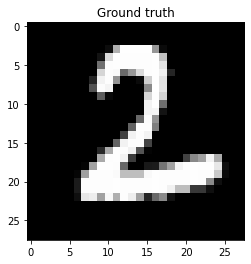

 52%|█████▏    | 104006/200000 [1:18:57<1:48:50, 14.70it/s]

Validation loss for the function plotted:                                     -0.608


 53%|█████▎    | 106000/200000 [1:20:23<1:02:24, 25.11it/s]

Mean training loss at epoch 106000 :                         -0.635
Mean Validation loss after 106000 equals                     -0.722



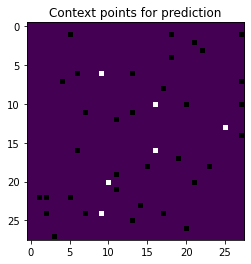

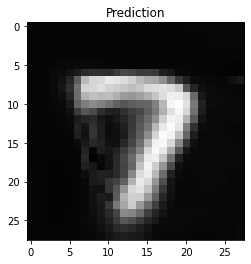

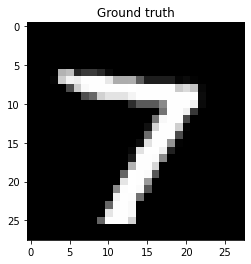

 53%|█████▎    | 106003/200000 [1:20:24<2:07:18, 12.31it/s]

Validation loss for the function plotted:                                     -0.757


 54%|█████▍    | 107999/200000 [1:21:49<1:03:07, 24.29it/s]

Mean training loss at epoch 108000 :                         -0.684
Mean Validation loss after 108000 equals                     -0.554



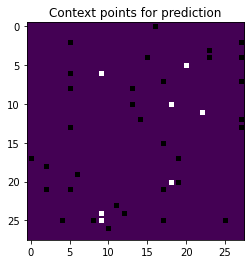

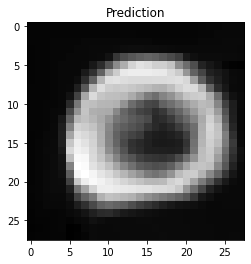

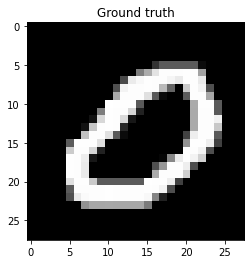

 54%|█████▍    | 108005/200000 [1:21:49<1:45:46, 14.49it/s]

Validation loss for the function plotted:                                     -0.585


 55%|█████▍    | 109998/200000 [1:23:12<1:06:24, 22.59it/s]

Mean training loss at epoch 110000 :                         -0.443
Mean Validation loss after 110000 equals                     -0.74



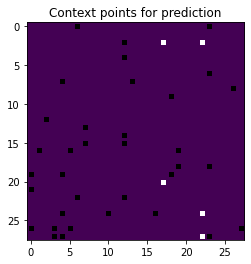

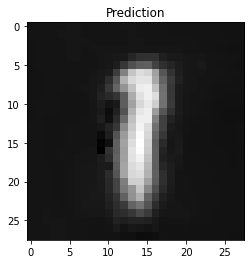

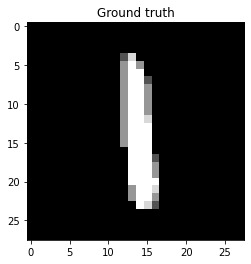

 55%|█████▌    | 110005/200000 [1:23:13<1:44:12, 14.39it/s]

Validation loss for the function plotted:                                     -0.827


 56%|█████▌    | 111998/200000 [1:24:36<1:00:02, 24.43it/s]

Mean training loss at epoch 112000 :                         -0.768
Mean Validation loss after 112000 equals                     -0.467



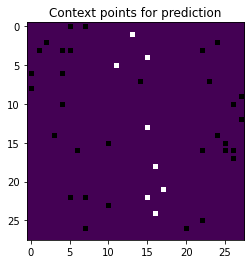

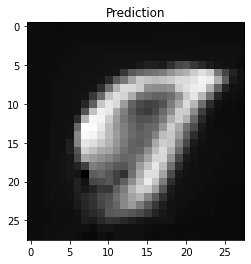

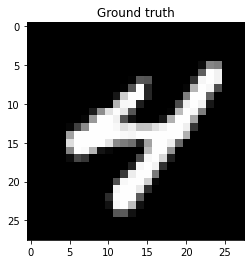

 56%|█████▌    | 112004/200000 [1:24:37<1:43:58, 14.11it/s]

Validation loss for the function plotted:                                     -0.525


 57%|█████▋    | 113998/200000 [1:26:01<59:40, 24.02it/s]  

Mean training loss at epoch 114000 :                         -0.524
Mean Validation loss after 114000 equals                     -0.523



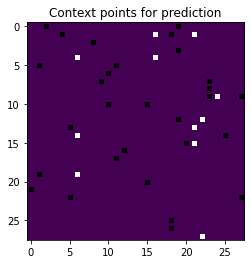

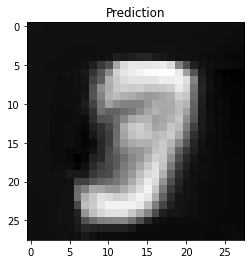

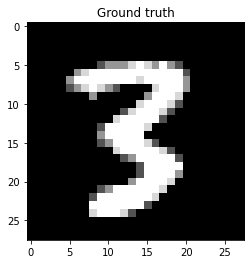

 57%|█████▋    | 114004/200000 [1:26:01<1:35:41, 14.98it/s]

Validation loss for the function plotted:                                     -0.333


 58%|█████▊    | 115998/200000 [1:27:26<1:00:08, 23.28it/s]

Mean training loss at epoch 116000 :                         -0.723
Mean Validation loss after 116000 equals                     -0.565



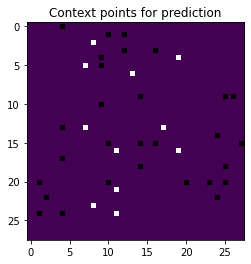

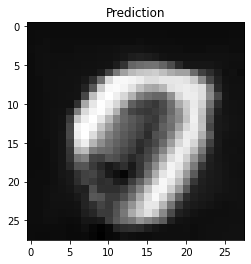

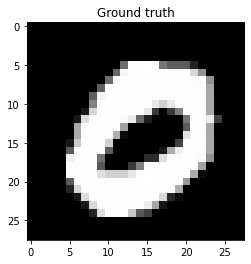

 58%|█████▊    | 116003/200000 [1:27:27<1:44:13, 13.43it/s]

Validation loss for the function plotted:                                     -0.586


 59%|█████▉    | 117999/200000 [1:28:54<1:03:07, 21.65it/s]

Mean training loss at epoch 118000 :                         -0.642
Mean Validation loss after 118000 equals                     -0.707



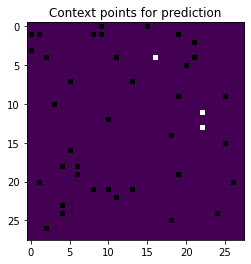

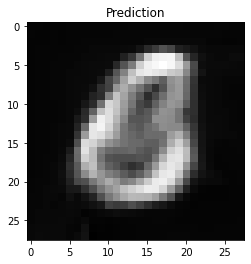

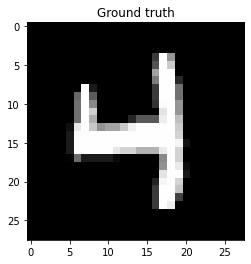

 59%|█████▉    | 118005/200000 [1:28:55<1:38:05, 13.93it/s]

Validation loss for the function plotted:                                     -0.689


 60%|██████    | 120000/200000 [1:30:30<55:16, 24.12it/s]  

Mean training loss at epoch 120000 :                         -0.849
Mean Validation loss after 120000 equals                     -0.622



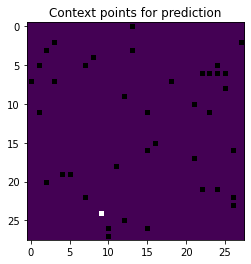

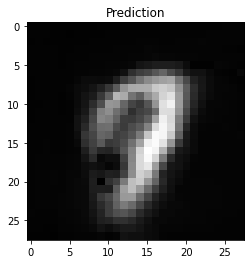

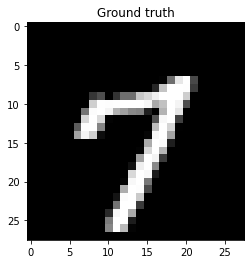

 60%|██████    | 120003/200000 [1:30:31<1:54:57, 11.60it/s]

Validation loss for the function plotted:                                     -0.699


 61%|██████    | 121999/200000 [1:32:04<54:11, 23.99it/s]  

Mean training loss at epoch 122000 :                         -0.708
Mean Validation loss after 122000 equals                     -0.663



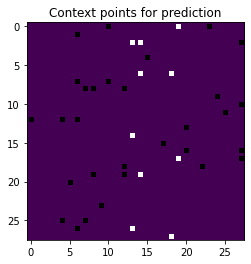

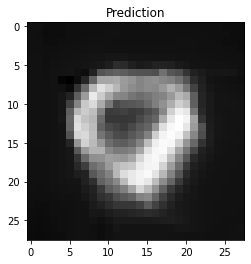

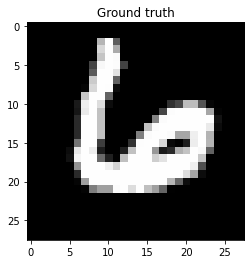

 61%|██████    | 122005/200000 [1:32:05<1:31:37, 14.19it/s]

Validation loss for the function plotted:                                     -0.656


 62%|██████▏   | 124000/200000 [1:33:38<1:08:55, 18.38it/s]

Mean training loss at epoch 124000 :                         -0.785
Mean Validation loss after 124000 equals                     -0.613



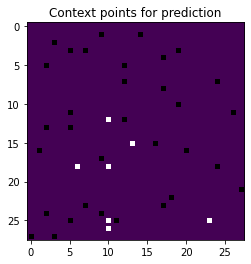

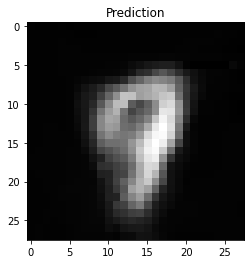

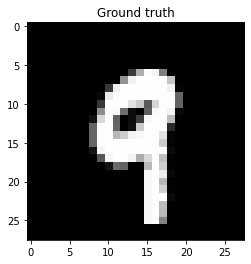

 62%|██████▏   | 124004/200000 [1:33:39<2:00:55, 10.47it/s]

Validation loss for the function plotted:                                     -0.826


 63%|██████▎   | 125998/200000 [1:35:04<59:12, 20.83it/s]  

Mean training loss at epoch 126000 :                         -0.54
Mean Validation loss after 126000 equals                     -0.647



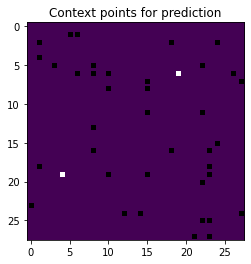

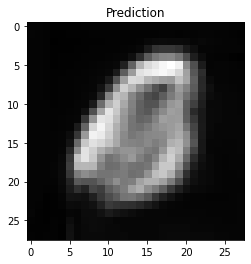

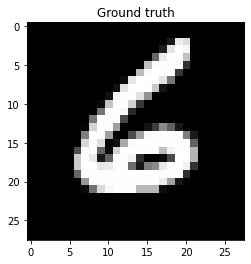

 63%|██████▎   | 126004/200000 [1:35:05<1:32:46, 13.29it/s]

Validation loss for the function plotted:                                     -0.637


 64%|██████▍   | 127999/200000 [1:36:30<49:33, 24.22it/s]  

Mean training loss at epoch 128000 :                         -0.704
Mean Validation loss after 128000 equals                     -0.631



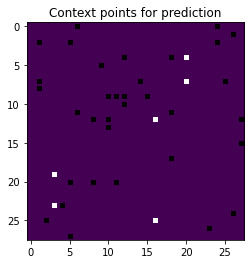

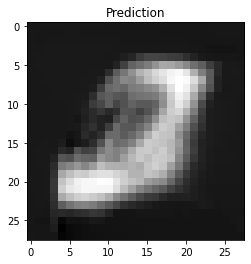

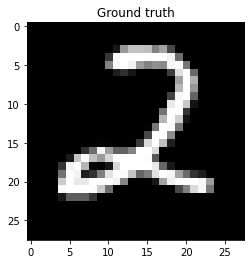

 64%|██████▍   | 128005/200000 [1:36:31<1:25:11, 14.08it/s]

Validation loss for the function plotted:                                     -0.567


 65%|██████▌   | 130000/200000 [1:38:02<46:42, 24.98it/s]  

Mean training loss at epoch 130000 :                         -0.716
Mean Validation loss after 130000 equals                     -0.536



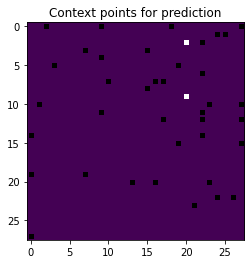

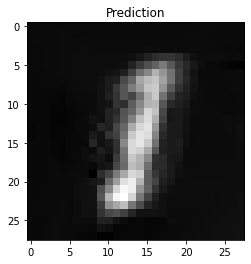

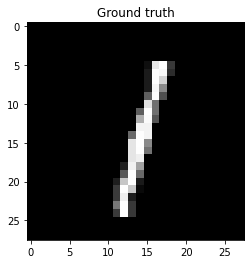

 65%|██████▌   | 130003/200000 [1:38:03<1:35:58, 12.16it/s]

Validation loss for the function plotted:                                     -0.596


 66%|██████▌   | 132000/200000 [1:39:36<1:13:20, 15.45it/s]

Mean training loss at epoch 132000 :                         -0.648
Mean Validation loss after 132000 equals                     -0.592



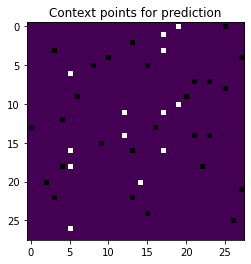

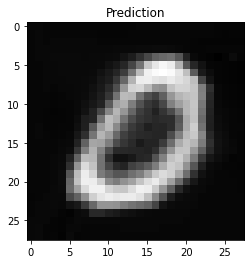

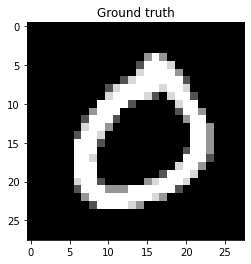

 66%|██████▌   | 132004/200000 [1:39:37<2:02:39,  9.24it/s]

Validation loss for the function plotted:                                     -0.634


 67%|██████▋   | 133998/200000 [1:41:15<43:10, 25.48it/s]  

Mean training loss at epoch 134000 :                         -0.834
Mean Validation loss after 134000 equals                     -0.696



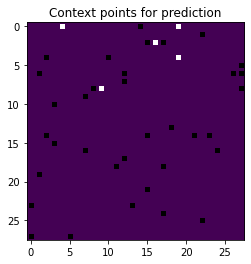

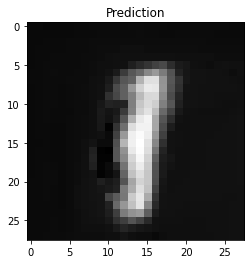

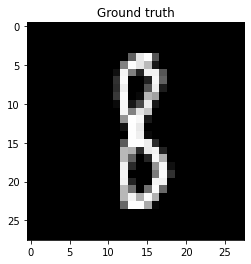

 67%|██████▋   | 134004/200000 [1:41:15<1:15:56, 14.49it/s]

Validation loss for the function plotted:                                     -0.817


 68%|██████▊   | 135999/200000 [1:42:48<53:01, 20.12it/s]  

Mean training loss at epoch 136000 :                         -0.704
Mean Validation loss after 136000 equals                     -0.439



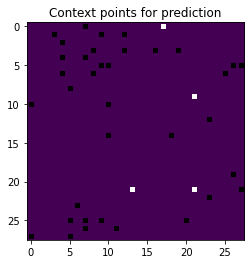

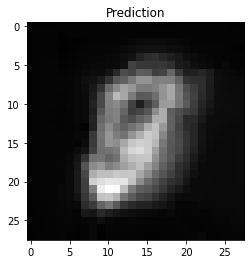

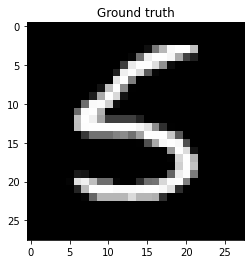

 68%|██████▊   | 136005/200000 [1:42:49<1:25:00, 12.55it/s]

Validation loss for the function plotted:                                     -0.386


 69%|██████▉   | 138000/200000 [1:44:21<49:53, 20.71it/s]  

Mean training loss at epoch 138000 :                         -0.833
Mean Validation loss after 138000 equals                     -0.702



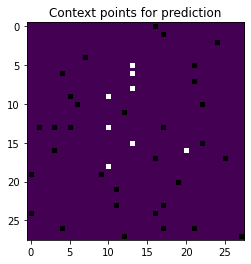

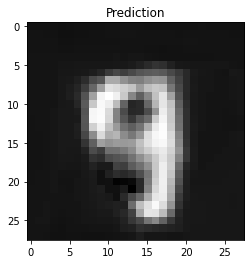

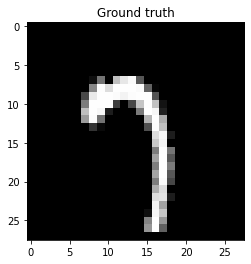

Validation loss for the function plotted:                                     -0.681


 70%|██████▉   | 139999/200000 [1:45:54<46:50, 21.35it/s]  

Mean training loss at epoch 140000 :                         -0.7
Mean Validation loss after 140000 equals                     -0.684



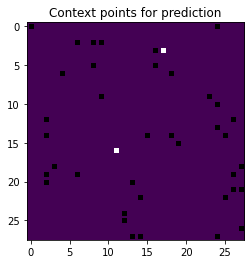

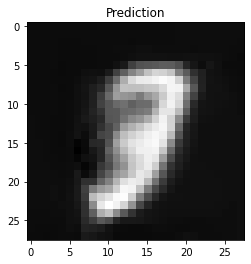

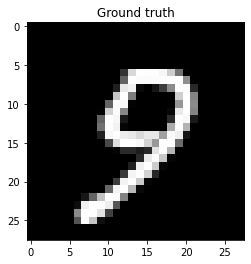

 70%|███████   | 140005/200000 [1:45:55<1:16:19, 13.10it/s]

Validation loss for the function plotted:                                     -0.645


 71%|███████   | 142000/200000 [1:47:31<42:26, 22.77it/s]  

Mean training loss at epoch 142000 :                         -0.807
Mean Validation loss after 142000 equals                     -0.72



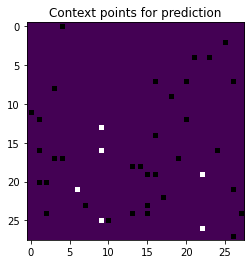

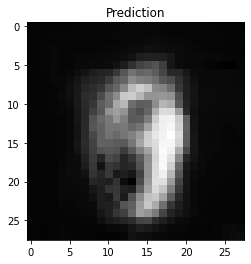

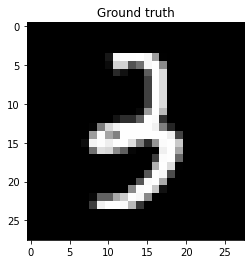

 71%|███████   | 142003/200000 [1:47:31<1:35:01, 10.17it/s]

Validation loss for the function plotted:                                     -0.666


 72%|███████▏  | 143998/200000 [1:49:06<44:48, 20.83it/s]  

Mean training loss at epoch 144000 :                         -0.892
Mean Validation loss after 144000 equals                     -0.697



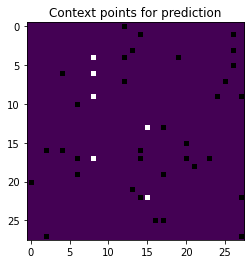

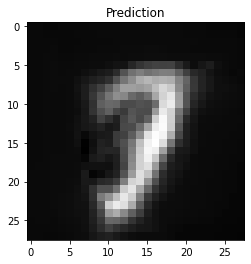

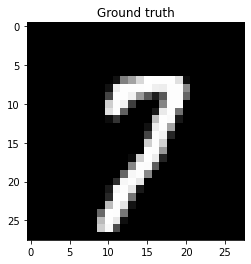

 72%|███████▏  | 144004/200000 [1:49:07<1:08:24, 13.64it/s]

Validation loss for the function plotted:                                     -0.672


 73%|███████▎  | 146000/200000 [1:50:46<56:53, 15.82it/s]  

Mean training loss at epoch 146000 :                         -0.623
Mean Validation loss after 146000 equals                     -0.624



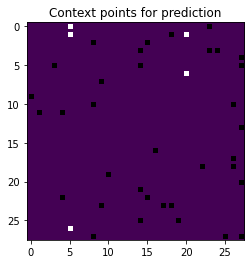

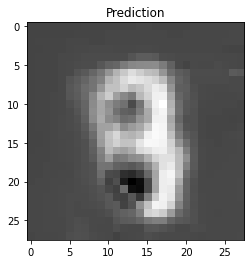

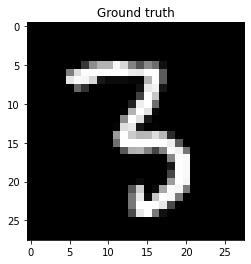

 73%|███████▎  | 146005/200000 [1:50:47<1:30:42,  9.92it/s]

Validation loss for the function plotted:                                     -0.626


 74%|███████▍  | 147998/200000 [1:52:21<36:28, 23.76it/s]  

Mean training loss at epoch 148000 :                         -0.665
Mean Validation loss after 148000 equals                     -0.504



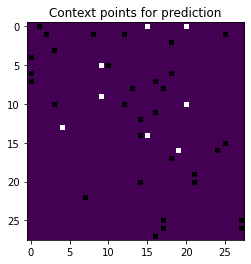

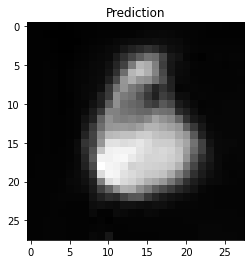

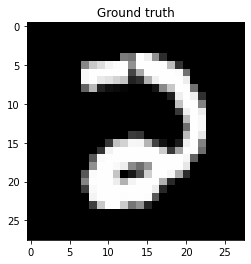

 74%|███████▍  | 148004/200000 [1:52:21<1:01:14, 14.15it/s]

Validation loss for the function plotted:                                     -0.206


 75%|███████▍  | 149998/200000 [1:53:52<37:11, 22.40it/s]  

Mean training loss at epoch 150000 :                         -0.836
Mean Validation loss after 150000 equals                     -0.574



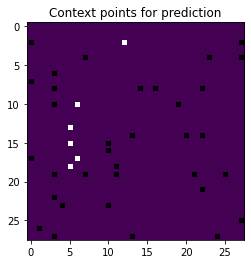

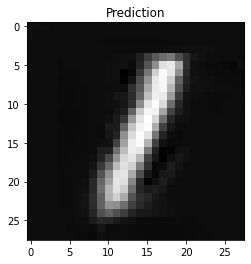

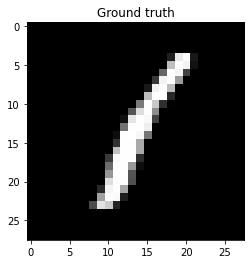

 75%|███████▌  | 150004/200000 [1:53:53<1:02:06, 13.42it/s]

Validation loss for the function plotted:                                     -0.628


 76%|███████▌  | 151999/200000 [1:55:27<34:18, 23.32it/s]  

Mean training loss at epoch 152000 :                         -0.811
Mean Validation loss after 152000 equals                     -0.733



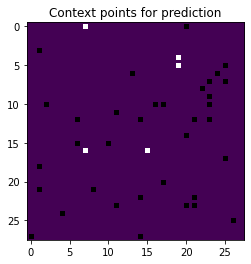

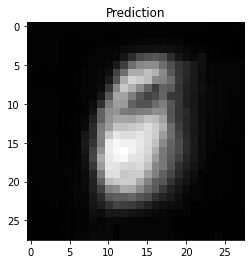

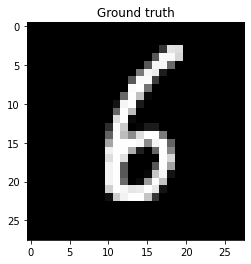

 76%|███████▌  | 152004/200000 [1:55:28<1:03:46, 12.54it/s]

Validation loss for the function plotted:                                     -0.787


 77%|███████▋  | 154000/200000 [1:57:08<36:01, 21.28it/s]  

Mean training loss at epoch 154000 :                         -0.874
Mean Validation loss after 154000 equals                     -0.592



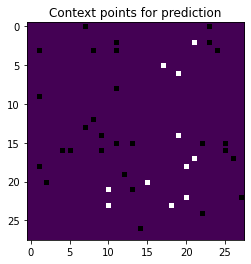

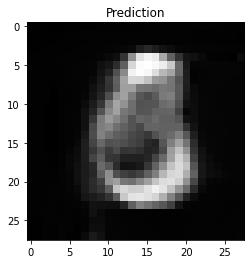

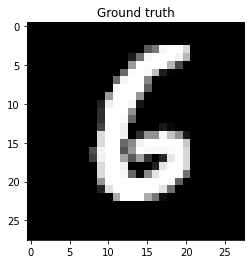

 77%|███████▋  | 154006/200000 [1:57:09<54:31, 14.06it/s]  

Validation loss for the function plotted:                                     -0.689


 78%|███████▊  | 155999/200000 [1:59:08<42:50, 17.11it/s]  

Mean training loss at epoch 156000 :                         -0.852
Mean Validation loss after 156000 equals                     -0.561



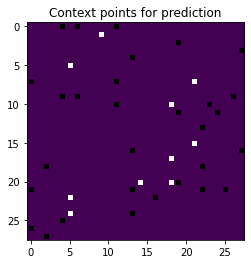

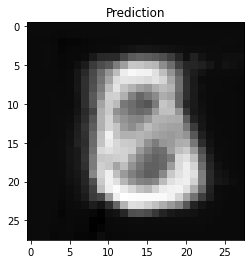

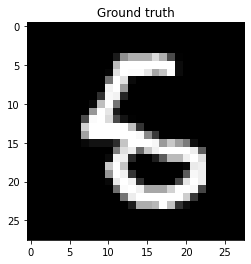

 78%|███████▊  | 156003/200000 [1:59:09<1:32:06,  7.96it/s]

Validation loss for the function plotted:                                     -0.501


 79%|███████▉  | 158000/200000 [2:01:15<38:49, 18.03it/s]  

Mean training loss at epoch 158000 :                         -0.749
Mean Validation loss after 158000 equals                     -0.577



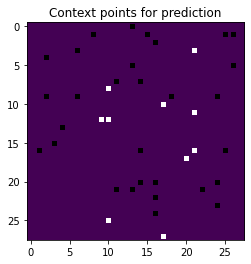

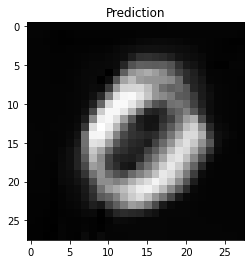

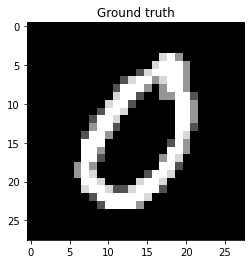

 79%|███████▉  | 158004/200000 [2:01:16<1:21:01,  8.64it/s]

Validation loss for the function plotted:                                     -0.602


 80%|███████▉  | 159999/200000 [2:03:19<46:31, 14.33it/s]  

Mean training loss at epoch 160000 :                         -0.726
Mean Validation loss after 160000 equals                     -0.499



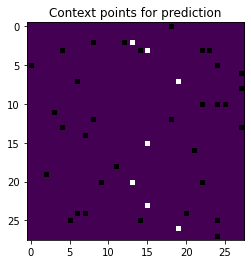

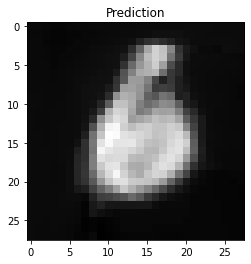

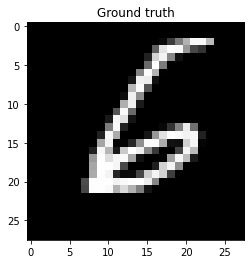

 80%|████████  | 160004/200000 [2:03:19<1:21:34,  8.17it/s]

Validation loss for the function plotted:                                     -0.608


 81%|████████  | 161999/200000 [2:05:30<41:06, 15.41it/s]  

Mean training loss at epoch 162000 :                         -0.853
Mean Validation loss after 162000 equals                     -0.613



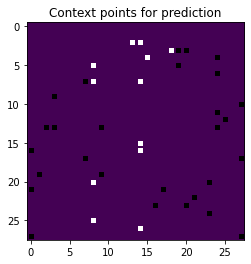

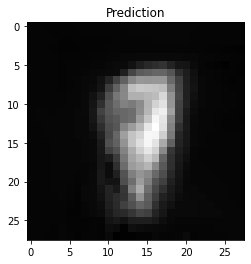

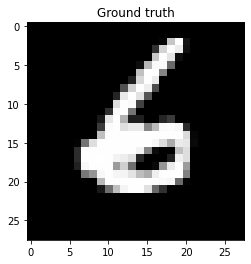

 81%|████████  | 162003/200000 [2:05:31<1:23:02,  7.63it/s]

Validation loss for the function plotted:                                     -0.579


 82%|████████▏ | 164000/200000 [2:07:42<40:00, 15.00it/s]  

Mean training loss at epoch 164000 :                         -0.539
Mean Validation loss after 164000 equals                     -0.702



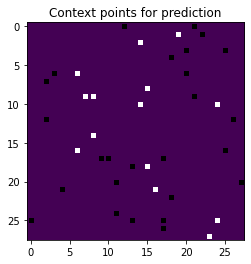

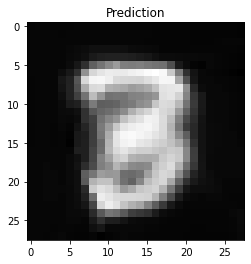

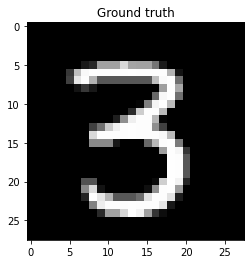

 82%|████████▏ | 164002/200000 [2:07:43<1:45:21,  5.69it/s]

Validation loss for the function plotted:                                     -0.602


 83%|████████▎ | 165999/200000 [2:09:55<37:24, 15.15it/s]  

Mean training loss at epoch 166000 :                         -0.735
Mean Validation loss after 166000 equals                     -0.645



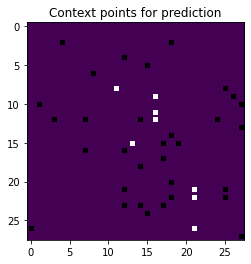

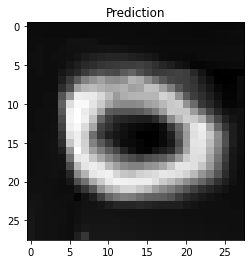

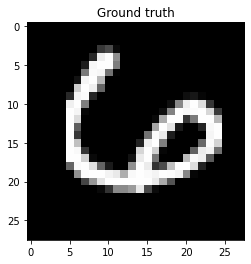

 83%|████████▎ | 166003/200000 [2:09:56<1:10:29,  8.04it/s]

Validation loss for the function plotted:                                     -0.62


 84%|████████▍ | 167999/200000 [2:12:17<35:40, 14.95it/s]  

Mean training loss at epoch 168000 :                         -0.707
Mean Validation loss after 168000 equals                     -0.71



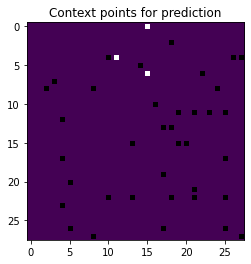

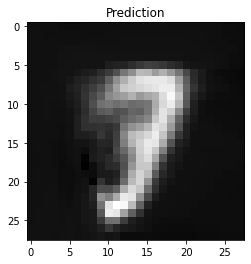

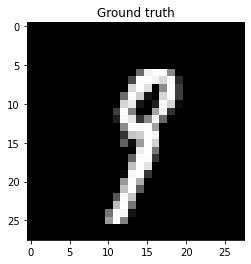

 84%|████████▍ | 168003/200000 [2:12:18<1:08:55,  7.74it/s]

Validation loss for the function plotted:                                     -0.7


 85%|████████▍ | 169999/200000 [2:14:29<34:10, 14.63it/s]  

Mean training loss at epoch 170000 :                         -0.69
Mean Validation loss after 170000 equals                     -0.629



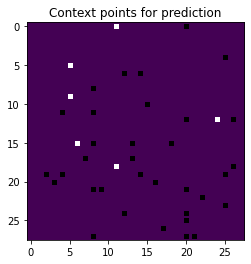

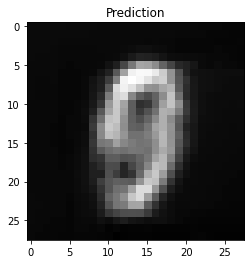

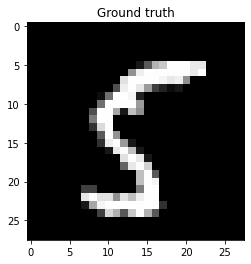

 85%|████████▌ | 170003/200000 [2:14:30<1:10:16,  7.11it/s]

Validation loss for the function plotted:                                     -0.452


 86%|████████▌ | 171998/200000 [2:16:49<27:27, 17.00it/s]  

Mean training loss at epoch 172000 :                         -0.704
Mean Validation loss after 172000 equals                     -0.726



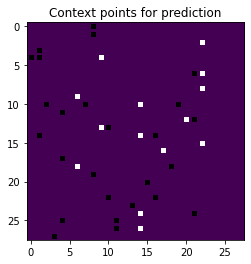

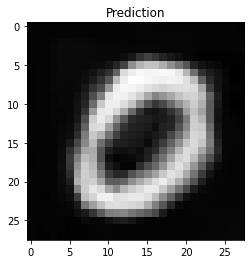

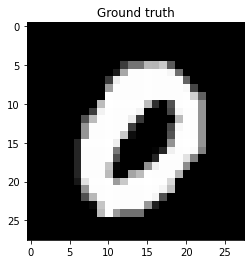

 86%|████████▌ | 172003/200000 [2:16:50<46:52,  9.95it/s]

Validation loss for the function plotted:                                     -0.678


 87%|████████▋ | 173999/200000 [2:19:08<45:26,  9.54it/s]  

Mean training loss at epoch 174000 :                         -0.675
Mean Validation loss after 174000 equals                     -0.547



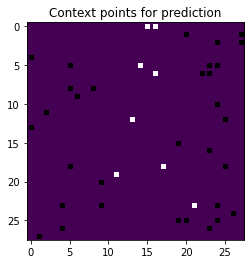

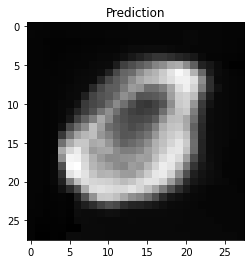

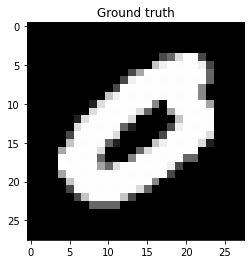

 87%|████████▋ | 174003/200000 [2:19:09<1:10:06,  6.18it/s]

Validation loss for the function plotted:                                     -0.649


 88%|████████▊ | 176000/200000 [2:21:32<30:23, 13.16it/s]  

Mean training loss at epoch 176000 :                         -0.377
Mean Validation loss after 176000 equals                     -0.781



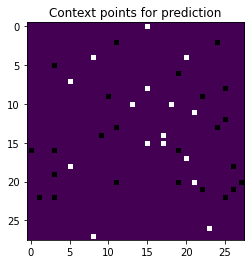

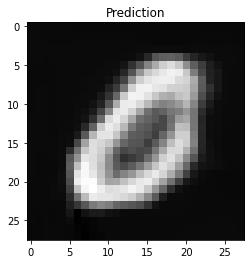

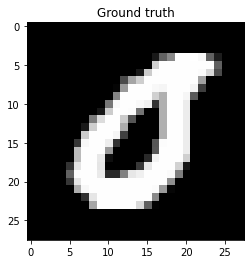

 88%|████████▊ | 176002/200000 [2:21:33<1:07:04,  5.96it/s]

Validation loss for the function plotted:                                     -0.86


 89%|████████▉ | 178000/200000 [2:23:47<25:29, 14.38it/s]  

Mean training loss at epoch 178000 :                         -0.825
Mean Validation loss after 178000 equals                     -0.558



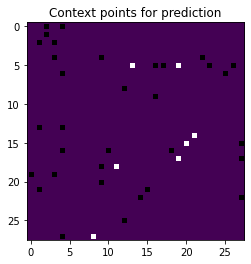

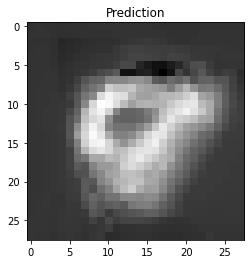

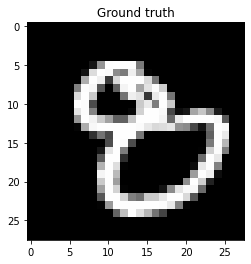

 89%|████████▉ | 178004/200000 [2:23:48<48:51,  7.50it/s]  

Validation loss for the function plotted:                                     -0.499


 90%|█████████ | 180000/200000 [2:26:15<23:13, 14.36it/s]  

Mean training loss at epoch 180000 :                         -0.621
Mean Validation loss after 180000 equals                     -0.639



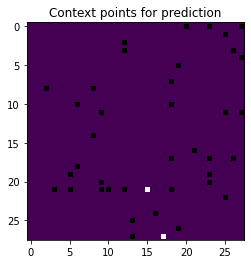

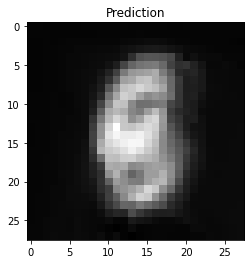

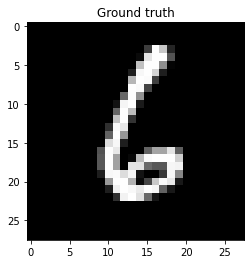

 90%|█████████ | 180004/200000 [2:26:16<42:38,  7.82it/s]

Validation loss for the function plotted:                                     -0.694


 91%|█████████ | 182000/200000 [2:28:42<19:29, 15.39it/s]  

Mean training loss at epoch 182000 :                         -0.671
Mean Validation loss after 182000 equals                     -0.626



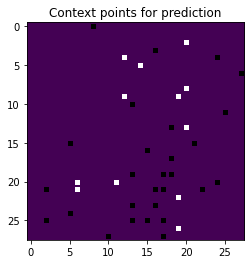

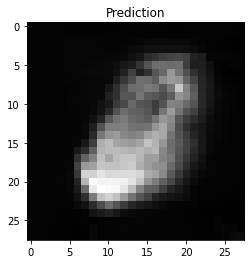

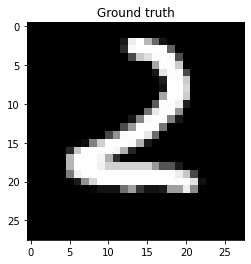

 91%|█████████ | 182004/200000 [2:28:43<39:45,  7.54it/s]

Validation loss for the function plotted:                                     -0.528


 92%|█████████▏| 184000/200000 [2:31:14<18:17, 14.57it/s]  

Mean training loss at epoch 184000 :                         -0.846
Mean Validation loss after 184000 equals                     -0.688



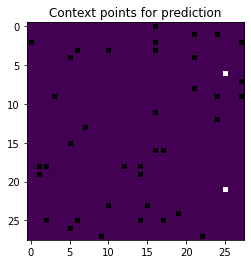

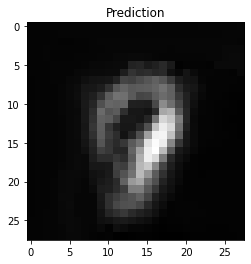

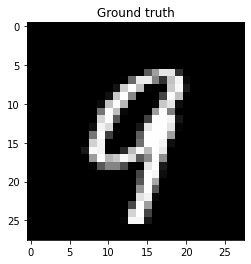

 92%|█████████▏| 184004/200000 [2:31:15<35:14,  7.57it/s]

Validation loss for the function plotted:                                     -0.74


 93%|█████████▎| 186000/200000 [2:33:25<17:17, 13.49it/s]

Mean training loss at epoch 186000 :                         -0.615
Mean Validation loss after 186000 equals                     -0.538



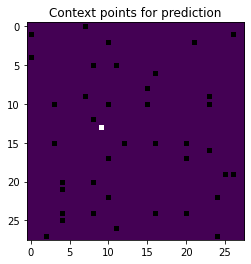

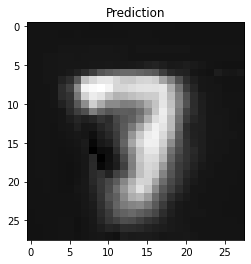

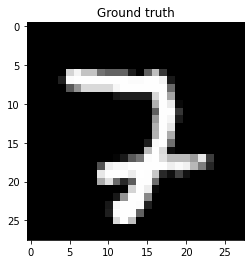

 93%|█████████▎| 186002/200000 [2:33:26<40:13,  5.80it/s]

Validation loss for the function plotted:                                     -0.634


 94%|█████████▍| 187999/200000 [2:35:47<14:30, 13.79it/s]

Mean training loss at epoch 188000 :                         -0.723
Mean Validation loss after 188000 equals                     -0.423



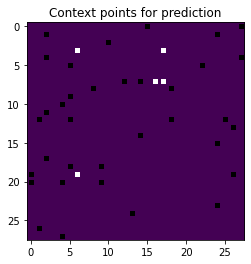

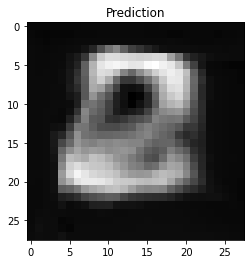

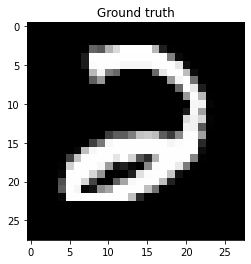

 94%|█████████▍| 188003/200000 [2:35:48<27:18,  7.32it/s]

Validation loss for the function plotted:                                     -0.563


 95%|█████████▌| 190000/200000 [2:38:11<11:15, 14.80it/s]  

Mean training loss at epoch 190000 :                         -0.777
Mean Validation loss after 190000 equals                     -0.638



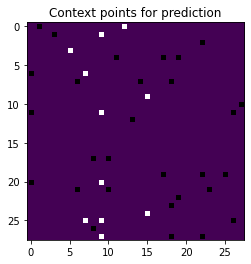

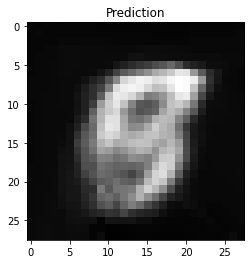

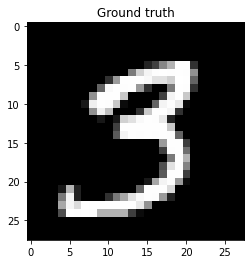

 95%|█████████▌| 190002/200000 [2:38:11<26:53,  6.20it/s]

Validation loss for the function plotted:                                     -0.586


 96%|█████████▌| 192000/200000 [2:40:34<08:25, 15.81it/s]

Mean training loss at epoch 192000 :                         -0.627
Mean Validation loss after 192000 equals                     -0.489



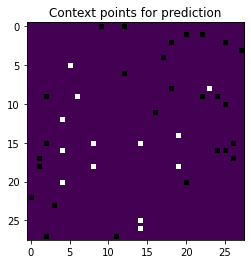

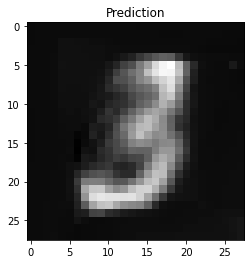

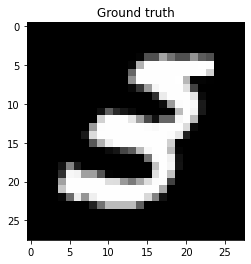

 96%|█████████▌| 192002/200000 [2:40:34<19:59,  6.67it/s]

Validation loss for the function plotted:                                     -0.394


 97%|█████████▋| 193999/200000 [2:42:52<06:37, 15.10it/s]

Mean training loss at epoch 194000 :                         -0.513
Mean Validation loss after 194000 equals                     -0.602



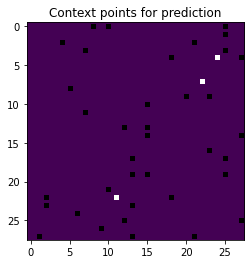

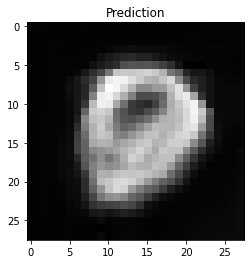

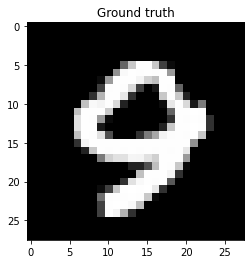

 97%|█████████▋| 194003/200000 [2:42:53<14:05,  7.09it/s]

Validation loss for the function plotted:                                     -0.637


 98%|█████████▊| 195999/200000 [2:45:12<04:59, 13.37it/s]

Mean training loss at epoch 196000 :                         -0.763
Mean Validation loss after 196000 equals                     -0.687



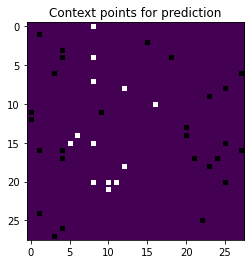

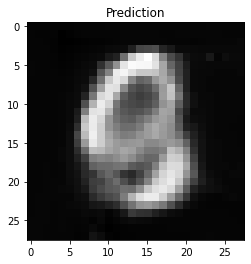

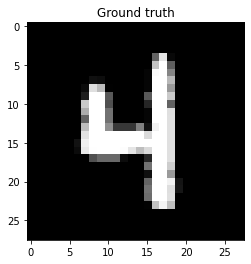

 98%|█████████▊| 196003/200000 [2:45:13<08:51,  7.52it/s]

Validation loss for the function plotted:                                     -0.678


 99%|█████████▉| 198000/200000 [2:47:42<05:11,  6.42it/s]

Mean training loss at epoch 198000 :                         -0.813
Mean Validation loss after 198000 equals                     -0.726



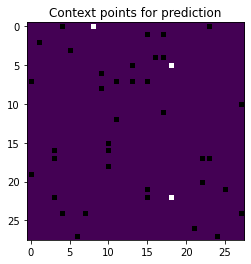

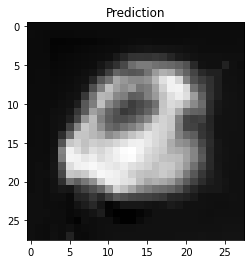

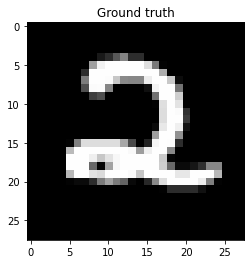

 99%|█████████▉| 198002/200000 [2:47:44<15:12,  2.19it/s]

Validation loss for the function plotted:                                     -0.751


100%|██████████| 200000/200000 [2:50:07<00:00, 19.59it/s]


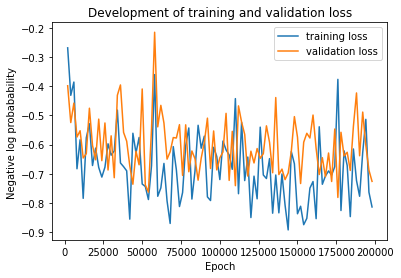

seed is set


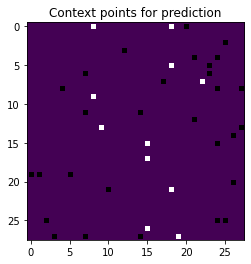

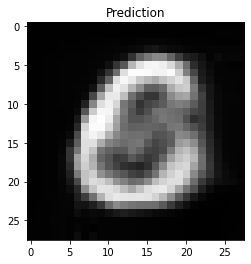

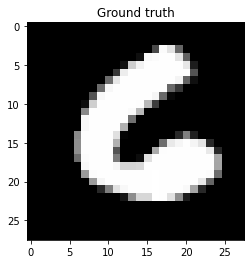

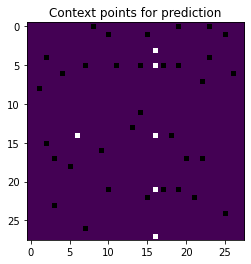

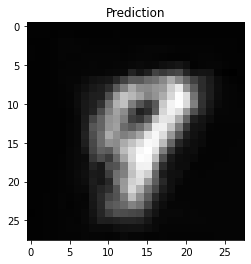

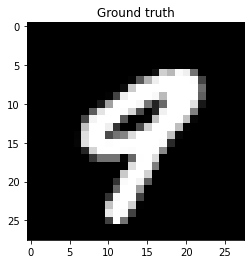

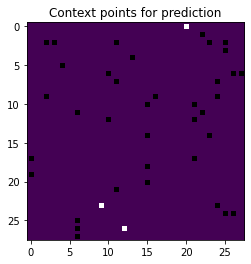

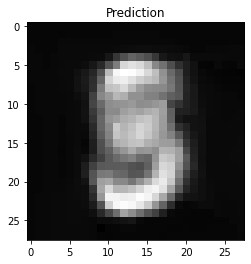

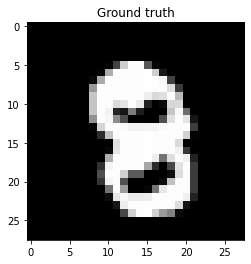

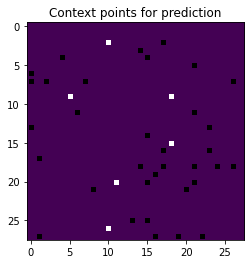

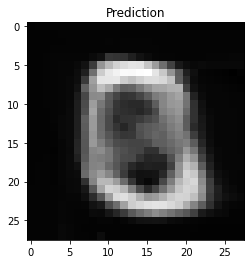

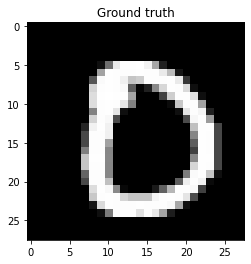

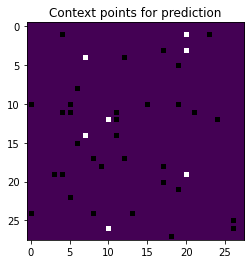

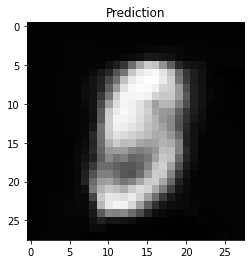

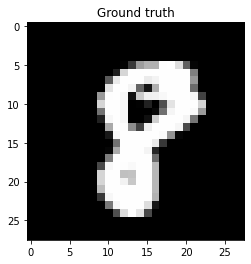

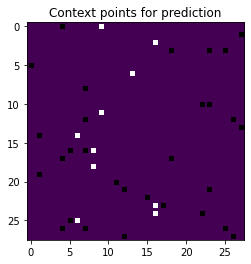

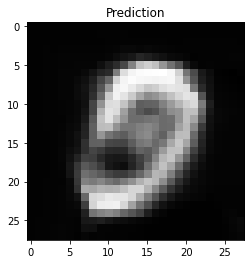

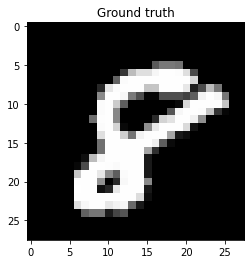

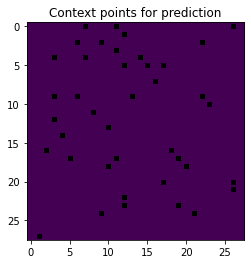

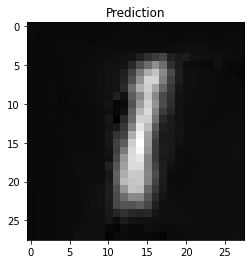

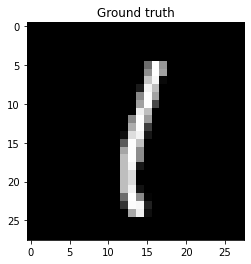

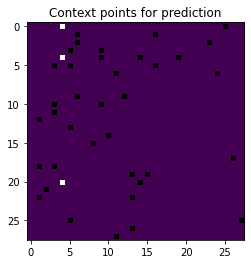

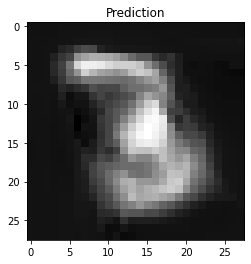

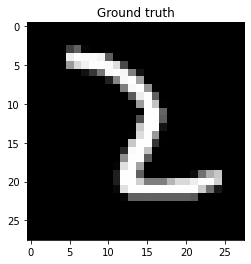

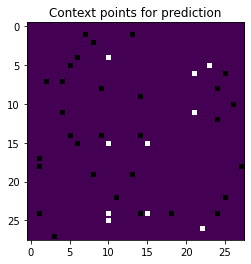

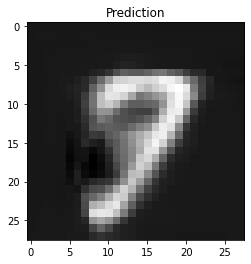

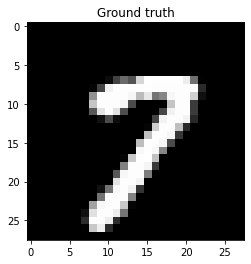

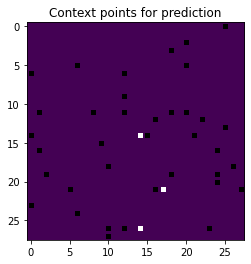

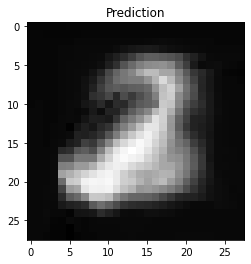

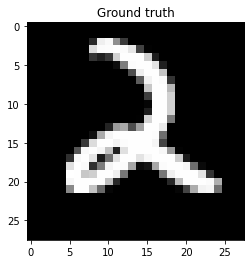

The mean squared error for this experiment is 0.04809390604496002
Creating new directory at experiments/results/greyscale_gated_attention_40ctxt_2020_07_07_17_16
Saving encoder
Saving decoder
Saving aggregator
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config_file


In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs['GatedMLPAggregator']

run_experiment(config_file=attention_exp_config,
               experiment_name='greyscale_gated_attention_40ctxt',
              google_colab=google_colab)

  0%|          | 0/200000 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Mean training loss at epoch 0 :                         0.667
Mean Validation loss after 0 equals                     0.637



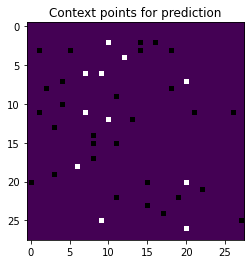

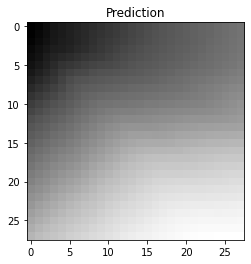

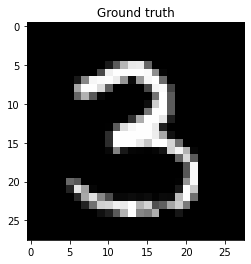

  0%|          | 3/200000 [00:00<33:17:21,  1.67it/s]

Validation loss for the function plotted:                                     0.632


  1%|          | 1998/200000 [02:10<3:34:21, 15.39it/s]

Mean training loss at epoch 2000 :                         -0.312
Mean Validation loss after 2000 equals                     -0.584



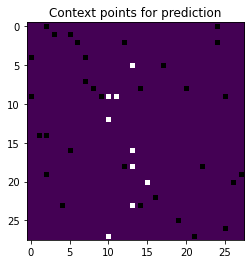

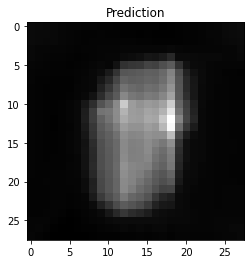

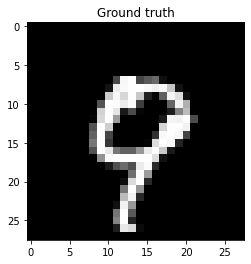

  1%|          | 2003/200000 [02:11<6:03:12,  9.09it/s]

Validation loss for the function plotted:                                     -0.572


  2%|▏         | 3999/200000 [04:25<4:13:03, 12.91it/s] 

Mean training loss at epoch 4000 :                         -0.578
Mean Validation loss after 4000 equals                     -0.5



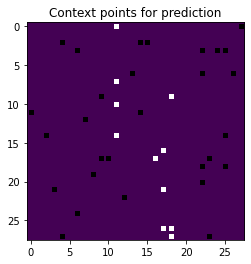

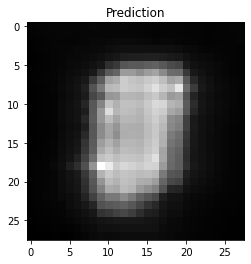

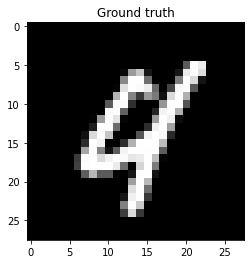

  2%|▏         | 4003/200000 [04:27<11:07:19,  4.90it/s]

Validation loss for the function plotted:                                     -0.434


  3%|▎         | 6000/200000 [06:49<3:38:13, 14.82it/s] 

Mean training loss at epoch 6000 :                         -0.539
Mean Validation loss after 6000 equals                     -0.507



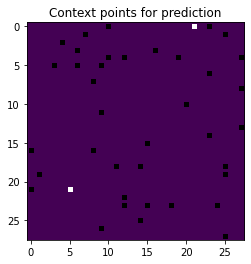

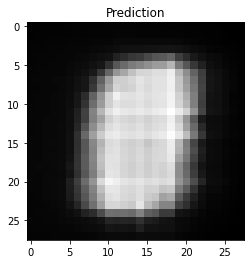

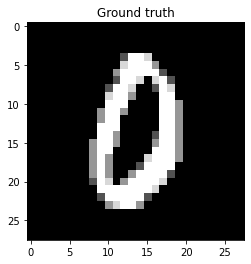

  3%|▎         | 6004/200000 [06:50<7:16:20,  7.41it/s]

Validation loss for the function plotted:                                     -0.534


  4%|▍         | 8000/200000 [09:15<3:38:13, 14.66it/s] 

Mean training loss at epoch 8000 :                         -0.655
Mean Validation loss after 8000 equals                     -0.436



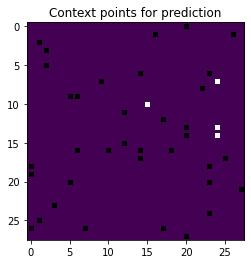

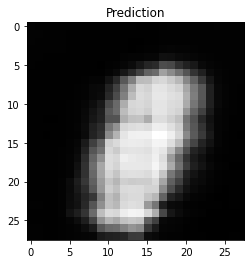

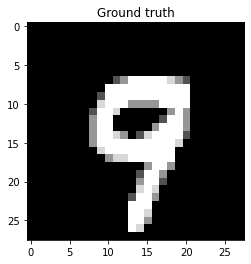

  4%|▍         | 8002/200000 [09:16<9:50:34,  5.42it/s]

Validation loss for the function plotted:                                     -0.478


  5%|▍         | 9999/200000 [11:54<4:15:12, 12.41it/s] 

Mean training loss at epoch 10000 :                         -0.599
Mean Validation loss after 10000 equals                     -0.586



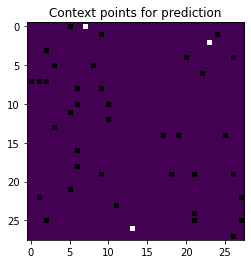

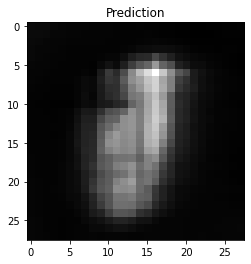

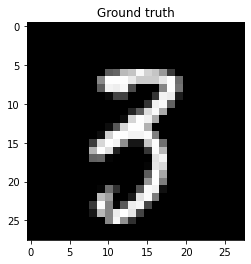

  5%|▌         | 10003/200000 [11:55<7:28:52,  7.05it/s]

Validation loss for the function plotted:                                     -0.694


  6%|▌         | 12000/200000 [14:20<3:06:09, 16.83it/s]

Mean training loss at epoch 12000 :                         -0.683
Mean Validation loss after 12000 equals                     -0.482



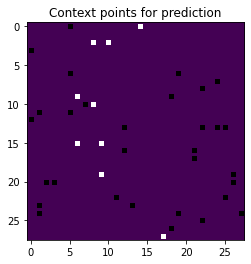

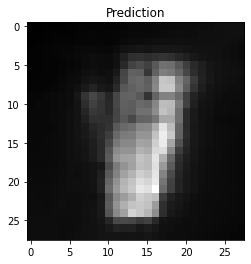

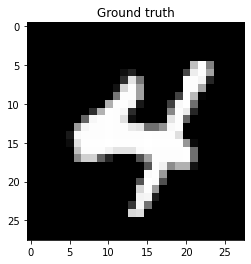

  6%|▌         | 12002/200000 [14:21<9:57:16,  5.25it/s]

Validation loss for the function plotted:                                     -0.438


  7%|▋         | 13999/200000 [17:01<3:36:12, 14.34it/s] 

Mean training loss at epoch 14000 :                         -0.695
Mean Validation loss after 14000 equals                     -0.554



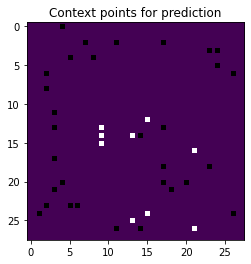

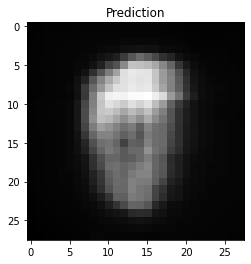

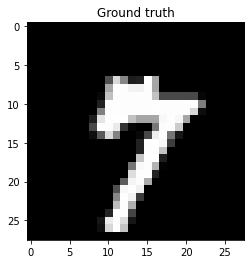

  7%|▋         | 14003/200000 [17:02<7:52:57,  6.55it/s]

Validation loss for the function plotted:                                     -0.568


  8%|▊         | 16000/200000 [19:37<4:20:26, 11.78it/s]

Mean training loss at epoch 16000 :                         -0.811
Mean Validation loss after 16000 equals                     -0.678



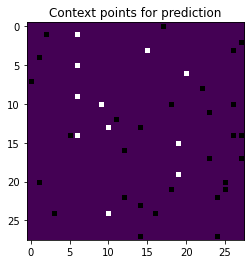

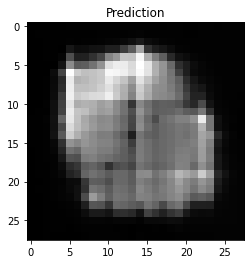

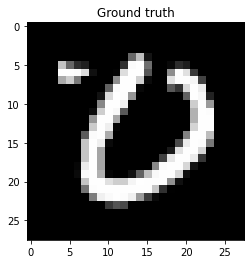

  8%|▊         | 16003/200000 [19:38<8:23:45,  6.09it/s]

Validation loss for the function plotted:                                     -0.715


  9%|▉         | 18000/200000 [22:15<4:19:57, 11.67it/s] 

Mean training loss at epoch 18000 :                         -0.762
Mean Validation loss after 18000 equals                     -0.47



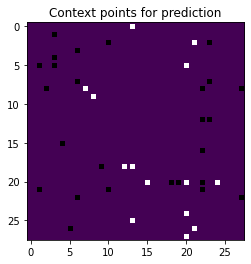

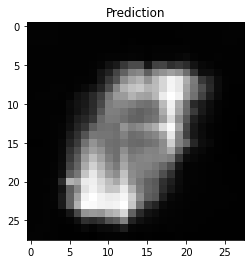

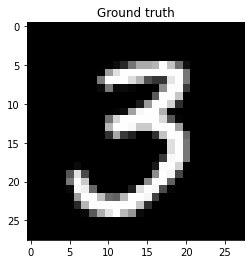

  9%|▉         | 18003/200000 [22:16<9:09:01,  5.52it/s] 

Validation loss for the function plotted:                                     -0.504


 10%|▉         | 19999/200000 [24:51<2:28:33, 20.19it/s] 

Mean training loss at epoch 20000 :                         -0.846
Mean Validation loss after 20000 equals                     -0.674



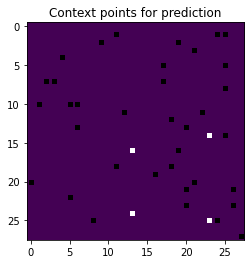

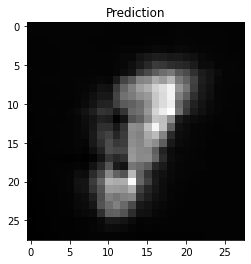

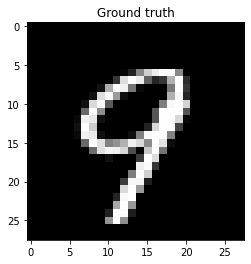

 10%|█         | 20005/200000 [24:52<3:58:53, 12.56it/s]

Validation loss for the function plotted:                                     -0.681


 11%|█         | 22000/200000 [26:48<5:06:09,  9.69it/s]

Mean training loss at epoch 22000 :                         -0.77
Mean Validation loss after 22000 equals                     -0.435



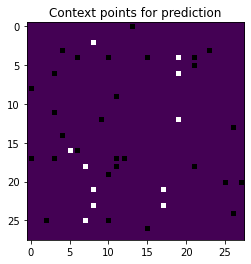

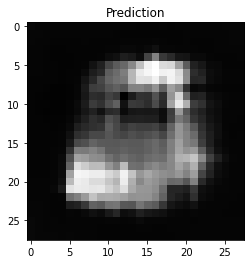

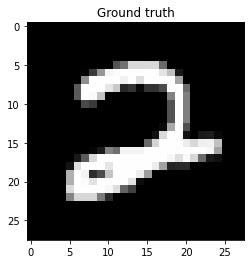

 11%|█         | 22002/200000 [26:49<11:25:12,  4.33it/s]

Validation loss for the function plotted:                                     -0.559


 12%|█▏        | 23999/200000 [29:25<4:37:09, 10.58it/s] 

Mean training loss at epoch 24000 :                         -0.876
Mean Validation loss after 24000 equals                     -0.62



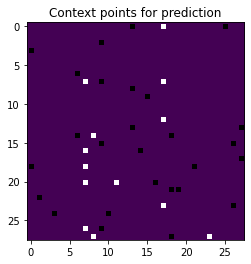

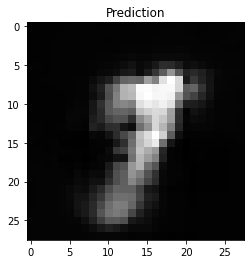

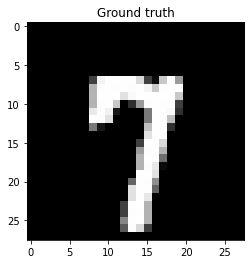

 12%|█▏        | 24003/200000 [29:27<9:50:17,  4.97it/s] 

Validation loss for the function plotted:                                     -0.602


 13%|█▎        | 25999/200000 [32:07<3:34:38, 13.51it/s] 

Mean training loss at epoch 26000 :                         -0.832
Mean Validation loss after 26000 equals                     -0.33



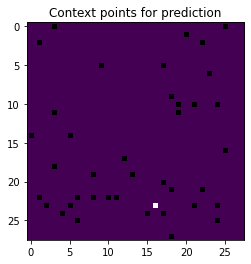

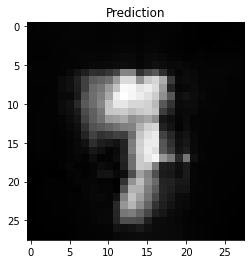

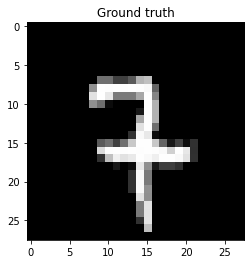

 13%|█▎        | 26003/200000 [32:08<6:43:50,  7.18it/s]

Validation loss for the function plotted:                                     -0.217


 14%|█▍        | 28000/200000 [34:46<3:43:46, 12.81it/s]

Mean training loss at epoch 28000 :                         -0.757
Mean Validation loss after 28000 equals                     -0.398



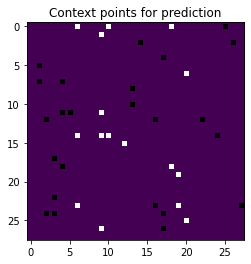

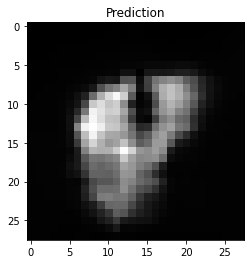

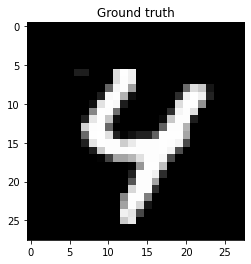

 14%|█▍        | 28002/200000 [34:47<11:09:40,  4.28it/s]

Validation loss for the function plotted:                                     -0.557


 15%|█▌        | 30000/200000 [37:24<3:27:08, 13.68it/s] 

Mean training loss at epoch 30000 :                         -0.825
Mean Validation loss after 30000 equals                     -0.597



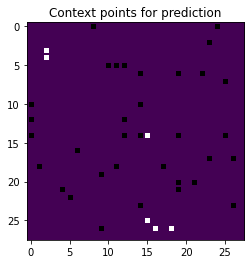

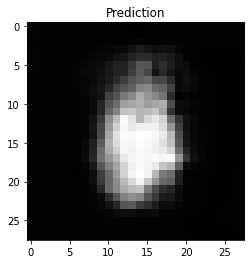

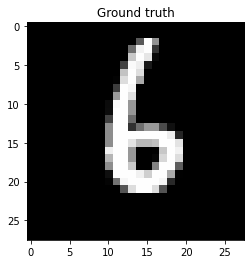

 15%|█▌        | 30002/200000 [37:25<9:07:44,  5.17it/s]

Validation loss for the function plotted:                                     -0.703


 16%|█▌        | 32000/200000 [40:05<3:42:51, 12.56it/s]

Mean training loss at epoch 32000 :                         -0.85
Mean Validation loss after 32000 equals                     -0.684



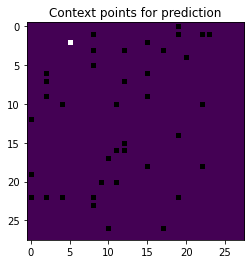

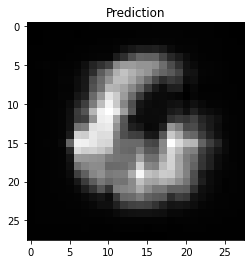

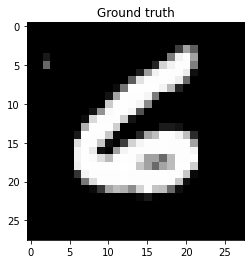

 16%|█▌        | 32002/200000 [40:06<8:48:44,  5.30it/s]

Validation loss for the function plotted:                                     -0.727


 17%|█▋        | 34000/200000 [42:58<4:52:36,  9.46it/s]

Mean training loss at epoch 34000 :                         -0.901
Mean Validation loss after 34000 equals                     -0.617



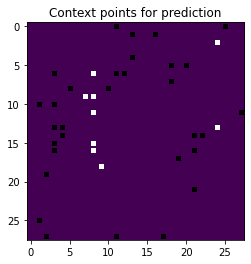

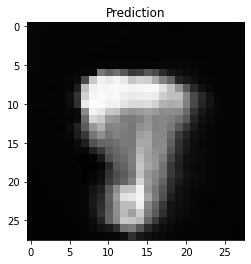

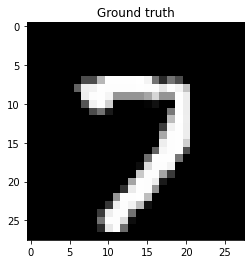

 17%|█▋        | 34002/200000 [42:59<10:25:19,  4.42it/s]

Validation loss for the function plotted:                                     -0.611


 18%|█▊        | 36000/200000 [45:39<3:25:08, 13.32it/s] 

Mean training loss at epoch 36000 :                         -0.771
Mean Validation loss after 36000 equals                     -0.679



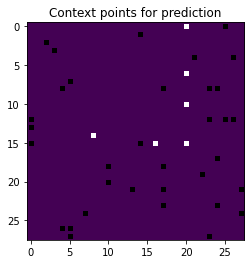

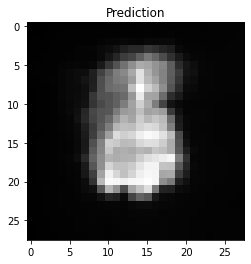

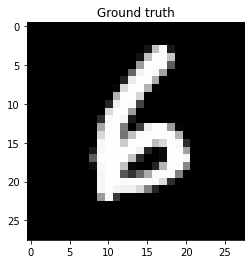

 18%|█▊        | 36004/200000 [45:40<6:24:57,  7.10it/s]

Validation loss for the function plotted:                                     -0.702


 19%|█▉        | 37998/200000 [48:27<3:36:45, 12.46it/s] 

Mean training loss at epoch 38000 :                         -0.838
Mean Validation loss after 38000 equals                     -0.459



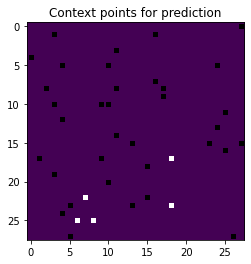

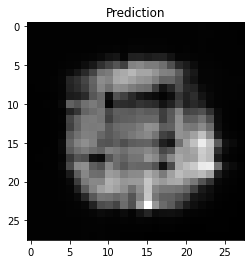

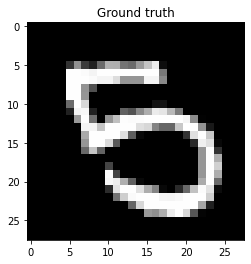

 19%|█▉        | 38003/200000 [48:28<5:45:51,  7.81it/s]

Validation loss for the function plotted:                                     -0.442


 20%|██        | 40000/200000 [50:56<3:02:38, 14.60it/s]

Mean training loss at epoch 40000 :                         -0.894
Mean Validation loss after 40000 equals                     -0.691



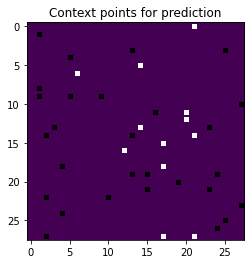

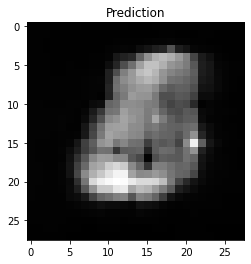

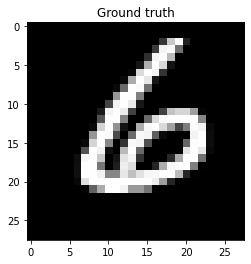

 20%|██        | 40004/200000 [50:57<6:06:14,  7.28it/s]

Validation loss for the function plotted:                                     -0.685


 21%|██        | 41999/200000 [53:17<3:01:50, 14.48it/s]

Mean training loss at epoch 42000 :                         -0.903
Mean Validation loss after 42000 equals                     -0.531



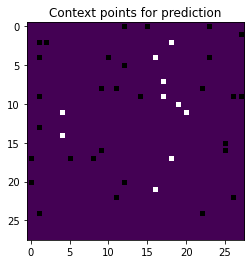

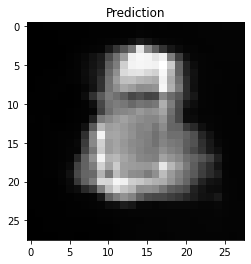

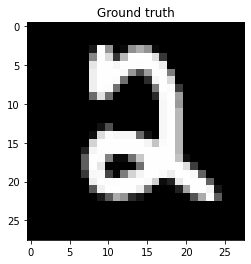

 21%|██        | 42003/200000 [53:19<6:49:40,  6.43it/s]

Validation loss for the function plotted:                                     -0.454


 22%|██▏       | 44000/200000 [55:31<2:33:54, 16.89it/s]

Mean training loss at epoch 44000 :                         -0.941
Mean Validation loss after 44000 equals                     -0.602



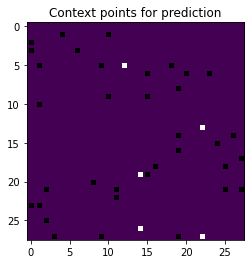

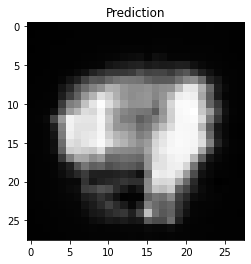

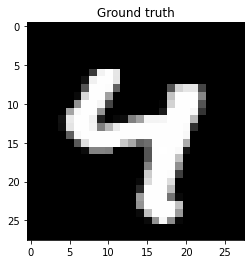

 22%|██▏       | 44004/200000 [55:32<5:29:20,  7.89it/s]

Validation loss for the function plotted:                                     -0.585


 23%|██▎       | 45999/200000 [57:47<2:49:51, 15.11it/s]

Mean training loss at epoch 46000 :                         -0.779
Mean Validation loss after 46000 equals                     -0.651



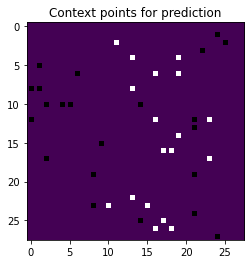

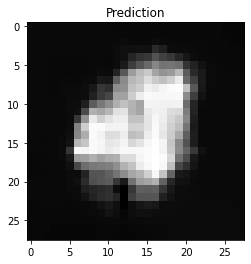

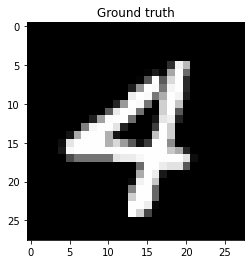

 23%|██▎       | 46003/200000 [57:48<6:10:39,  6.92it/s]

Validation loss for the function plotted:                                     -0.622


 24%|██▍       | 47999/200000 [1:00:05<2:26:42, 17.27it/s]

Mean training loss at epoch 48000 :                         -0.519
Mean Validation loss after 48000 equals                     -0.61



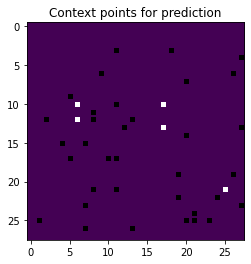

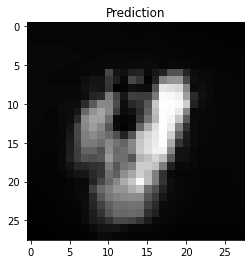

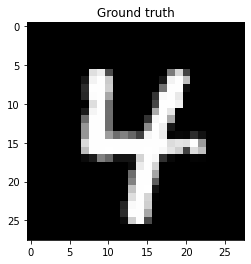

 24%|██▍       | 48004/200000 [1:00:06<5:12:40,  8.10it/s]

Validation loss for the function plotted:                                     -0.524


 25%|██▍       | 49999/200000 [1:02:18<2:27:30, 16.95it/s]

Mean training loss at epoch 50000 :                         -0.747
Mean Validation loss after 50000 equals                     -0.599



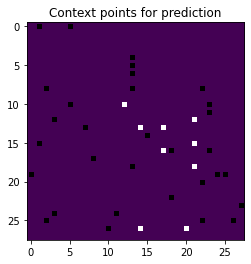

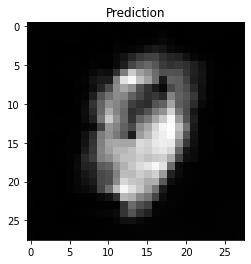

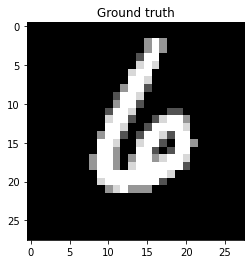

 25%|██▌       | 50003/200000 [1:02:19<5:18:28,  7.85it/s]

Validation loss for the function plotted:                                     -0.51


 26%|██▌       | 51999/200000 [1:04:32<3:42:22, 11.09it/s]

Mean training loss at epoch 52000 :                         -0.89
Mean Validation loss after 52000 equals                     -0.614



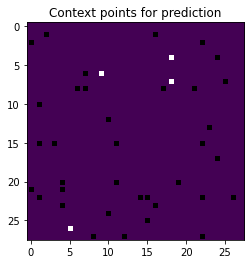

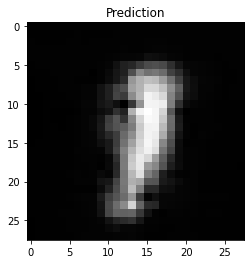

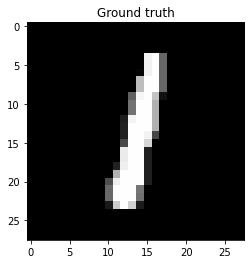

 26%|██▌       | 52003/200000 [1:04:33<7:25:11,  5.54it/s]

Validation loss for the function plotted:                                     -0.69


 27%|██▋       | 53999/200000 [1:06:47<2:32:36, 15.94it/s]

Mean training loss at epoch 54000 :                         -0.79
Mean Validation loss after 54000 equals                     -0.627



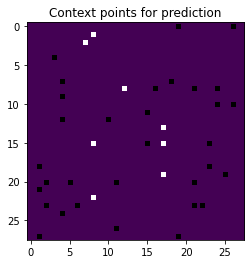

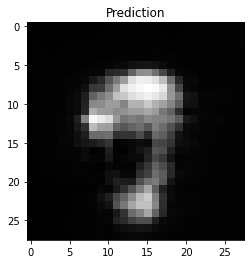

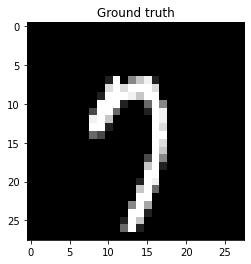

 27%|██▋       | 54003/200000 [1:06:47<5:23:40,  7.52it/s]

Validation loss for the function plotted:                                     -0.752


 28%|██▊       | 55999/200000 [1:09:02<2:33:11, 15.67it/s]

Mean training loss at epoch 56000 :                         -0.977
Mean Validation loss after 56000 equals                     -0.712



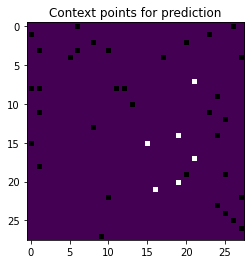

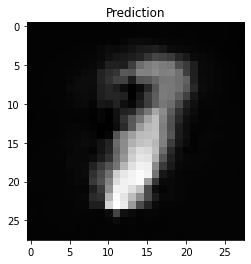

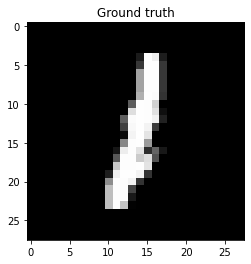

 28%|██▊       | 56003/200000 [1:09:03<5:24:50,  7.39it/s]

Validation loss for the function plotted:                                     -0.713


 29%|██▉       | 57999/200000 [1:11:40<3:00:10, 13.14it/s] 

Mean training loss at epoch 58000 :                         -1.023
Mean Validation loss after 58000 equals                     -0.741



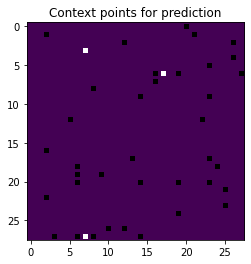

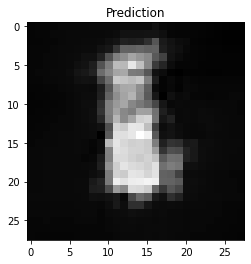

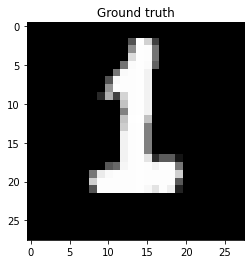

 29%|██▉       | 58003/200000 [1:11:42<6:49:45,  5.78it/s]

Validation loss for the function plotted:                                     -0.77


 30%|██▉       | 59999/200000 [1:14:28<3:06:19, 12.52it/s]

Mean training loss at epoch 60000 :                         -0.739
Mean Validation loss after 60000 equals                     -0.763



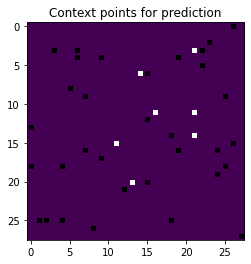

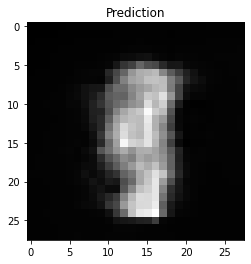

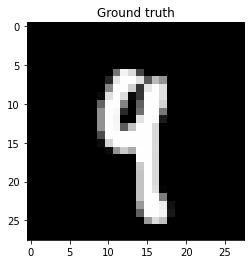

 30%|███       | 60002/200000 [1:14:30<10:18:59,  3.77it/s]

Validation loss for the function plotted:                                     -0.903


 31%|███       | 61999/200000 [1:17:26<3:15:25, 11.77it/s] 

Mean training loss at epoch 62000 :                         -0.765
Mean Validation loss after 62000 equals                     -0.858



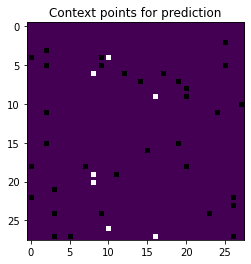

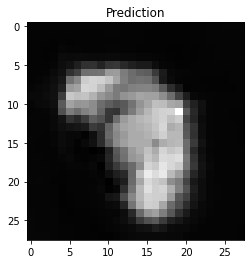

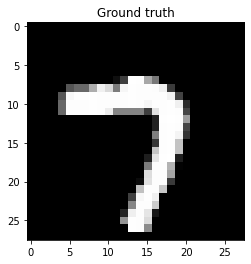

 31%|███       | 62003/200000 [1:17:27<6:17:12,  6.10it/s]

Validation loss for the function plotted:                                     -0.841


 32%|███▏      | 64000/200000 [1:20:13<2:23:15, 15.82it/s]

Mean training loss at epoch 64000 :                         -0.897
Mean Validation loss after 64000 equals                     -0.589



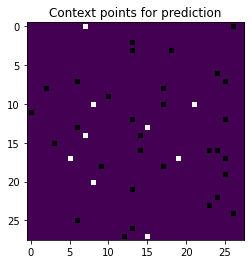

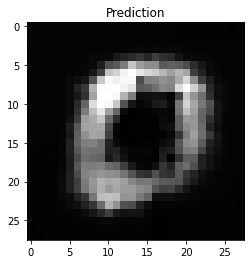

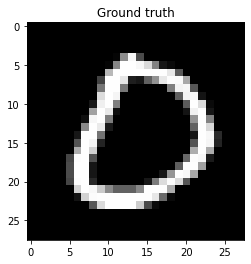

 32%|███▏      | 64002/200000 [1:20:15<10:37:34,  3.56it/s]

Validation loss for the function plotted:                                     -0.671


 33%|███▎      | 66000/200000 [1:22:10<1:42:43, 21.74it/s] 

Mean training loss at epoch 66000 :                         -0.855
Mean Validation loss after 66000 equals                     -0.751



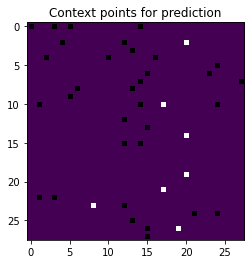

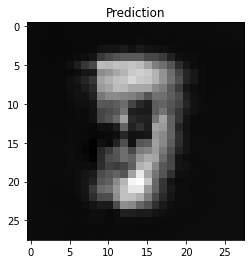

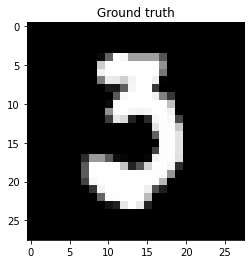

 33%|███▎      | 66003/200000 [1:22:10<3:31:20, 10.57it/s]

Validation loss for the function plotted:                                     -0.694


 34%|███▍      | 67998/200000 [1:24:27<2:07:10, 17.30it/s]

Mean training loss at epoch 68000 :                         -0.917
Mean Validation loss after 68000 equals                     -0.574



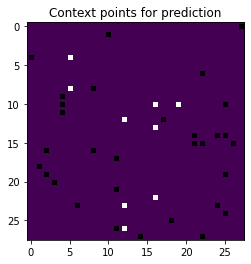

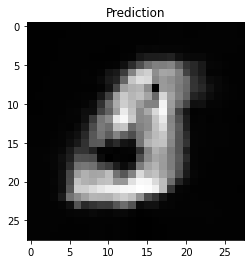

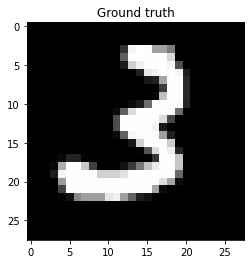

 34%|███▍      | 68003/200000 [1:24:27<3:42:45,  9.88it/s]

Validation loss for the function plotted:                                     -0.631


 35%|███▍      | 69999/200000 [1:26:48<3:18:46, 10.90it/s] 

Mean training loss at epoch 70000 :                         -0.859
Mean Validation loss after 70000 equals                     -0.691



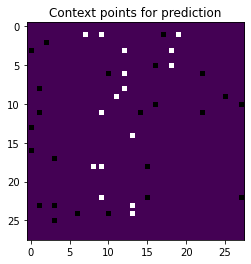

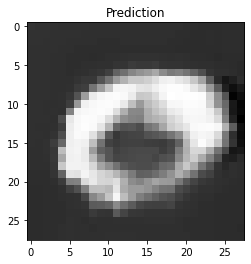

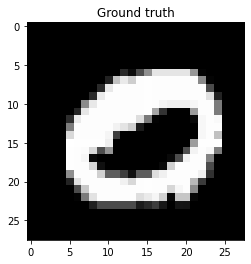

 35%|███▌      | 70002/200000 [1:26:49<9:08:50,  3.95it/s] 

Validation loss for the function plotted:                                     -0.674


 36%|███▌      | 72000/200000 [1:29:21<3:00:31, 11.82it/s] 

Mean training loss at epoch 72000 :                         -0.907
Mean Validation loss after 72000 equals                     -0.622



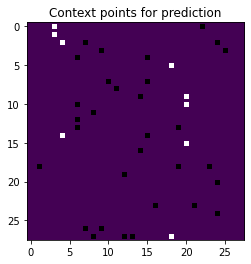

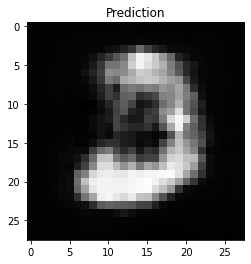

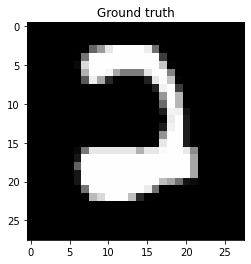

 36%|███▌      | 72002/200000 [1:29:22<8:16:30,  4.30it/s]

Validation loss for the function plotted:                                     -0.494


 37%|███▋      | 73999/200000 [1:32:38<2:07:10, 16.51it/s] 

Mean training loss at epoch 74000 :                         -0.95
Mean Validation loss after 74000 equals                     -0.694



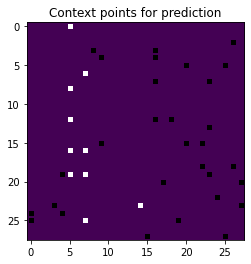

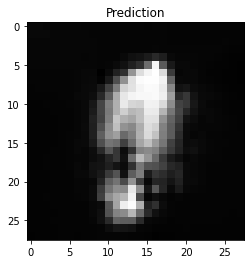

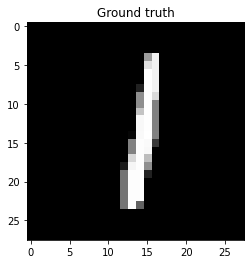

 37%|███▋      | 74003/200000 [1:32:39<6:55:07,  5.06it/s]

Validation loss for the function plotted:                                     -0.669


 38%|███▊      | 76000/200000 [1:36:18<3:26:48,  9.99it/s] 

Mean training loss at epoch 76000 :                         -0.808
Mean Validation loss after 76000 equals                     -0.667



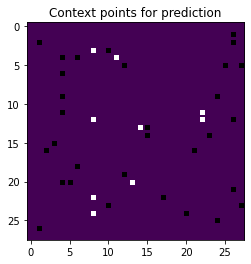

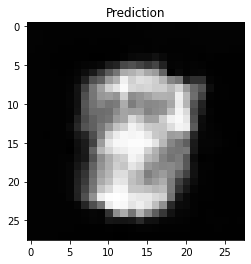

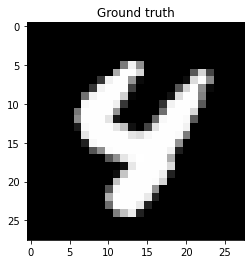

 38%|███▊      | 76002/200000 [1:36:19<7:59:46,  4.31it/s]

Validation loss for the function plotted:                                     -0.582


 39%|███▉      | 78000/200000 [1:39:41<2:18:20, 14.70it/s] 

Mean training loss at epoch 78000 :                         -0.923
Mean Validation loss after 78000 equals                     -0.549



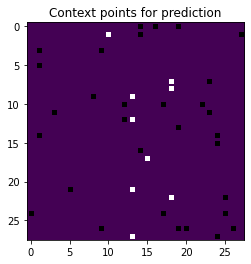

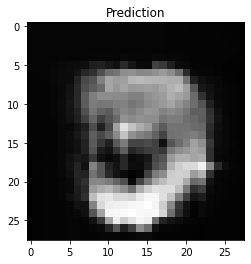

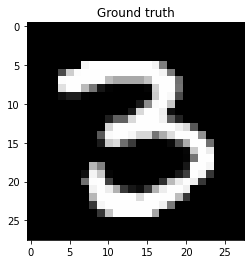

 39%|███▉      | 78004/200000 [1:39:42<4:33:11,  7.44it/s]

Validation loss for the function plotted:                                     -0.348


 40%|████      | 80000/200000 [1:42:55<2:29:16, 13.40it/s] 

Mean training loss at epoch 80000 :                         -0.796
Mean Validation loss after 80000 equals                     -0.617



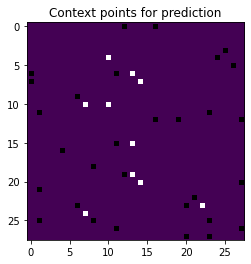

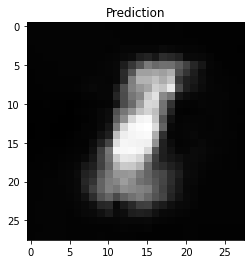

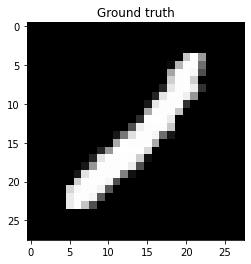

 40%|████      | 80002/200000 [1:42:56<7:43:02,  4.32it/s]

Validation loss for the function plotted:                                     -0.624


 41%|████      | 82000/200000 [1:46:47<2:59:51, 10.93it/s] 

Mean training loss at epoch 82000 :                         -0.912
Mean Validation loss after 82000 equals                     -0.623



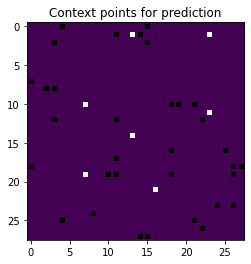

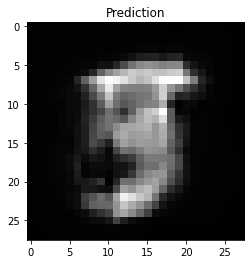

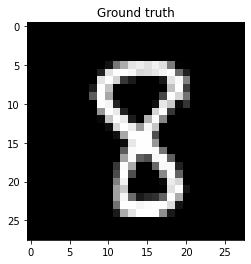

 41%|████      | 82002/200000 [1:46:48<8:47:57,  3.72it/s]

Validation loss for the function plotted:                                     -0.64


 42%|████▏     | 84000/200000 [1:50:15<2:55:16, 11.03it/s] 

Mean training loss at epoch 84000 :                         -0.895
Mean Validation loss after 84000 equals                     -0.557



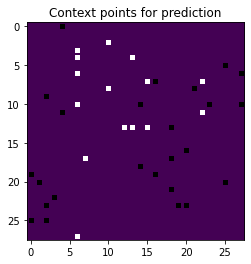

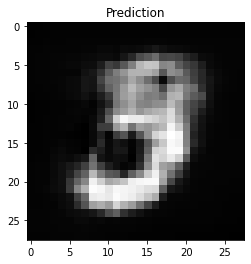

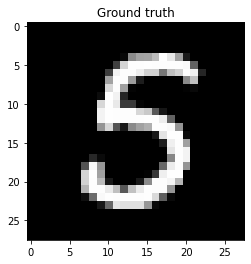

 42%|████▏     | 84002/200000 [1:50:17<8:08:50,  3.95it/s]

Validation loss for the function plotted:                                     -0.624


 43%|████▎     | 85999/200000 [1:53:51<3:12:10,  9.89it/s] 

Mean training loss at epoch 86000 :                         -0.927
Mean Validation loss after 86000 equals                     -0.705



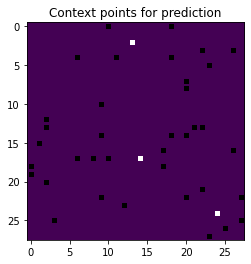

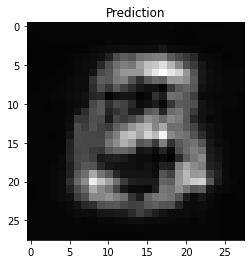

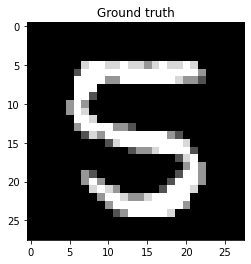

 43%|████▎     | 86002/200000 [1:53:53<7:18:35,  4.33it/s]

Validation loss for the function plotted:                                     -0.565


 44%|████▍     | 88000/200000 [1:57:19<5:25:56,  5.73it/s] 

Mean training loss at epoch 88000 :                         -0.926
Mean Validation loss after 88000 equals                     -0.686



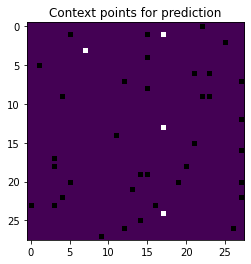

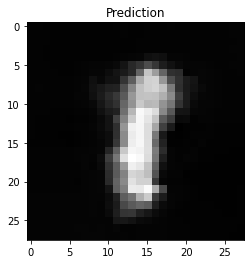

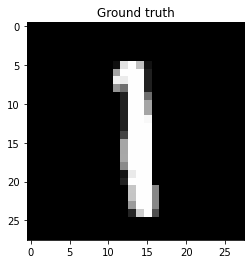

 44%|████▍     | 88001/200000 [1:57:21<23:44:58,  1.31it/s]

Validation loss for the function plotted:                                     -0.594


 45%|████▌     | 90000/200000 [2:00:52<2:14:57, 13.58it/s] 

Mean training loss at epoch 90000 :                         -0.864
Mean Validation loss after 90000 equals                     -0.617



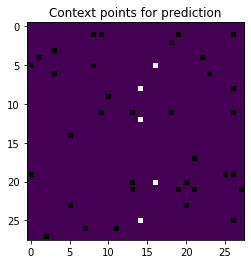

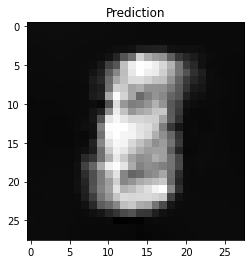

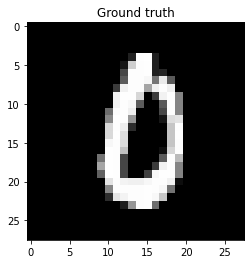

 45%|████▌     | 90002/200000 [2:00:53<7:01:35,  4.35it/s]

Validation loss for the function plotted:                                     -0.519


 46%|████▌     | 91999/200000 [2:04:27<2:57:47, 10.12it/s] 

Mean training loss at epoch 92000 :                         -0.872
Mean Validation loss after 92000 equals                     -0.67



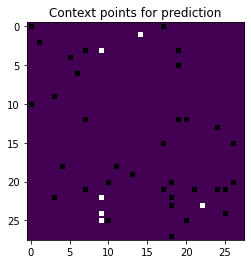

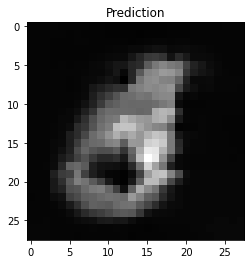

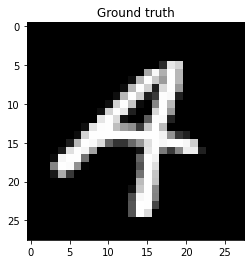

 46%|████▌     | 92002/200000 [2:04:28<6:47:16,  4.42it/s]

Validation loss for the function plotted:                                     -0.593


 47%|████▋     | 93999/200000 [2:07:45<2:26:05, 12.09it/s] 

Mean training loss at epoch 94000 :                         -0.859
Mean Validation loss after 94000 equals                     -0.792



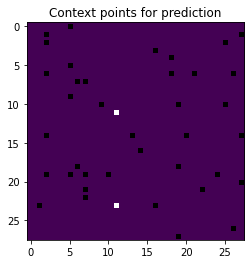

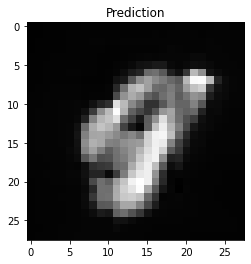

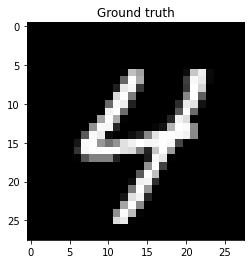

 47%|████▋     | 94003/200000 [2:07:47<5:57:03,  4.95it/s]

Validation loss for the function plotted:                                     -0.734


 48%|████▊     | 96000/200000 [2:11:09<6:46:46,  4.26it/s] 

Mean training loss at epoch 96000 :                         -0.797
Mean Validation loss after 96000 equals                     -0.523



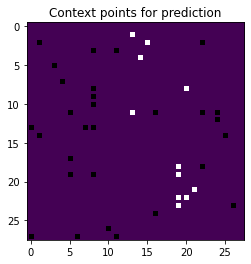

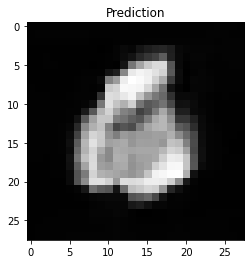

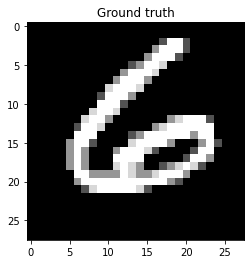

 48%|████▊     | 96001/200000 [2:11:12<31:43:47,  1.10s/it]

Validation loss for the function plotted:                                     -0.494


 49%|████▉     | 98000/200000 [2:14:38<2:29:11, 11.39it/s] 

Mean training loss at epoch 98000 :                         -0.807
Mean Validation loss after 98000 equals                     -0.662



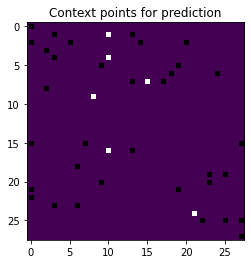

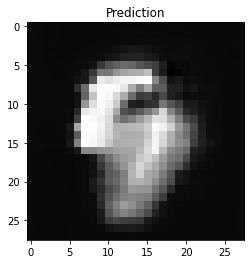

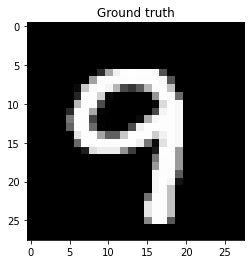

 49%|████▉     | 98002/200000 [2:14:40<7:13:34,  3.92it/s]

Validation loss for the function plotted:                                     -0.513


 50%|████▉     | 99999/200000 [2:18:21<2:26:12, 11.40it/s] 

Mean training loss at epoch 100000 :                         -0.778
Mean Validation loss after 100000 equals                     -0.579



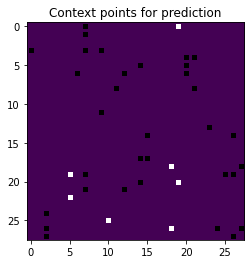

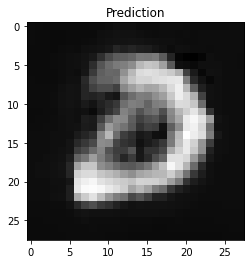

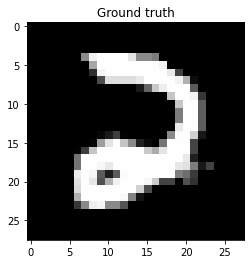

 50%|█████     | 100002/200000 [2:18:22<6:16:26,  4.43it/s]

Validation loss for the function plotted:                                     -0.764


 51%|█████     | 101999/200000 [2:21:51<2:32:55, 10.68it/s] 

Mean training loss at epoch 102000 :                         -0.863
Mean Validation loss after 102000 equals                     -0.805



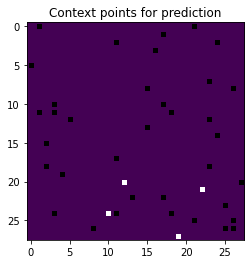

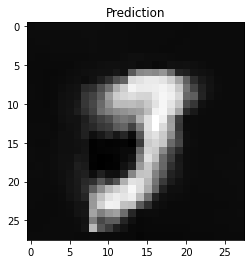

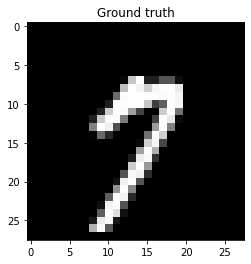

 51%|█████     | 102003/200000 [2:21:52<5:36:02,  4.86it/s]

Validation loss for the function plotted:                                     -0.785


 52%|█████▏    | 103999/200000 [2:25:04<2:13:54, 11.95it/s]

Mean training loss at epoch 104000 :                         -0.91
Mean Validation loss after 104000 equals                     -0.52



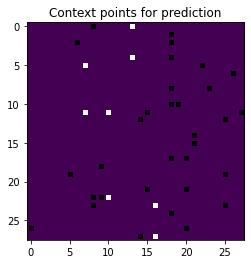

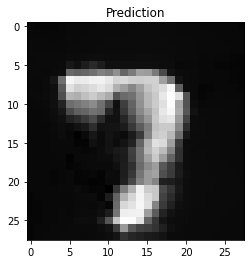

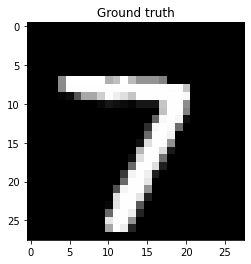

 52%|█████▏    | 104001/200000 [2:25:05<6:49:26,  3.91it/s]

Validation loss for the function plotted:                                     -0.42


 53%|█████▎    | 105999/200000 [2:28:24<2:12:37, 11.81it/s]

Mean training loss at epoch 106000 :                         -1.003
Mean Validation loss after 106000 equals                     -0.738



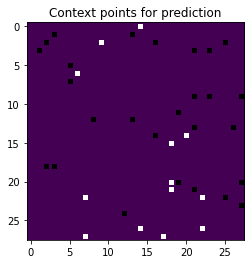

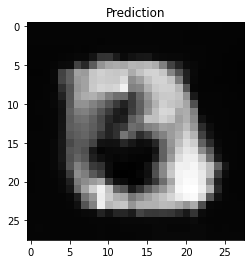

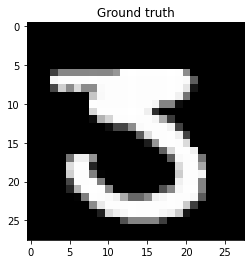

 53%|█████▎    | 106003/200000 [2:28:25<5:16:42,  4.95it/s]

Validation loss for the function plotted:                                     -0.659


 54%|█████▍    | 108000/200000 [2:31:45<2:10:03, 11.79it/s] 

Mean training loss at epoch 108000 :                         -1.009
Mean Validation loss after 108000 equals                     -0.659



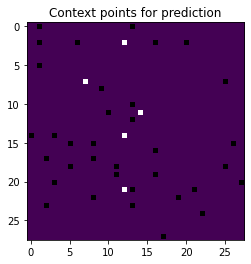

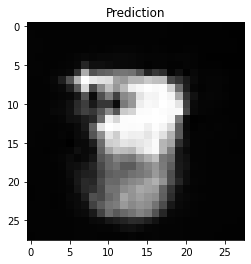

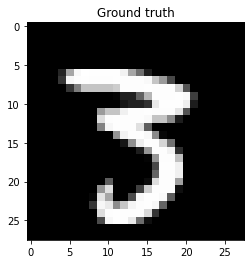

 54%|█████▍    | 108002/200000 [2:31:47<6:15:20,  4.09it/s]

Validation loss for the function plotted:                                     -0.819


 55%|█████▍    | 109999/200000 [2:34:42<2:06:12, 11.88it/s]

Mean training loss at epoch 110000 :                         -1.021
Mean Validation loss after 110000 equals                     -0.575



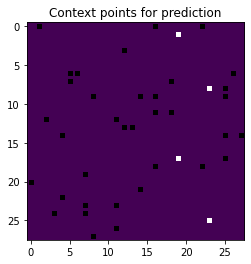

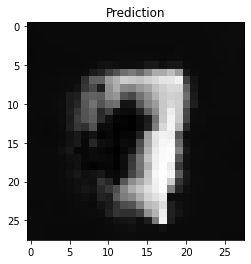

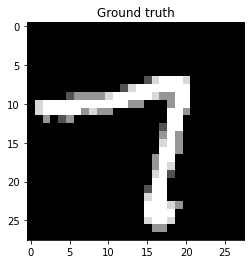

 55%|█████▌    | 110003/200000 [2:34:44<4:34:11,  5.47it/s]

Validation loss for the function plotted:                                     -0.526


 56%|█████▌    | 112000/200000 [2:37:32<2:20:02, 10.47it/s]

Mean training loss at epoch 112000 :                         -0.917
Mean Validation loss after 112000 equals                     -0.581



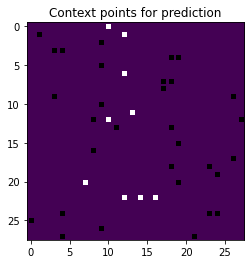

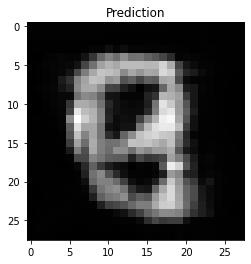

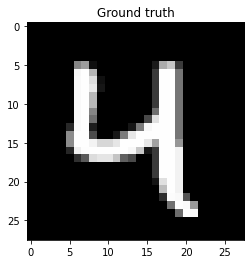

 56%|█████▌    | 112002/200000 [2:37:33<6:31:14,  3.75it/s]

Validation loss for the function plotted:                                     -0.506


 57%|█████▋    | 113999/200000 [2:40:18<1:50:41, 12.95it/s]

Mean training loss at epoch 114000 :                         -0.543
Mean Validation loss after 114000 equals                     -0.61



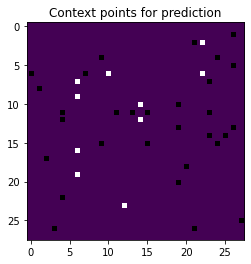

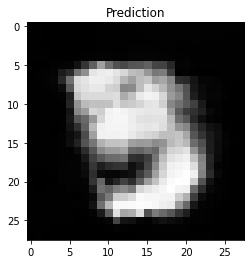

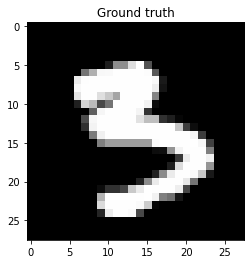

 57%|█████▋    | 114003/200000 [2:40:19<4:09:10,  5.75it/s]

Validation loss for the function plotted:                                     -0.642


 58%|█████▊    | 115999/200000 [2:43:16<2:42:38,  8.61it/s]

Mean training loss at epoch 116000 :                         -1.014
Mean Validation loss after 116000 equals                     -0.681



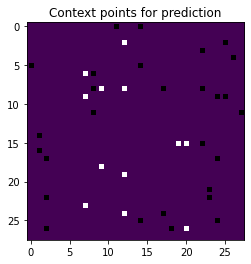

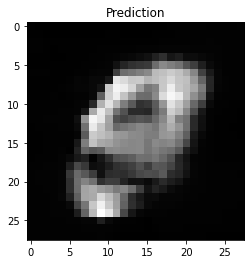

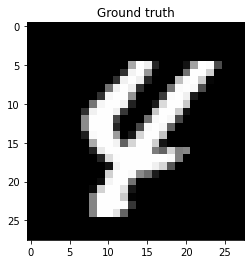

 58%|█████▊    | 116003/200000 [2:43:18<4:58:35,  4.69it/s]

Validation loss for the function plotted:                                     -0.595


 59%|█████▉    | 118000/200000 [2:45:58<1:46:28, 12.84it/s]

Mean training loss at epoch 118000 :                         -0.968
Mean Validation loss after 118000 equals                     -0.649



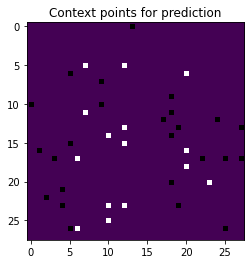

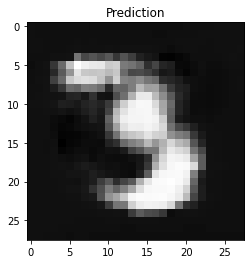

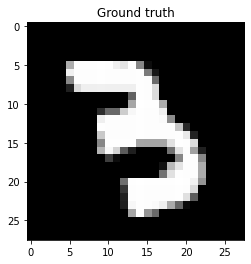

 59%|█████▉    | 118002/200000 [2:46:00<5:03:42,  4.50it/s]

Validation loss for the function plotted:                                     -0.632


 60%|█████▉    | 119999/200000 [2:48:41<1:46:32, 12.51it/s]

Mean training loss at epoch 120000 :                         -0.99
Mean Validation loss after 120000 equals                     -0.727



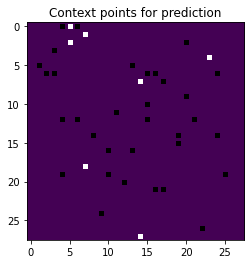

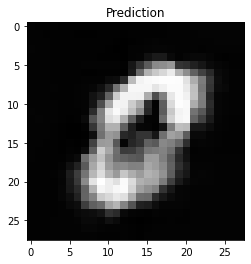

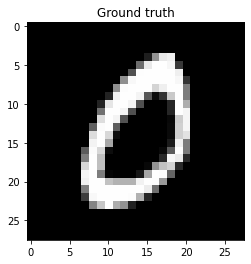

 60%|██████    | 120002/200000 [2:48:43<4:37:44,  4.80it/s]

Validation loss for the function plotted:                                     -0.696


 61%|██████    | 121999/200000 [2:51:29<1:45:50, 12.28it/s]

Mean training loss at epoch 122000 :                         -0.774
Mean Validation loss after 122000 equals                     -0.664



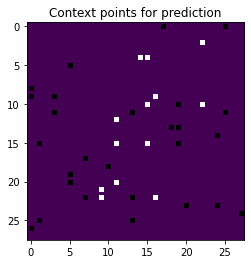

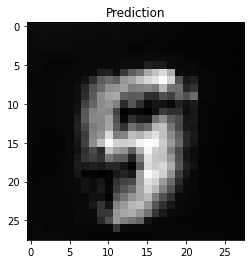

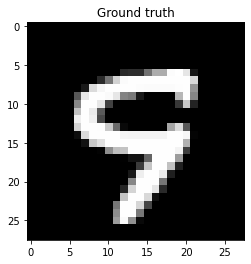

 61%|██████    | 122003/200000 [2:51:31<3:49:59,  5.65it/s]

Validation loss for the function plotted:                                     -0.652


 62%|██████▏   | 124000/200000 [2:53:32<57:35, 21.99it/s]  

Mean training loss at epoch 124000 :                         -1.001
Mean Validation loss after 124000 equals                     -0.674



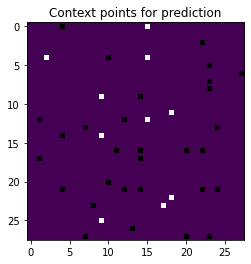

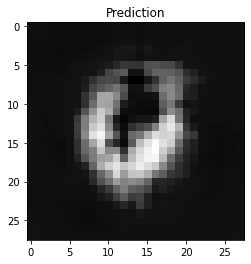

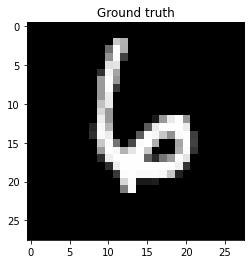

 62%|██████▏   | 124003/200000 [2:53:32<1:48:36, 11.66it/s]

Validation loss for the function plotted:                                     -0.767


 63%|██████▎   | 126000/200000 [2:54:58<51:46, 23.82it/s]  

Mean training loss at epoch 126000 :                         -0.717
Mean Validation loss after 126000 equals                     -0.671



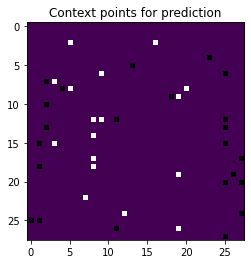

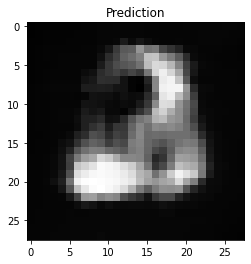

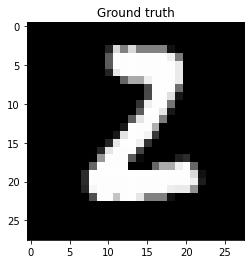

 63%|██████▎   | 126003/200000 [2:54:58<1:39:10, 12.44it/s]

Validation loss for the function plotted:                                     -0.751


 64%|██████▍   | 127999/200000 [2:56:22<52:17, 22.95it/s]  

Mean training loss at epoch 128000 :                         -0.947
Mean Validation loss after 128000 equals                     -0.712



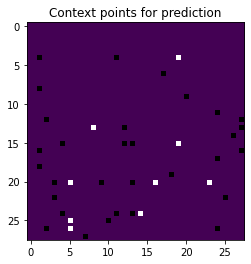

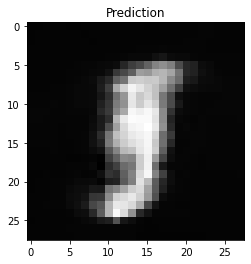

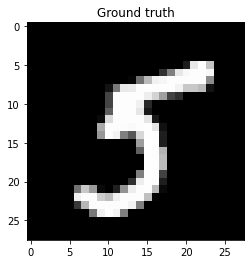

 64%|██████▍   | 128005/200000 [2:56:23<1:26:28, 13.88it/s]

Validation loss for the function plotted:                                     -0.63


 65%|██████▍   | 129999/200000 [2:57:49<48:03, 24.28it/s]  

Mean training loss at epoch 130000 :                         -0.97
Mean Validation loss after 130000 equals                     -0.678



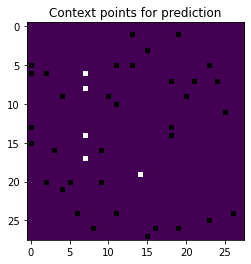

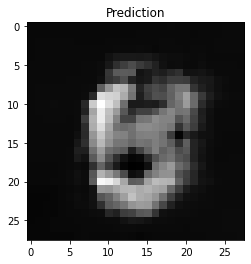

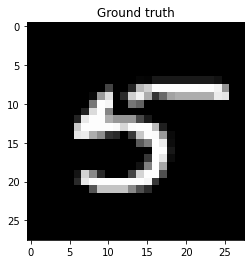

 65%|██████▌   | 130005/200000 [2:57:50<1:19:26, 14.69it/s]

Validation loss for the function plotted:                                     -0.695


 66%|██████▌   | 131998/200000 [2:59:14<49:09, 23.06it/s]  

Mean training loss at epoch 132000 :                         -0.905
Mean Validation loss after 132000 equals                     -0.625



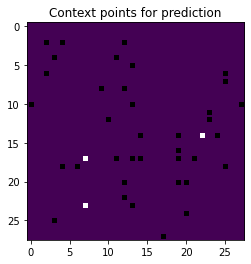

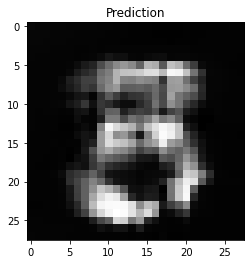

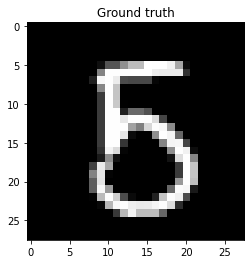

 66%|██████▌   | 132004/200000 [2:59:15<1:21:36, 13.89it/s]

Validation loss for the function plotted:                                     -0.63


 67%|██████▋   | 134000/200000 [3:00:42<41:45, 26.34it/s]  

Mean training loss at epoch 134000 :                         -0.845
Mean Validation loss after 134000 equals                     -0.629



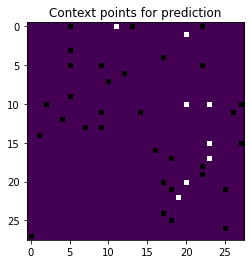

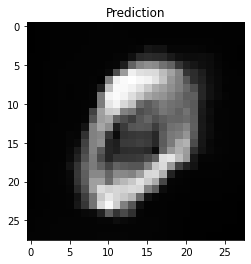

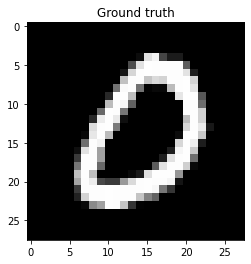

 67%|██████▋   | 134003/200000 [3:00:42<1:31:36, 12.01it/s]

Validation loss for the function plotted:                                     -0.541


 68%|██████▊   | 135999/200000 [3:02:12<47:21, 22.52it/s]  

Mean training loss at epoch 136000 :                         -0.86
Mean Validation loss after 136000 equals                     -0.766



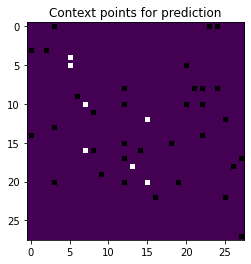

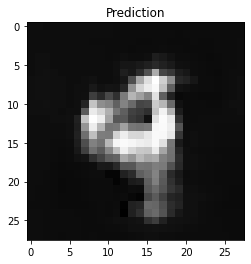

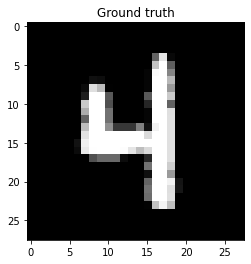

 68%|██████▊   | 136005/200000 [3:02:13<1:12:16, 14.76it/s]

Validation loss for the function plotted:                                     -0.807


 69%|██████▉   | 138000/200000 [3:03:38<42:44, 24.18it/s]  

Mean training loss at epoch 138000 :                         -1.005
Mean Validation loss after 138000 equals                     -0.701



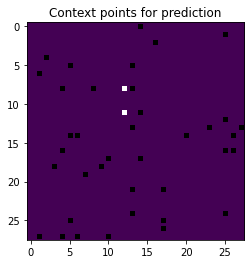

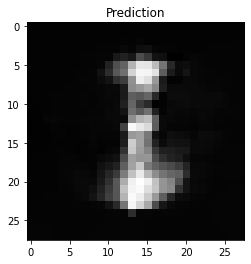

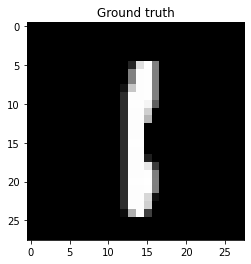

 69%|██████▉   | 138003/200000 [3:03:38<1:24:45, 12.19it/s]

Validation loss for the function plotted:                                     -0.715


 70%|███████   | 140000/200000 [3:05:03<42:43, 23.41it/s]  

Mean training loss at epoch 140000 :                         -1.111
Mean Validation loss after 140000 equals                     -0.741



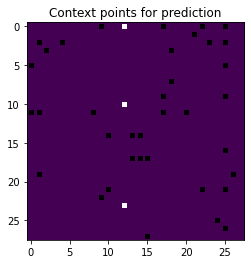

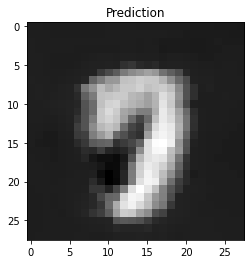

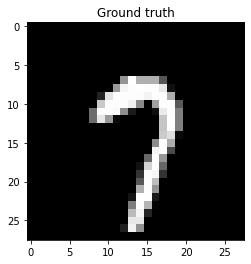

 70%|███████   | 140003/200000 [3:05:04<1:21:34, 12.26it/s]

Validation loss for the function plotted:                                     -0.804


 71%|███████   | 141999/200000 [3:06:28<45:19, 21.33it/s]  

Mean training loss at epoch 142000 :                         -1.029
Mean Validation loss after 142000 equals                     -0.735



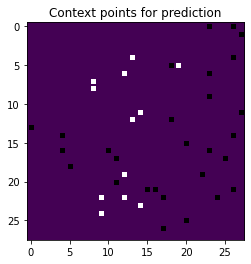

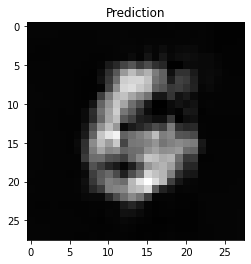

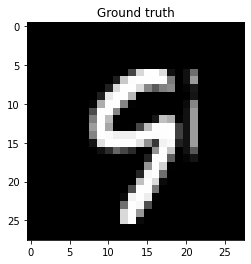

 71%|███████   | 142002/200000 [3:06:29<2:03:40,  7.82it/s]

Validation loss for the function plotted:                                     -0.772


 72%|███████▏  | 143998/200000 [3:07:53<32:19, 28.88it/s]  

Mean training loss at epoch 144000 :                         -0.978
Mean Validation loss after 144000 equals                     -0.632



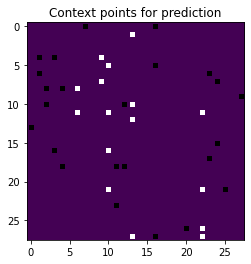

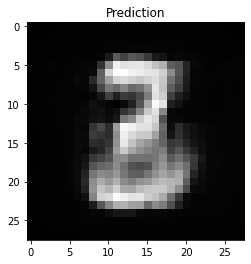

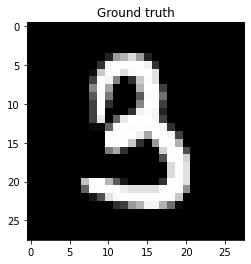

 72%|███████▏  | 144005/200000 [3:07:54<54:52, 17.01it/s]  

Validation loss for the function plotted:                                     -0.645


 73%|███████▎  | 145999/200000 [3:09:18<36:08, 24.91it/s]  

Mean training loss at epoch 146000 :                         -1.07
Mean Validation loss after 146000 equals                     -0.642



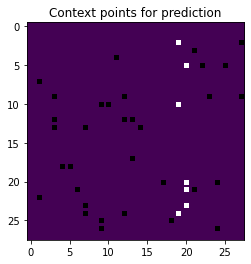

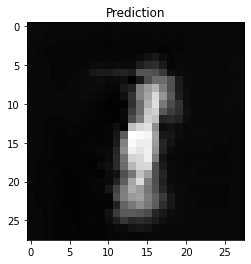

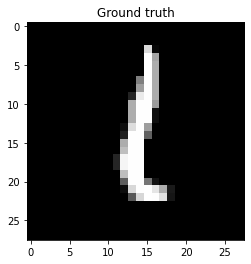

 73%|███████▎  | 146005/200000 [3:09:18<1:00:24, 14.90it/s]

Validation loss for the function plotted:                                     -0.717


 74%|███████▍  | 147998/200000 [3:10:39<34:28, 25.14it/s]  

Mean training loss at epoch 148000 :                         -1.057
Mean Validation loss after 148000 equals                     -0.699



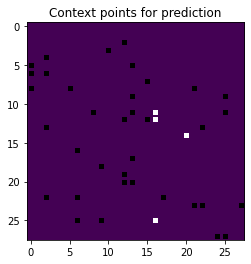

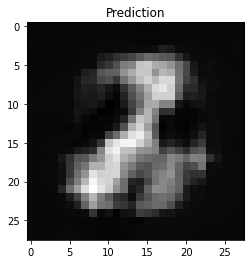

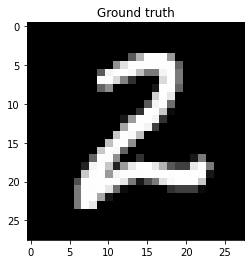

 74%|███████▍  | 148005/200000 [3:10:39<54:28, 15.91it/s]  

Validation loss for the function plotted:                                     -0.68


 75%|███████▌  | 150000/200000 [3:12:08<35:56, 23.19it/s]  

Mean training loss at epoch 150000 :                         -1.057
Mean Validation loss after 150000 equals                     -0.606



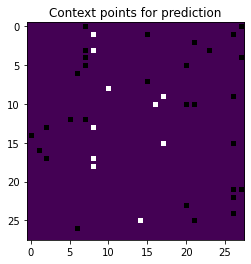

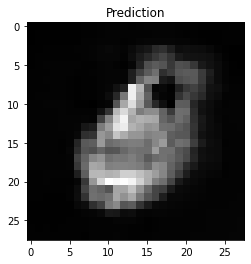

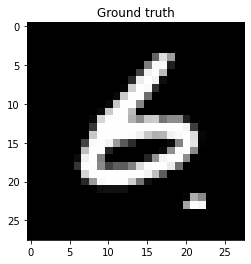

 75%|███████▌  | 150005/200000 [3:12:08<1:00:36, 13.75it/s]

Validation loss for the function plotted:                                     -0.596


 76%|███████▌  | 152000/200000 [3:14:44<1:04:37, 12.38it/s]

Mean training loss at epoch 152000 :                         -0.958
Mean Validation loss after 152000 equals                     -0.729



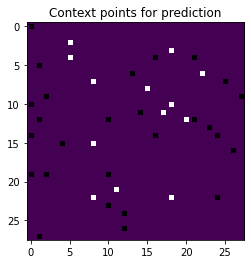

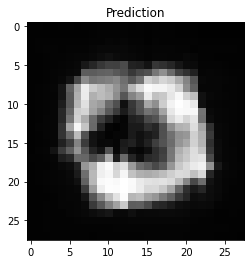

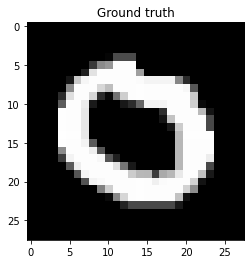

 76%|███████▌  | 152002/200000 [3:14:45<2:46:54,  4.79it/s]

Validation loss for the function plotted:                                     -0.713


 77%|███████▋  | 154000/200000 [3:16:26<29:59, 25.56it/s]  

Mean training loss at epoch 154000 :                         -0.685
Mean Validation loss after 154000 equals                     -0.763



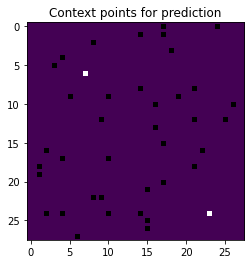

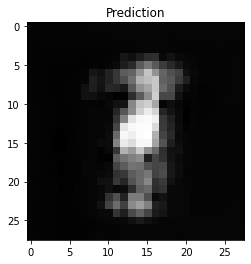

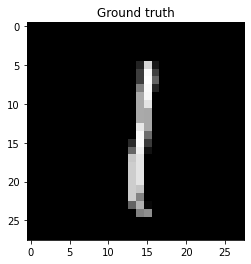

 77%|███████▋  | 154003/200000 [3:16:26<1:05:13, 11.75it/s]

Validation loss for the function plotted:                                     -0.803


 78%|███████▊  | 156000/200000 [3:18:02<34:48, 21.06it/s]  

Mean training loss at epoch 156000 :                         -1.031
Mean Validation loss after 156000 equals                     -0.756



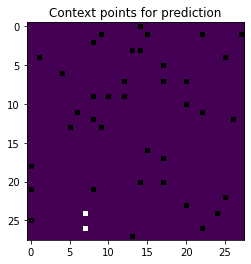

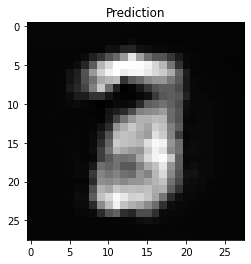

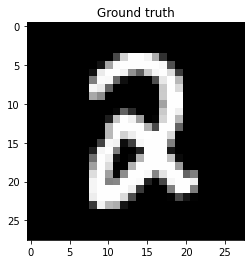

 78%|███████▊  | 156003/200000 [3:18:04<1:54:43,  6.39it/s]

Validation loss for the function plotted:                                     -0.795


 79%|███████▉  | 157998/200000 [3:19:53<39:27, 17.74it/s]  

Mean training loss at epoch 158000 :                         -0.93
Mean Validation loss after 158000 equals                     -0.539



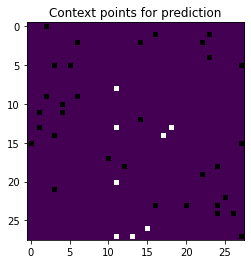

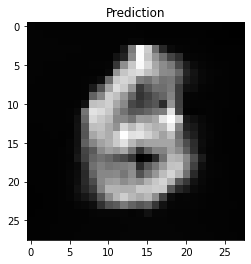

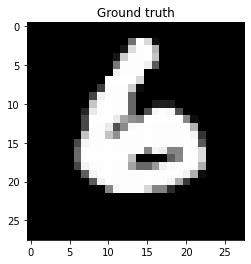

 79%|███████▉  | 158003/200000 [3:19:54<1:05:04, 10.75it/s]

Validation loss for the function plotted:                                     -0.616


 80%|███████▉  | 159998/200000 [3:21:56<35:33, 18.75it/s]  

Mean training loss at epoch 160000 :                         -1.042
Mean Validation loss after 160000 equals                     -0.7



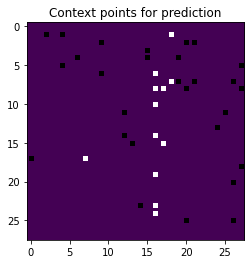

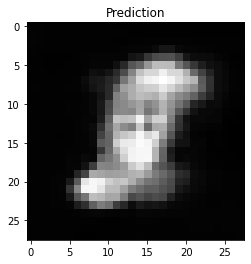

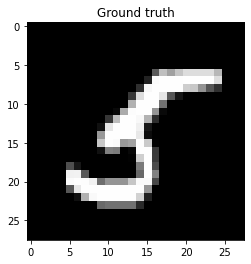

 80%|████████  | 160004/200000 [3:21:57<56:48, 11.73it/s]  

Validation loss for the function plotted:                                     -0.779


 81%|████████  | 161999/200000 [3:23:48<37:21, 16.95it/s]  

Mean training loss at epoch 162000 :                         -0.928
Mean Validation loss after 162000 equals                     -0.686



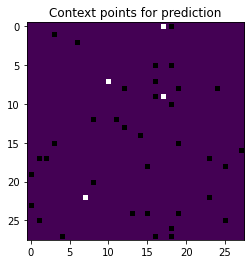

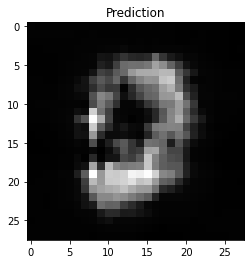

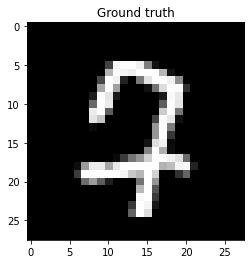

 81%|████████  | 162003/200000 [3:23:49<1:22:41,  7.66it/s]

Validation loss for the function plotted:                                     -0.724


 82%|████████▏ | 163999/200000 [3:25:41<39:05, 15.35it/s]  

Mean training loss at epoch 164000 :                         -0.973
Mean Validation loss after 164000 equals                     -0.686



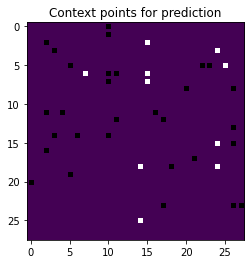

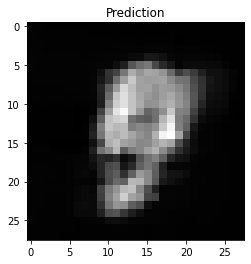

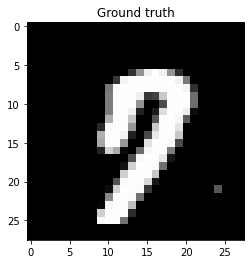

 82%|████████▏ | 164003/200000 [3:25:42<1:20:46,  7.43it/s]

Validation loss for the function plotted:                                     -0.638


 83%|████████▎ | 166000/200000 [3:27:30<39:20, 14.40it/s]  

Mean training loss at epoch 166000 :                         -0.626
Mean Validation loss after 166000 equals                     -0.692



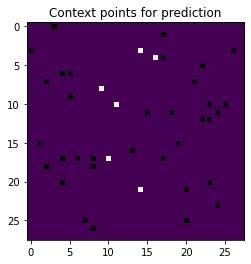

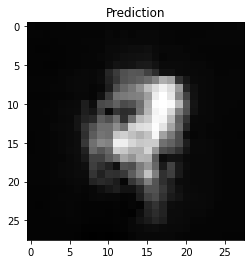

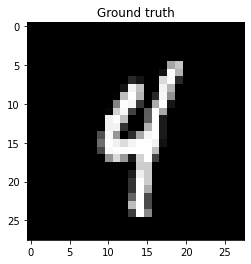

 83%|████████▎ | 166002/200000 [3:27:31<1:19:33,  7.12it/s]

Validation loss for the function plotted:                                     -0.69


 84%|████████▍ | 167999/200000 [3:29:15<21:19, 25.01it/s]  

Mean training loss at epoch 168000 :                         -1.002
Mean Validation loss after 168000 equals                     -0.747



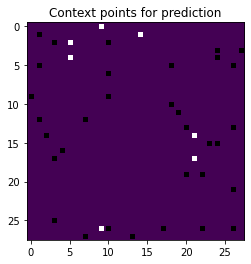

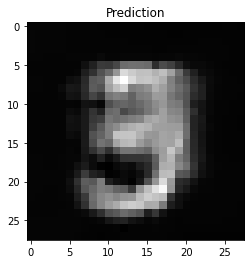

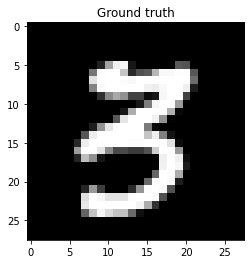

 84%|████████▍ | 168005/200000 [3:29:16<39:25, 13.53it/s]

Validation loss for the function plotted:                                     -0.714


 85%|████████▍ | 169999/200000 [3:31:40<35:09, 14.22it/s]  

Mean training loss at epoch 170000 :                         -1.018
Mean Validation loss after 170000 equals                     -0.806



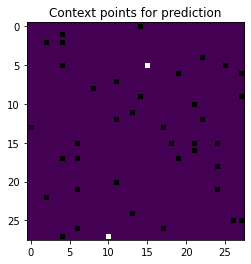

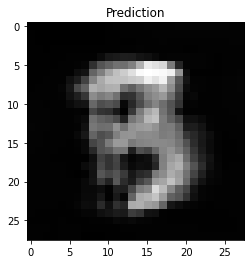

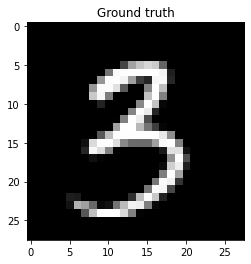

 85%|████████▌ | 170003/200000 [3:31:41<1:14:41,  6.69it/s]

Validation loss for the function plotted:                                     -0.792


 86%|████████▌ | 172000/200000 [3:34:06<31:49, 14.66it/s]  

Mean training loss at epoch 172000 :                         -0.891
Mean Validation loss after 172000 equals                     -0.781



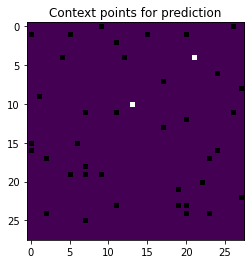

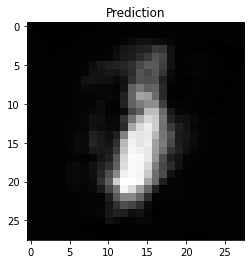

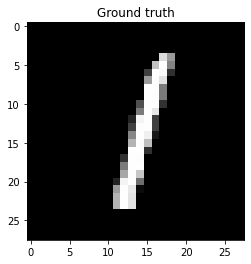

 86%|████████▌ | 172004/200000 [3:34:07<1:05:54,  7.08it/s]

Validation loss for the function plotted:                                     -0.806


 87%|████████▋ | 174000/200000 [3:36:32<28:36, 15.15it/s]  

Mean training loss at epoch 174000 :                         -0.952
Mean Validation loss after 174000 equals                     -0.596



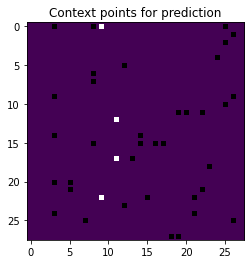

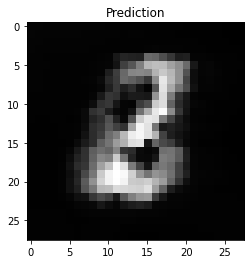

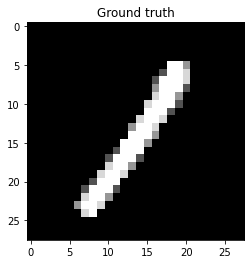

 87%|████████▋ | 174004/200000 [3:36:33<58:58,  7.35it/s]  

Validation loss for the function plotted:                                     -0.569


 88%|████████▊ | 176000/200000 [3:38:53<26:37, 15.03it/s]

Mean training loss at epoch 176000 :                         -0.957
Mean Validation loss after 176000 equals                     -0.66



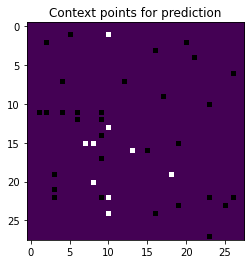

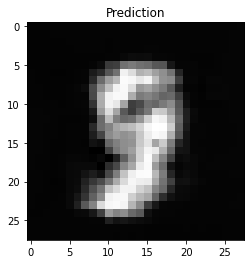

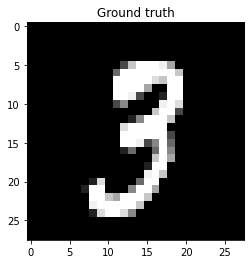

 88%|████████▊ | 176004/200000 [3:38:54<55:32,  7.20it/s]  

Validation loss for the function plotted:                                     -0.678


 89%|████████▉ | 178000/200000 [3:41:23<29:10, 12.56it/s]  

Mean training loss at epoch 178000 :                         -0.952
Mean Validation loss after 178000 equals                     -0.799



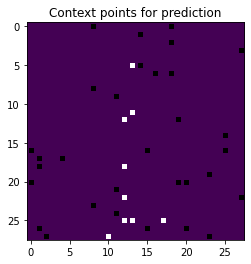

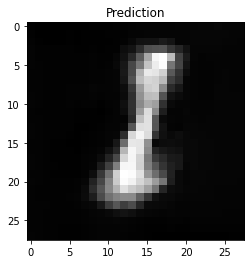

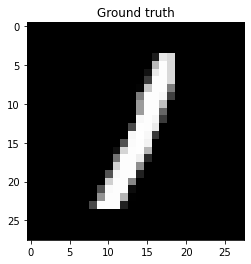

 89%|████████▉ | 178002/200000 [3:41:24<1:48:31,  3.38it/s]

Validation loss for the function plotted:                                     -0.806


 90%|█████████ | 180000/200000 [3:43:56<21:07, 15.77it/s]  

Mean training loss at epoch 180000 :                         -0.753
Mean Validation loss after 180000 equals                     -0.669



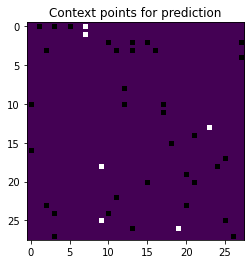

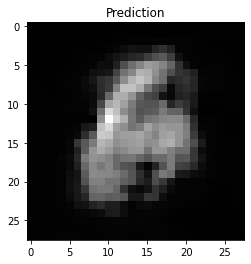

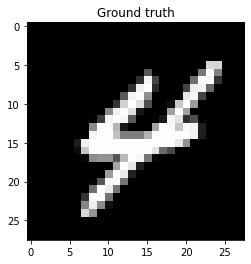

 90%|█████████ | 180004/200000 [3:43:57<43:54,  7.59it/s]

Validation loss for the function plotted:                                     -0.589


 91%|█████████ | 182000/200000 [3:46:15<20:40, 14.51it/s]

Mean training loss at epoch 182000 :                         -0.898
Mean Validation loss after 182000 equals                     -0.585



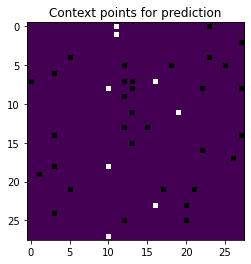

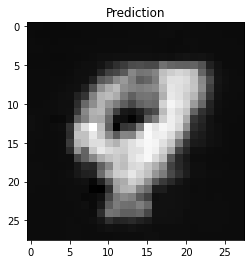

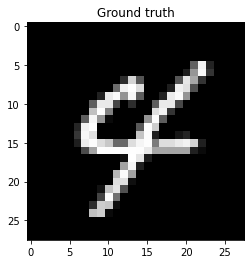

 91%|█████████ | 182004/200000 [3:46:16<41:52,  7.16it/s]

Validation loss for the function plotted:                                     -0.657


 92%|█████████▏| 183999/200000 [3:48:36<20:31, 12.99it/s]

Mean training loss at epoch 184000 :                         -1.083
Mean Validation loss after 184000 equals                     -0.614



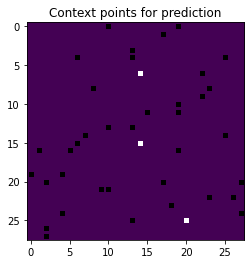

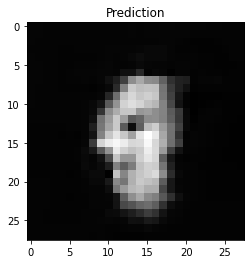

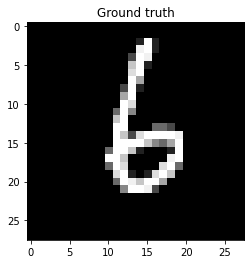

 92%|█████████▏| 184003/200000 [3:48:38<41:30,  6.42it/s]

Validation loss for the function plotted:                                     -0.598


 93%|█████████▎| 185999/200000 [3:50:55<15:11, 15.36it/s]

Mean training loss at epoch 186000 :                         -0.789
Mean Validation loss after 186000 equals                     -0.556



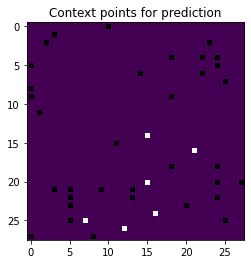

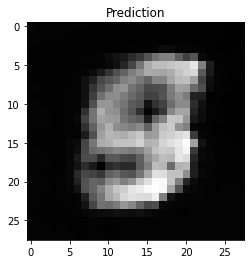

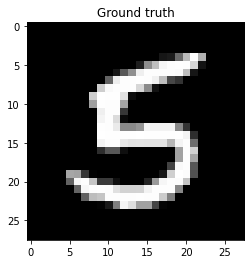

 93%|█████████▎| 186004/200000 [3:50:56<22:33, 10.34it/s]

Validation loss for the function plotted:                                     -0.517


 94%|█████████▍| 187999/200000 [3:52:24<08:53, 22.51it/s]

Mean training loss at epoch 188000 :                         -0.891
Mean Validation loss after 188000 equals                     -0.691



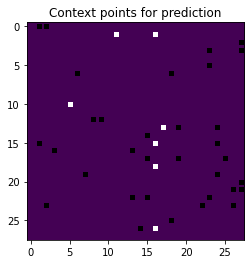

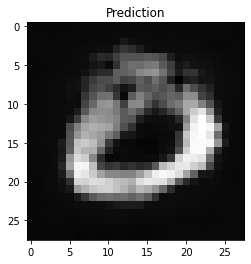

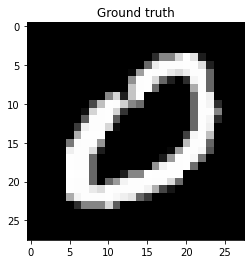

 94%|█████████▍| 188005/200000 [3:52:25<14:29, 13.79it/s]

Validation loss for the function plotted:                                     -0.711


 95%|█████████▍| 189999/200000 [3:53:53<07:23, 22.57it/s]

Mean training loss at epoch 190000 :                         -1.006
Mean Validation loss after 190000 equals                     -0.722



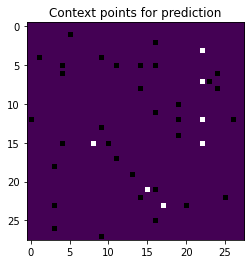

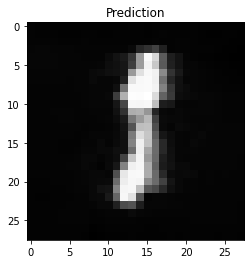

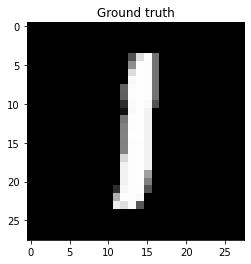

 95%|█████████▌| 190005/200000 [3:53:54<12:15, 13.58it/s]

Validation loss for the function plotted:                                     -0.735


 96%|█████████▌| 191998/200000 [3:55:29<05:42, 23.35it/s]

Mean training loss at epoch 192000 :                         -0.658
Mean Validation loss after 192000 equals                     -0.536



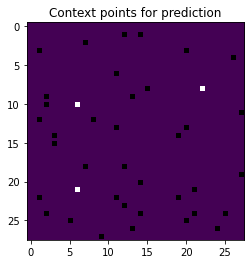

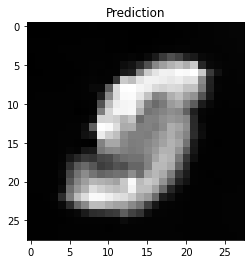

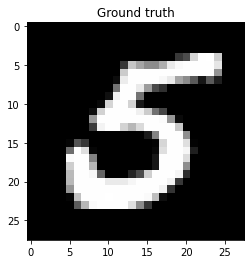

 96%|█████████▌| 192003/200000 [3:55:29<10:12, 13.06it/s]

Validation loss for the function plotted:                                     -0.614


 97%|█████████▋| 193999/200000 [3:57:05<04:19, 23.16it/s]

Mean training loss at epoch 194000 :                         -0.892
Mean Validation loss after 194000 equals                     -0.766



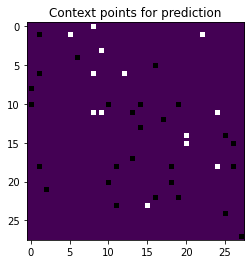

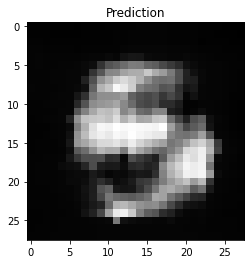

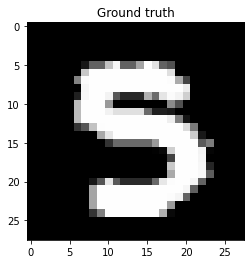

 97%|█████████▋| 194004/200000 [3:57:06<08:11, 12.20it/s]

Validation loss for the function plotted:                                     -0.777


 98%|█████████▊| 196000/200000 [3:58:53<04:10, 15.99it/s]

Mean training loss at epoch 196000 :                         -0.935
Mean Validation loss after 196000 equals                     -0.687



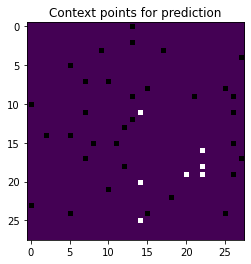

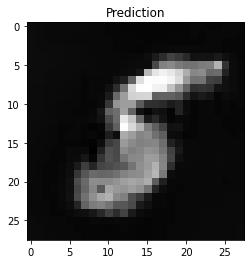

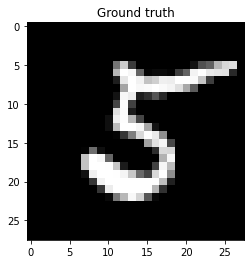

 98%|█████████▊| 196004/200000 [3:58:54<07:46,  8.57it/s]

Validation loss for the function plotted:                                     -0.736


 99%|█████████▉| 197999/200000 [4:00:45<01:44, 19.19it/s]

Mean training loss at epoch 198000 :                         -1.058
Mean Validation loss after 198000 equals                     -0.72



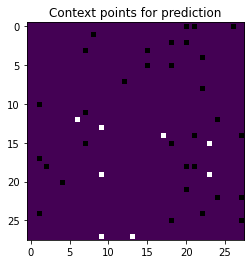

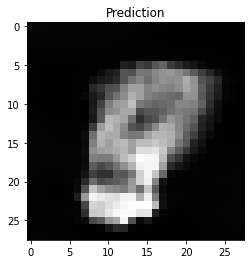

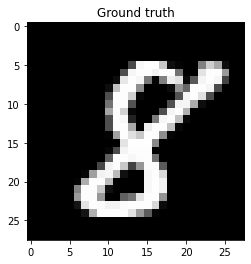

 99%|█████████▉| 198004/200000 [4:00:45<03:19, 10.00it/s]

Validation loss for the function plotted:                                     -0.756


100%|██████████| 200000/200000 [4:02:30<00:00, 13.75it/s]


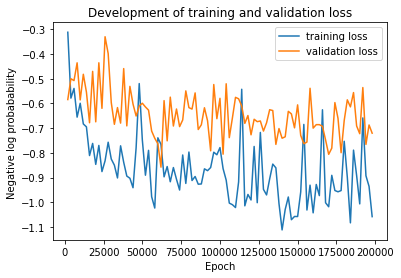

seed is set


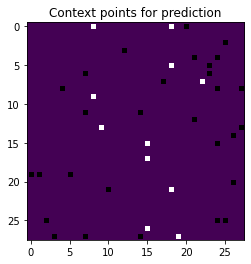

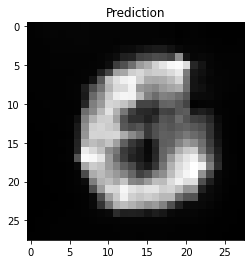

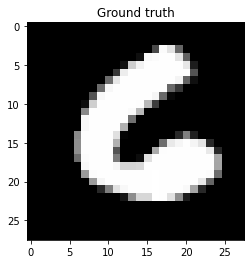

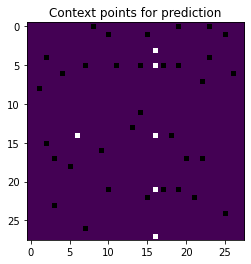

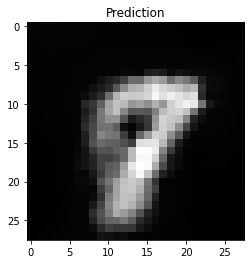

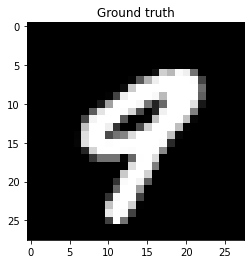

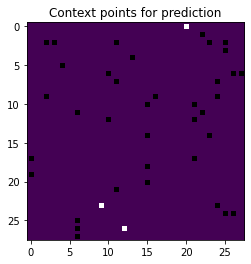

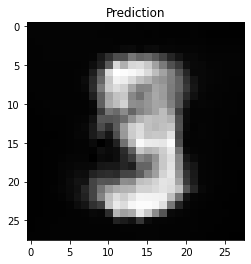

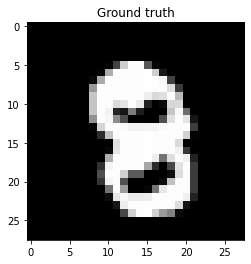

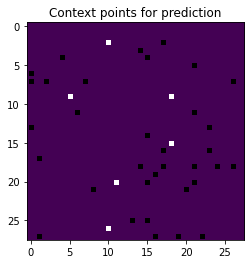

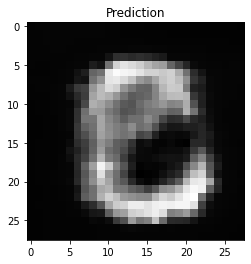

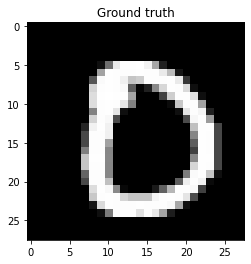

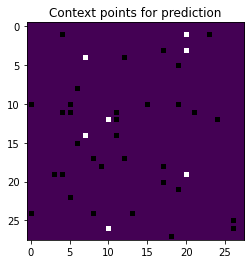

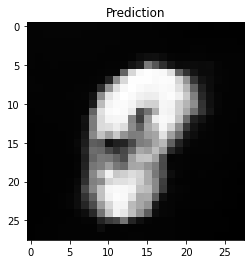

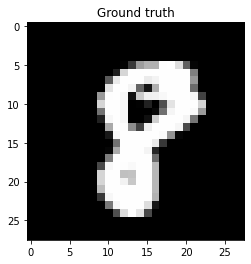

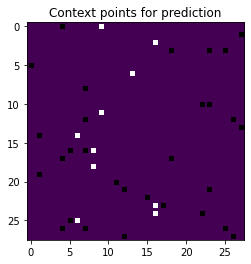

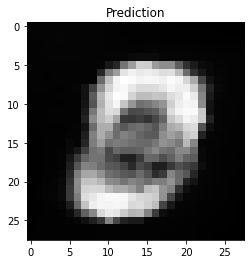

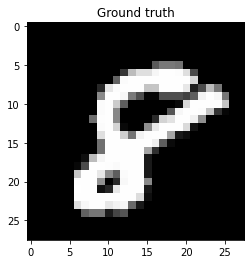

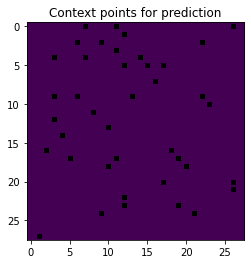

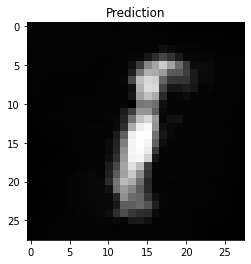

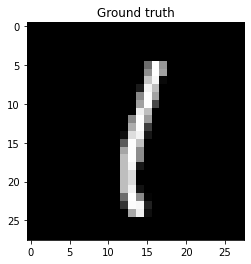

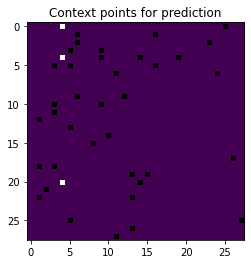

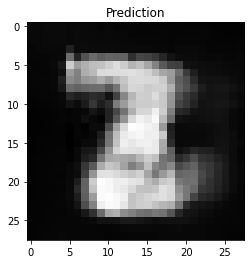

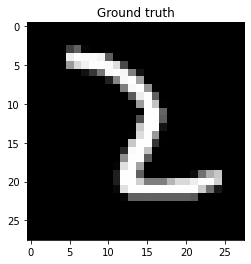

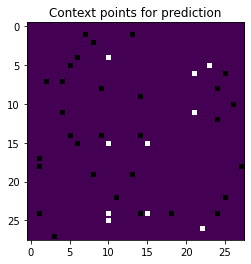

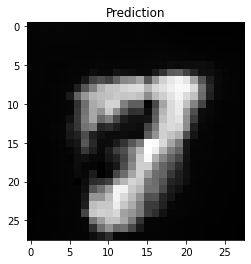

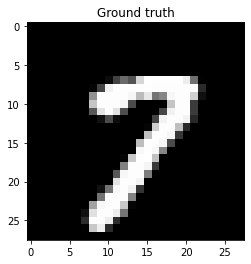

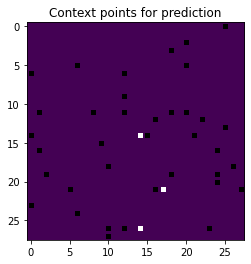

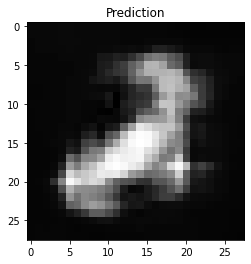

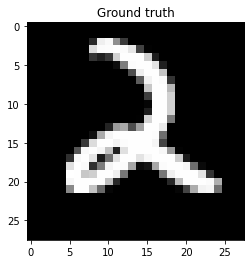

The mean squared error for this experiment is 0.0442345030605793
Creating new directory at experiments/results/greyscale_target_based_attention_40ctxt_2020_07_07_21_47
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config_file


In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs['TargetBasedAggregation']

run_experiment(config_file=attention_exp_config,
               experiment_name='greyscale_target_based_attention_40ctxt',
              google_colab=google_colab)